## GROUP PROJECT: Euklid Case

Master's Degree in Data Science and Management

Course: Machine Learning

Students: Gian Lorenzo Marchioni () - David Paquette () - Elena Tomasella (781321)


## DATASETS

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import missingno as msno

In [ ]:
#import dataset
amazon_df = pd.read_csv('/content/Amazon_weekly.csv', sep = ',', header = 0)
cac_df = pd.read_csv('/content/Cac_weekly.csv', sep = ',', header = 0)
ibm_df = pd.read_csv('/content/IBM_weekly.csv', sep = ',',header = 0)
microsoft_df = pd.read_csv('/content/Microsoft_weekly.csv', sep = ',', header = 0)
nasdaq_df = pd.read_csv('/content/Nasdaq_weekly.csv', sep = ',', header = 0)
sp500_df = pd.read_csv('/content/Sp500_weekly.csv', sep = ',', header=0)
dfs = [amazon_df, cac_df, ibm_df, microsoft_df, nasdaq_df, sp500_df]
dfs_names = ['Amazon', 'Cac', 'IBM', 'Microsoft', 'Nasdaq', 'sp500']

In [ ]:
#import dataset (Gian version, for convenience)
#amazon_df = pd.read_csv(r'C:\Users\Gian\OneDrive - LUISS Libera Università Internazionale degli Studi Sociali Guido Carli\ML\Final Project\Weekly series\Amazon_weekly.csv', sep = ',', header = 0)
#cac_df = pd.read_csv(r'C:\Users\Gian\OneDrive - LUISS Libera Università Internazionale degli Studi Sociali Guido Carli\ML\Final Project\Weekly series\Cac_weekly.csv', sep = ',', header = 0)
#ibm_df = pd.read_csv(r'C:\Users\Gian\OneDrive - LUISS Libera Università Internazionale degli Studi Sociali Guido Carli\ML\Final Project\Weekly series\IBM_weekly.csv', sep = ',',header = 0)
#microsoft_df = pd.read_csv(r'C:\Users\Gian\OneDrive - LUISS Libera Università Internazionale degli Studi Sociali Guido Carli\ML\Final Project\Weekly series\Microsoft_weekly.csv', sep = ',', header = 0)
#nasdaq_df = pd.read_csv(r'C:\Users\Gian\OneDrive - LUISS Libera Università Internazionale degli Studi Sociali Guido Carli\ML\Final Project\Weekly series\Nasdaq_weekly.csv', sep = ',', header = 0)
#sp500_df = pd.read_csv(r'C:\Users\Gian\OneDrive - LUISS Libera Università Internazionale degli Studi Sociali Guido Carli\ML\Final Project\Weekly series\Sp500_weekly.csv', sep = ',', header=0)
#dfs = [amazon_df, cac_df, ibm_df, microsoft_df, nasdaq_df, sp500_df]
#dfs_names = ['Amazon', 'Cac', 'IBM', 'Microsoft', 'Nasdaq', 'sp500']

In [ ]:
#conversion of Date values into datetime object
for df in dfs:
    df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')

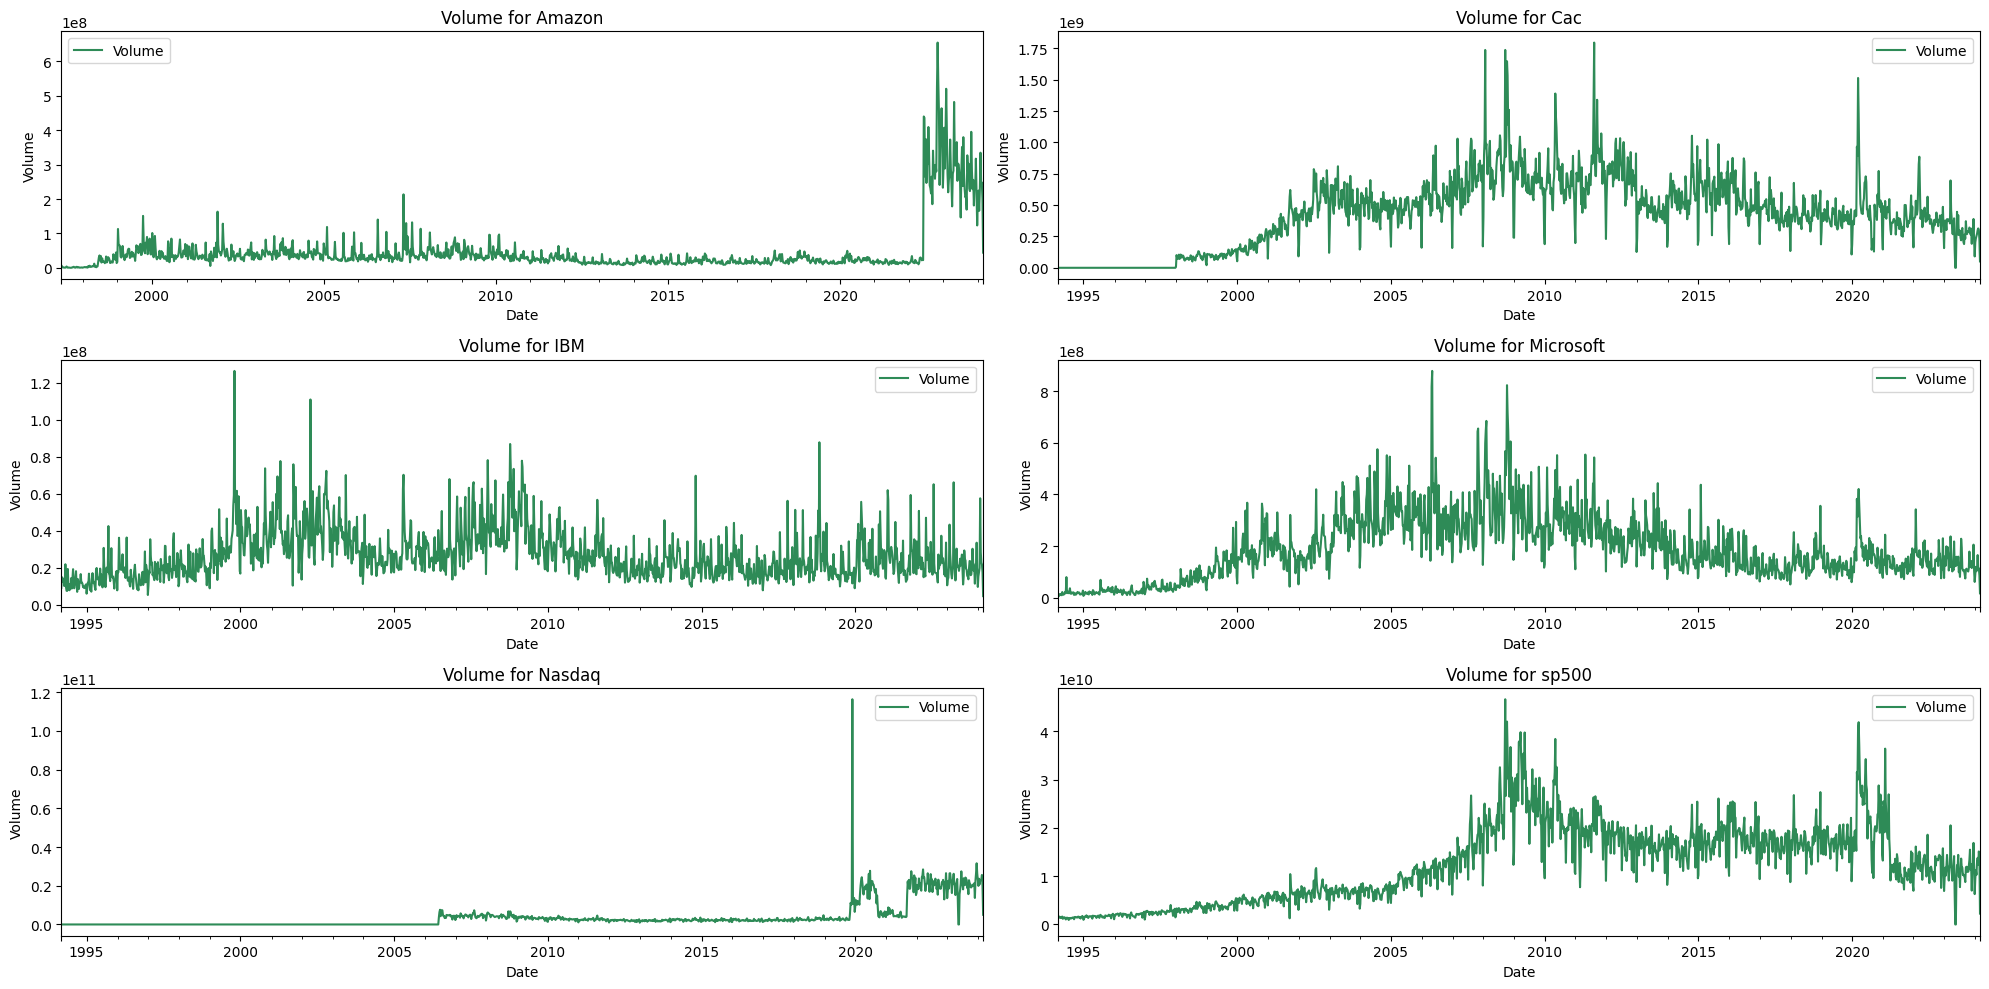

In [ ]:
#volumes
fig, axs = plt.subplots(3, 2, figsize=(20, 10))
for i in range(3):
    for j in range(2):
        plot_index = i * 2 + j
        dfs[plot_index].plot(x='Date', y='Volume', ax=axs[i, j], color = 'seagreen')
        axs[i, j].set_title(f'Volume for {dfs_names[plot_index]}')
        axs[i, j].set_xlabel('Date')
        axs[i, j].set_ylabel('Volume')
plt.gca().set_facecolor('none')  # Transparent background
plt.gca().patch.set_alpha(0.0)


plt.tight_layout()
  # Specifica il nome del file e imposta il background trasparente

plt.show()

In [ ]:
# Plot volume for nasdaq
plt.plot(nasdaq_df['Date'], nasdaq_df['Volume'], color='seagreen')
plt.title('Volume for NASDAQ', fontsize=18, color='black')  # Aggiungi il titolo
plt.xlabel('Date', fontsize=14, color='black')  # Etichetta dell'asse x
plt.ylabel('Volume', fontsize=14, color='black')  # Etichetta dell'asse y

# Imposta lo sfondo trasparente
plt.gca().set_facecolor('none')
plt.gca().patch.set_alpha(0.0)

# Mostra griglia tratteggiata leggera
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')

# Salva l'immagine come PNG con sfondo trasparente
plt.savefig('volume_nasdaq.png', transparent=True)

# Chiudi la figura per liberare la memoria
plt.close()

# Mostra il grafico
plt.show()


In [ ]:
#adjust the volume outlier for nasdaq
nasdaq_df.loc[nasdaq_df['Volume']==nasdaq_df.Volume.max(),'Volume'] = 11634422000

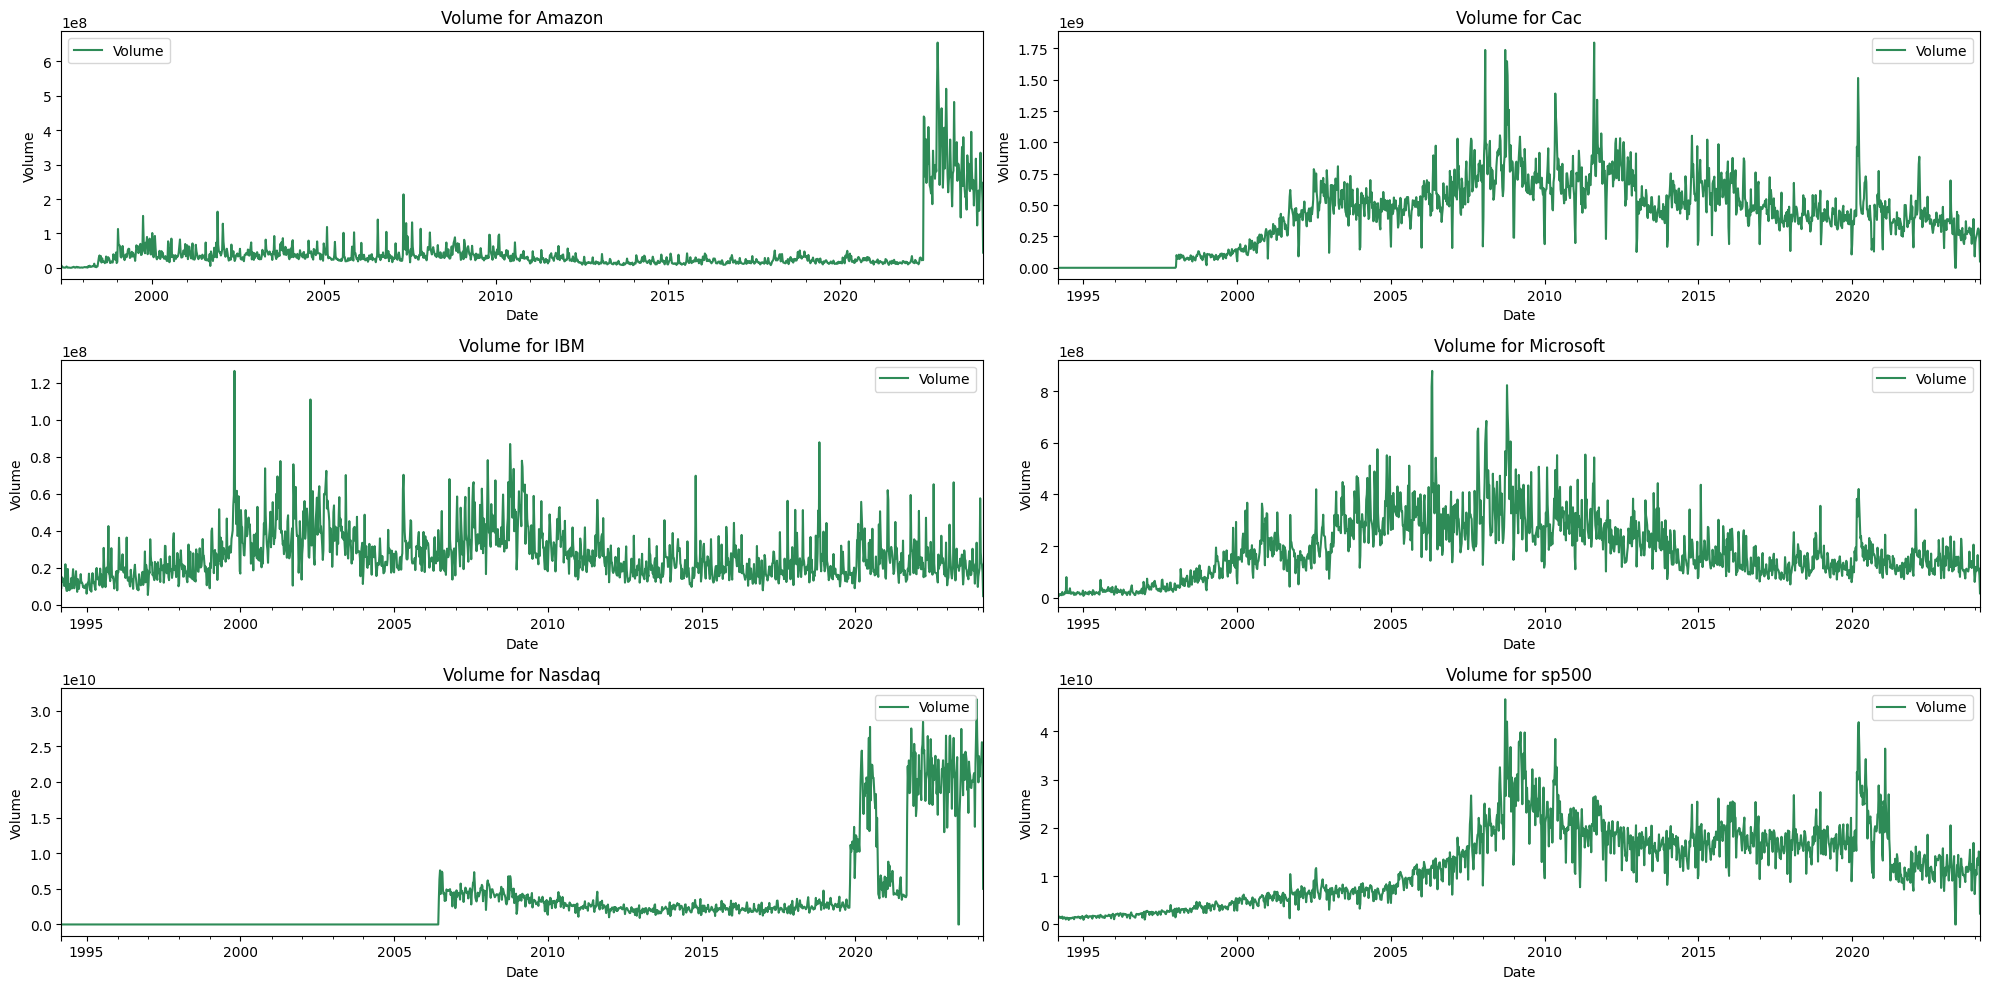

In [ ]:
#volumes
fig, axs = plt.subplots(3, 2, figsize=(20, 10))
for i in range(3):
    for j in range(2):
        plot_index = i * 2 + j
        dfs[plot_index].plot(x='Date', y='Volume', ax=axs[i, j], color = 'seagreen')
        axs[i, j].set_title(f'Volume for {dfs_names[plot_index]}')
        axs[i, j].set_xlabel('Date')
        axs[i, j].set_ylabel('Volume')
plt.gca().set_facecolor('none')  # Transparent background
plt.gca().patch.set_alpha(0.0)

plt.tight_layout()
plt.show()

In [ ]:
#volume of nasdaq is not zero only from June 2006 on
nasdaq_df[nasdaq_df.Volume !=0].head()

Date     Open     High      Low    Close      Volume
641 2006-06-18  2137.47  2147.91  2065.11  2129.95  3590464523
642 2006-06-25  2136.60  2152.56  2103.77  2121.47  6356132033
643 2006-07-02  2126.46  2183.48  2090.78  2172.09  7589173242
644 2006-07-09  2177.91  2190.44  2126.64  2130.06  4263156577
645 2006-07-16  2135.96  2142.36  2027.11  2037.35  6692935710

In [ ]:
#volume of cac is not zero only from January 1998 on
cac_df[cac_df.Volume !=0].head()

Date     Open     High      Low    Close       Volume
200 1998-01-04  2888.63  3048.00  2888.63  3040.14    6752690.0
201 1998-01-11  3023.43  3075.30  2902.13  2919.81  101046353.0
202 1998-01-18  2830.97  2976.85  2809.73  2976.09   78855452.0
203 1998-01-25  3004.86  3016.81  2944.29  2966.15   71560128.0
204 1998-02-01  2992.54  3173.98  2961.90  3172.14   86885992.0

Problem with Volumes:
- for nasdaq, it's 0 before 2006.
- for caa, it's 0 before 1998

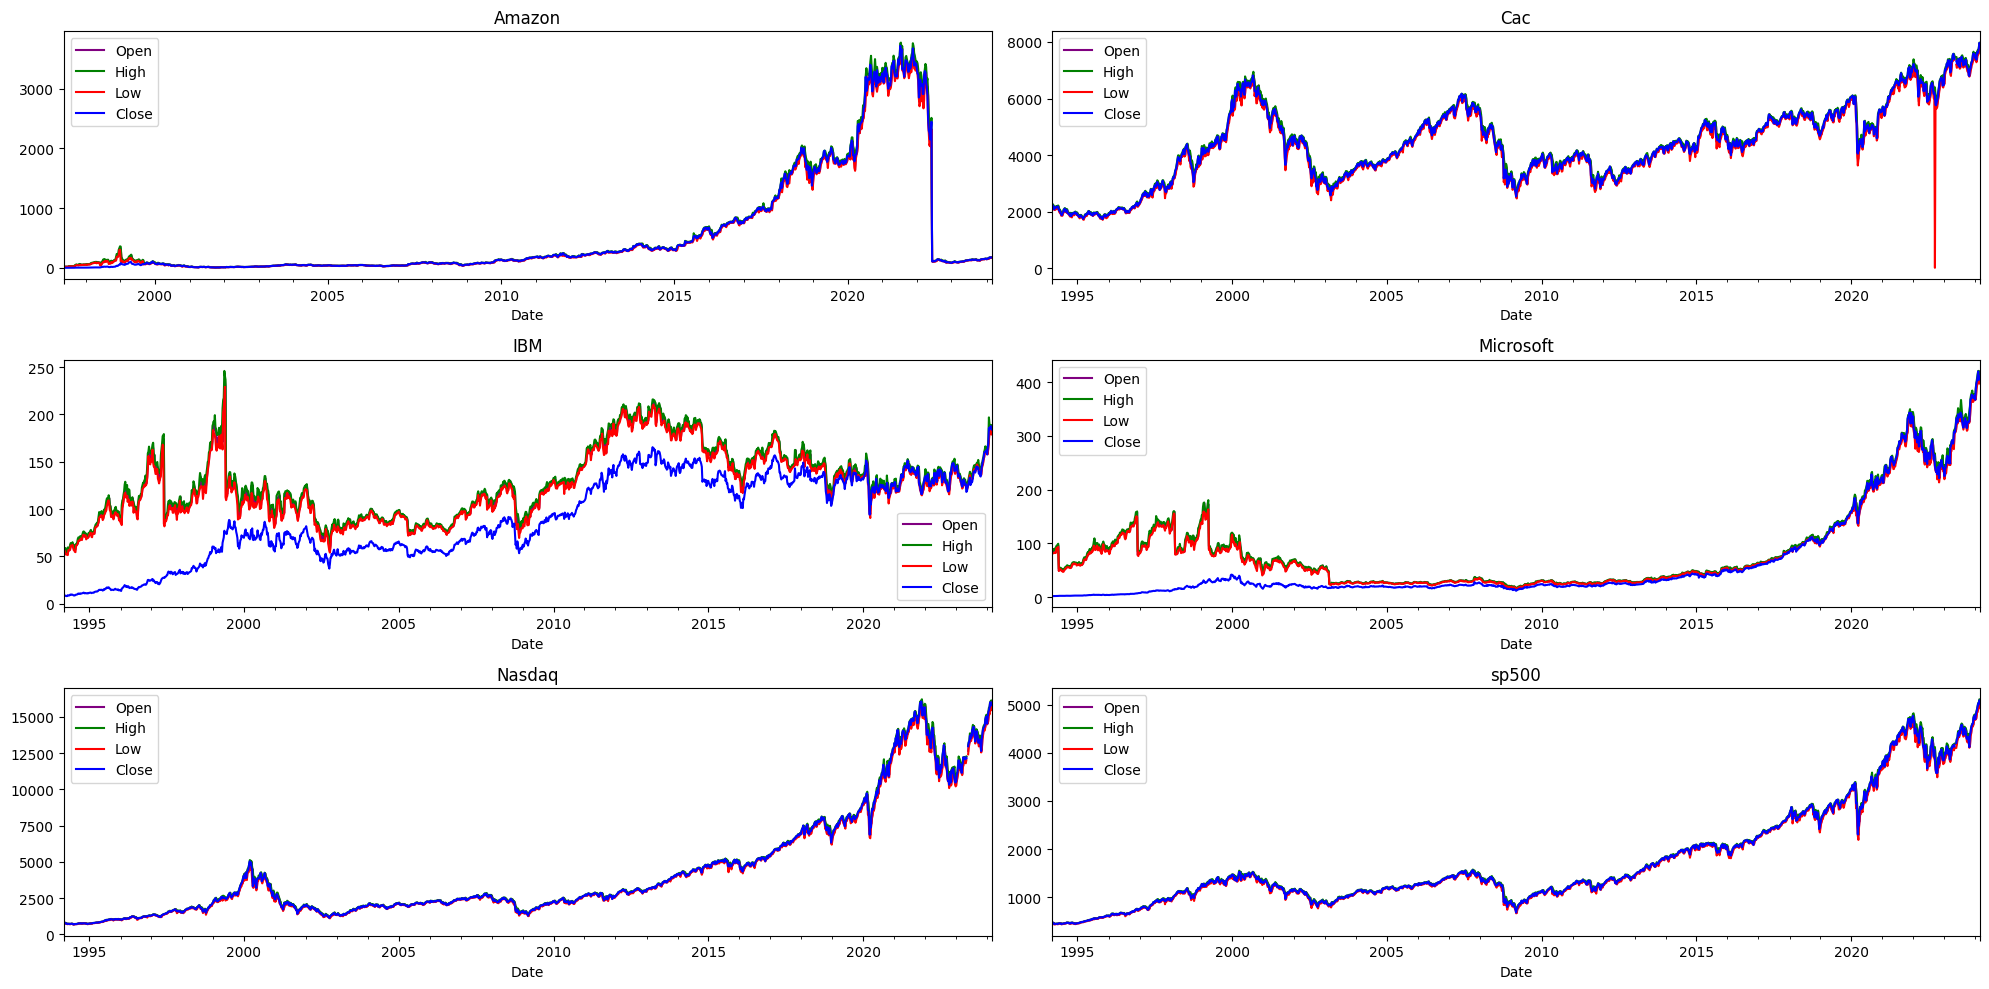

In [ ]:
#prices: open, high, close, low BEFORE preprocessing
fig, axs = plt.subplots(3, 2, figsize=(20, 10))
for i in range(3):
    for j in range(2):
        plot_index = i * 2 + j
        dfs[plot_index].plot(x='Date', y='Open', ax=axs[i, j], color = 'purple')
        dfs[plot_index].plot(x='Date', y='High', ax=axs[i, j], color = 'green')
        dfs[plot_index].plot(x='Date', y='Low', ax=axs[i, j], color = 'red')
        dfs[plot_index].plot(x='Date', y='Close', ax=axs[i, j], color = 'blue')
        axs[i, j].set_title(f'{dfs_names[plot_index]}')
        axs[i, j].set_xlabel('Date')

plt.tight_layout()
plt.show()

- Cac: on 2022-09-18 we had a problem with the 'Low'. We replace it from Yahoo finance.

In [ ]:
#replacing the value for the lowest (nonsense) value for Cac on 2022-09-18
cac_df.loc[cac_df['Low']==cac_df['Low'].min(), 'Low'] = 6052.42

In [ ]:
#fillna cac
cac_df.loc[cac_df['Date']==pd.to_datetime('2023-05-14'), 'Low'] = 7354.54
cac_df.loc[cac_df['Date']==pd.to_datetime('2023-05-14'), 'High'] = 7523.56
cac_df.loc[cac_df['Date']==pd.to_datetime('2023-05-14'), 'Close'] = 7491.96
cac_df.loc[cac_df['Date']==pd.to_datetime('2023-05-14'), 'Open'] = 7443.38

cac_df.loc[cac_df['Date']==pd.to_datetime('2023-05-21'), 'Low'] = 7197.40
cac_df.loc[cac_df['Date']==pd.to_datetime('2023-05-21'), 'High'] = 7493.38
cac_df.loc[cac_df['Date']==pd.to_datetime('2023-05-21'), 'Close'] = 7319.18
cac_df.loc[cac_df['Date']==pd.to_datetime('2023-05-21'), 'Open'] = 7467.93

In [ ]:
#fillna nasdaq
nasdaq_df.loc[nasdaq_df['Date']==pd.to_datetime('2023-05-14'), 'Low'] = 12174.06
nasdaq_df.loc[nasdaq_df['Date']==pd.to_datetime('2023-05-14'), 'High'] = 12364.65
nasdaq_df.loc[nasdaq_df['Date']==pd.to_datetime('2023-05-14'), 'Close'] = 12284.74
nasdaq_df.loc[nasdaq_df['Date']==pd.to_datetime('2023-05-14'), 'Open'] = 12231.68

nasdaq_df.loc[nasdaq_df['Date']==pd.to_datetime('2023-05-21'), 'Low'] = 12263.35
nasdaq_df.loc[nasdaq_df['Date']==pd.to_datetime('2023-05-21'), 'High'] = 12731.73
nasdaq_df.loc[nasdaq_df['Date']==pd.to_datetime('2023-05-21'), 'Close'] = 12657.90
nasdaq_df.loc[nasdaq_df['Date']==pd.to_datetime('2023-05-21'), 'Open'] = 12301.17

In [ ]:
#fillna sp500
sp500_df.loc[sp500_df['Date']==pd.to_datetime('2023-05-14'), 'Low'] = 4109.86
sp500_df.loc[sp500_df['Date']==pd.to_datetime('2023-05-14'), 'High'] = 4212.91
sp500_df.loc[sp500_df['Date']==pd.to_datetime('2023-05-14'), 'Close'] = 4191.98
sp500_df.loc[sp500_df['Date']==pd.to_datetime('2023-05-14'), 'Open'] = 4126.65

sp500_df.loc[sp500_df['Date']==pd.to_datetime('2023-05-21'), 'Low'] =4103.98
sp500_df.loc[sp500_df['Date']==pd.to_datetime('2023-05-21'), 'High'] = 4212.87
sp500_df.loc[sp500_df['Date']==pd.to_datetime('2023-05-21'), 'Close'] = 4205.45
sp500_df.loc[sp500_df['Date']==pd.to_datetime('2023-05-21'), 'Open'] = 4190.78

Amazon splits:
- 1998-06-02 2:1
- 1999-01-05 3:1
- 1999-09-05 2:1
- 2022-06-06 20:1

In [ ]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399 entries, 0 to 1398
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1399 non-null   datetime64[ns]
 1   Open    1399 non-null   float64       
 2   High    1399 non-null   float64       
 3   Low     1399 non-null   float64       
 4   Close   1399 non-null   float64       
 5   Volume  1399 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 65.7 KB


In [ ]:
amazon_df[(amazon_df['Date']<=pd.to_datetime('2022-06-14')) & (amazon_df['Date']>=pd.to_datetime('2022-05-28'))]

Date       Open     High      Low      Close     Volume
1306 2022-05-29  2169.2200  2303.74  2025.20  2302.9299   24434341
1307 2022-06-05  2325.6001  2512.20  2313.50  2447.0000   22763868
1308 2022-06-12   125.2450   128.99   109.05   109.6500  439648156

In [ ]:
# adjust all past prices for the 2022-06-06 split
amazon_df.loc[amazon_df['Date']<=pd.to_datetime('2022-06-06'),['Open', 'High', 'Low', 'Close']]=amazon_df.loc[amazon_df['Date']<=pd.to_datetime('2022-06-06'),['Open', 'High', 'Low', 'Close']]/20

# adjust problematic section where low is higher than close
amazon_df.loc[amazon_df['Date']<=pd.to_datetime('1999-08-29'),['Open', 'High', 'Low']]=amazon_df.loc[amazon_df['Date']<=pd.to_datetime('1999-08-29'),['Open', 'High', 'Low']]/2
amazon_df.loc[amazon_df['Date']<=pd.to_datetime('1999-01-03'),['Open', 'High', 'Low']]=amazon_df.loc[amazon_df['Date']<=pd.to_datetime('1999-01-03'),['Open', 'High', 'Low']]/3
amazon_df.loc[amazon_df['Date']<=pd.to_datetime('1998-05-31'),['Open', 'High', 'Low']]=amazon_df.loc[amazon_df['Date']<=pd.to_datetime('1998-05-31'),['Open', 'High', 'Low']]/2

# adjust the volume before 2022-06-06 split
amazon_df.loc[amazon_df['Date']<=pd.to_datetime('2022-06-06'),'Volume'] = amazon_df.loc[amazon_df['Date']<=pd.to_datetime('2022-06-06'),'Volume']*20

# assuming volumes were also incorrect for the periods where Open, High and Low were adjusted, we also adjust volumes
amazon_df.loc[amazon_df['Date']<=pd.to_datetime('1999-08-29'),'Volume'] = amazon_df.loc[amazon_df['Date']<=pd.to_datetime('1999-08-29'),'Volume']*2
amazon_df.loc[amazon_df['Date']<=pd.to_datetime('1999-01-03'),'Volume'] = amazon_df.loc[amazon_df['Date']<=pd.to_datetime('1999-01-03'),'Volume']*3
amazon_df.loc[amazon_df['Date']<=pd.to_datetime('1998-05-31'),'Volume'] = amazon_df.loc[amazon_df['Date']<=pd.to_datetime('1998-05-31'),'Volume']*2

In [ ]:
amazon_df[amazon_df['Close']<amazon_df['Low']]

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []

In [ ]:
amazon_df[amazon_df['Close']>amazon_df['High']]
# This is fine, in 1999-08-15 close and high were exactly the same, this comes down to rounding

Date      Open      High       Low    Close      Volume
29  1997-12-07  0.211979  0.229688  0.206771  0.22969   212712000
117 1999-08-15  2.287500  2.435938  2.050000  2.43594  1716340000

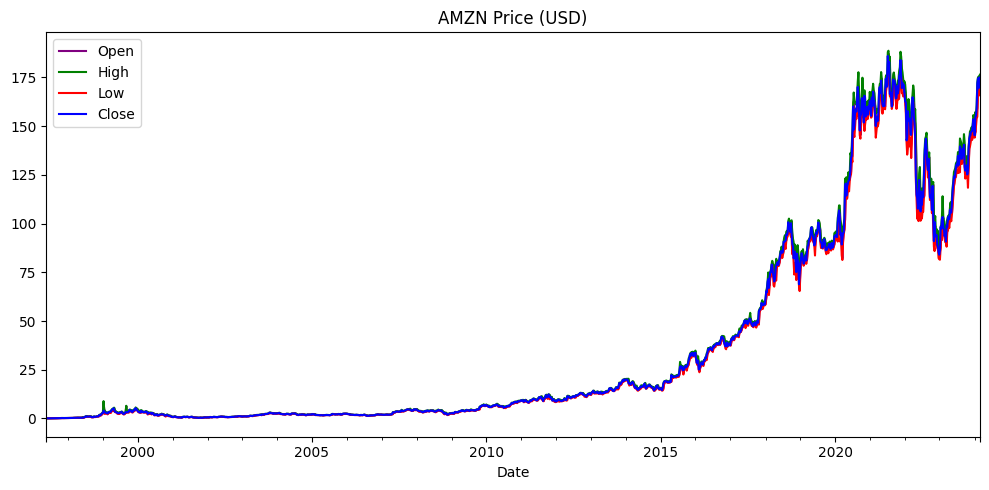

In [ ]:
fig,ax=plt.subplots(figsize=(10,5))

amazon_df.plot(x='Date', y='Open', ax=ax, color = 'purple')
amazon_df.plot(x='Date', y='High', ax=ax, color = 'green')
amazon_df.plot(x='Date', y='Low', ax=ax, color = 'red')
amazon_df.plot(x='Date', y='Close', ax=ax, color = 'blue')
ax.set_title('AMZN Price (USD)')
ax.set_xlabel('Date')

plt.tight_layout()
plt.show()

All good with Amazon now.

IBM stock splits:
- 1964-05-18 2:1
- 1966-05-18 2:1
- 1968-05-23 2:1
- 1973-05-29 5:4
- 1979-05-21 4:1
- 1997-05-28 2:1
- 1999-05-27 2:1
- 2021-11-04 1046:1000


In [ ]:
ibm_df_subset=ibm_df[ibm_df['Close']<ibm_df['Low']]
ibm_df_subset

Date     Open     High      Low     Close    Volume
0    1994-03-06   53.125   53.875   52.125    8.0537   9055900
1    1994-03-13   53.000   56.250   51.375    8.5512  14884100
2    1994-03-20   56.125   58.375   55.875    8.7424  12402200
3    1994-03-27   56.875   58.875   53.625    8.2642  12237600
4    1994-04-03   54.375   55.000   52.000    8.3599  14114100
...         ...      ...      ...      ...       ...       ...
1543 2023-10-01  146.570  147.430  139.610  137.4734  23445500
1544 2023-10-08  140.040  142.940  139.860  139.1685  15932300
1545 2023-10-15  142.300  143.420  138.270  135.6704  16385600
1546 2023-10-22  139.280  140.620  136.310  134.3966  21043800
1557 2024-01-07  162.830  163.290  158.670  157.7221  15322500

[1370 rows x 6 columns]

In [ ]:
ibm_df[(ibm_df['Date']>pd.to_datetime('1999-05-01')) & (ibm_df['Date']<pd.to_datetime('1999-06-27'))]

Date      Open      High       Low    Close    Volume
269 1999-05-02  204.7500  215.2500  202.3125  67.3741  35623600
270 1999-05-09  208.0000  217.5000  206.3125  70.0107  23481700
271 1999-05-16  217.2500  246.0000  215.5000  77.1004  36196600
272 1999-05-23  236.0000  240.6250  229.1875  74.2403  20666100
273 1999-05-30  230.3125  236.6250  112.6250  74.7641  34247700
274 1999-06-06  113.6250  116.0000  109.4375  74.7641  24534900
275 1999-06-13  118.1250  121.6875  112.5625  73.6765  28775600
276 1999-06-20  115.8750  122.0000  114.0000  77.8256  30580200

In [ ]:
ibm_df[(ibm_df['Date']>pd.to_datetime('1997-05-01')) & (ibm_df['Date']<pd.to_datetime('1997-06-28'))]

Date     Open      High      Low    Close    Volume
165 1997-05-04  149.625  162.8750  149.125  25.7292  17726600
166 1997-05-11  162.875  169.2500  162.125  26.6465  16971200
167 1997-05-18  168.250  177.1250  168.125  27.0445  19115900
168 1997-05-25  169.875  177.3750  166.875  27.5817  12263000
169 1997-06-01  174.000  179.2500   84.500  27.5216  24707700
170 1997-06-08   87.750   87.8750   81.750  27.2437  21034800
171 1997-06-15   86.000   89.7500   85.500  28.3172  18614500
172 1997-06-22   88.750   91.9375   88.250  28.5957  19400900

In [ ]:
ibm_df[(ibm_df['Date']>pd.to_datetime('2023-12-20')) & (ibm_df['Date']<pd.to_datetime('2024-01-20'))]

Date    Open    High     Low     Close    Volume
1555 2023-12-24  162.23  163.33  159.53  160.6751  17732400
1556 2023-12-31  162.23  164.18  162.05  162.0724   9603900
1557 2024-01-07  162.83  163.29  158.67  157.7221  15322500
1558 2024-01-14  158.69  165.98  157.89  164.3021  17641300

In [ ]:
ibm_df_subset.loc[ibm_df_subset['Date']<=pd.to_datetime('2021-11-04'),['Open', 'High', 'Low']]=ibm_df_subset.loc[ibm_df_subset['Date']<=pd.to_datetime('2021-11-04'),['Open', 'High', 'Low']]/1.046

# adjust for the 1999-05-27 split, plus the Open and High at 1999-05-30, which are an anomaly in the dataset
ibm_df_subset.loc[ibm_df_subset['Date']<=pd.to_datetime('1999-05-27'),['Open', 'High', 'Low']]=ibm_df_subset.loc[ibm_df_subset['Date']<=pd.to_datetime('1999-05-27'),['Open', 'High', 'Low']]/2
ibm_df_subset.loc[ibm_df_subset['Date']==pd.to_datetime('1999-05-30'),['Open', 'High']]=ibm_df_subset.loc[ibm_df_subset['Date']==pd.to_datetime('1999-05-30'),['Open', 'High']]/2

# adjust for the 1997-05-28 split, plus the Open and High at 1997-06-01, which are an anomaly in the dataset
ibm_df_subset.loc[ibm_df_subset['Date']<=pd.to_datetime('1997-05-28'),['Open', 'High', 'Low']]=ibm_df_subset.loc[ibm_df_subset['Date']<=pd.to_datetime('1997-05-28'),['Open', 'High', 'Low']]/2
ibm_df_subset.loc[ibm_df_subset['Date']==pd.to_datetime('1997-06-01'),['Open', 'High']]=ibm_df_subset.loc[ibm_df_subset['Date']==pd.to_datetime('1997-06-01'),['Open', 'High']]/2

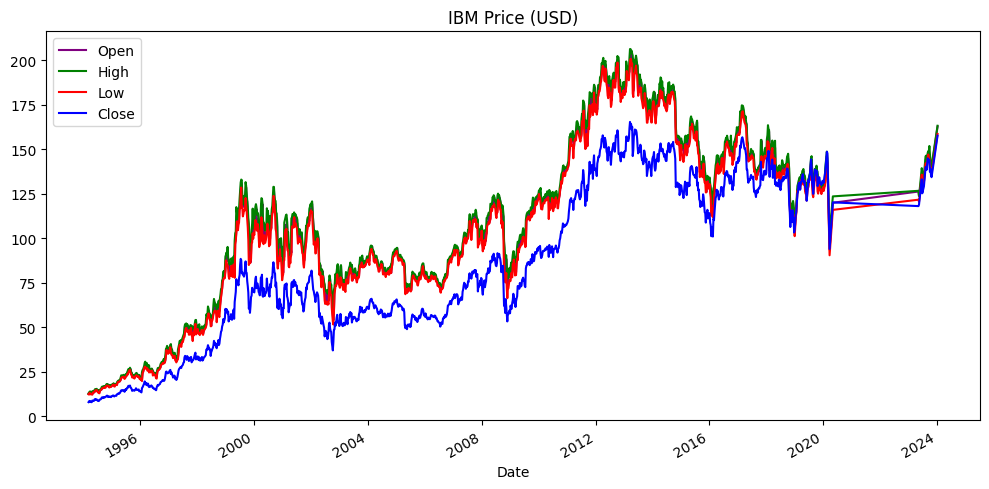

In [ ]:
fig,ax=plt.subplots(figsize=(10,5))

ibm_df_subset.plot(x='Date', y='Open', ax=ax, color = 'purple')
ibm_df_subset.plot(x='Date', y='High', ax=ax, color = 'green')
ibm_df_subset.plot(x='Date', y='Low', ax=ax, color = 'red')
ibm_df_subset.plot(x='Date', y='Close', ax=ax, color = 'blue')
ax.set_title('IBM Price (USD)')
ax.set_xlabel('Date')

plt.tight_layout()
plt.show()

In [ ]:
# The close price on 2024-01-14 is wrong, according to tradingview it is 159.16 USD


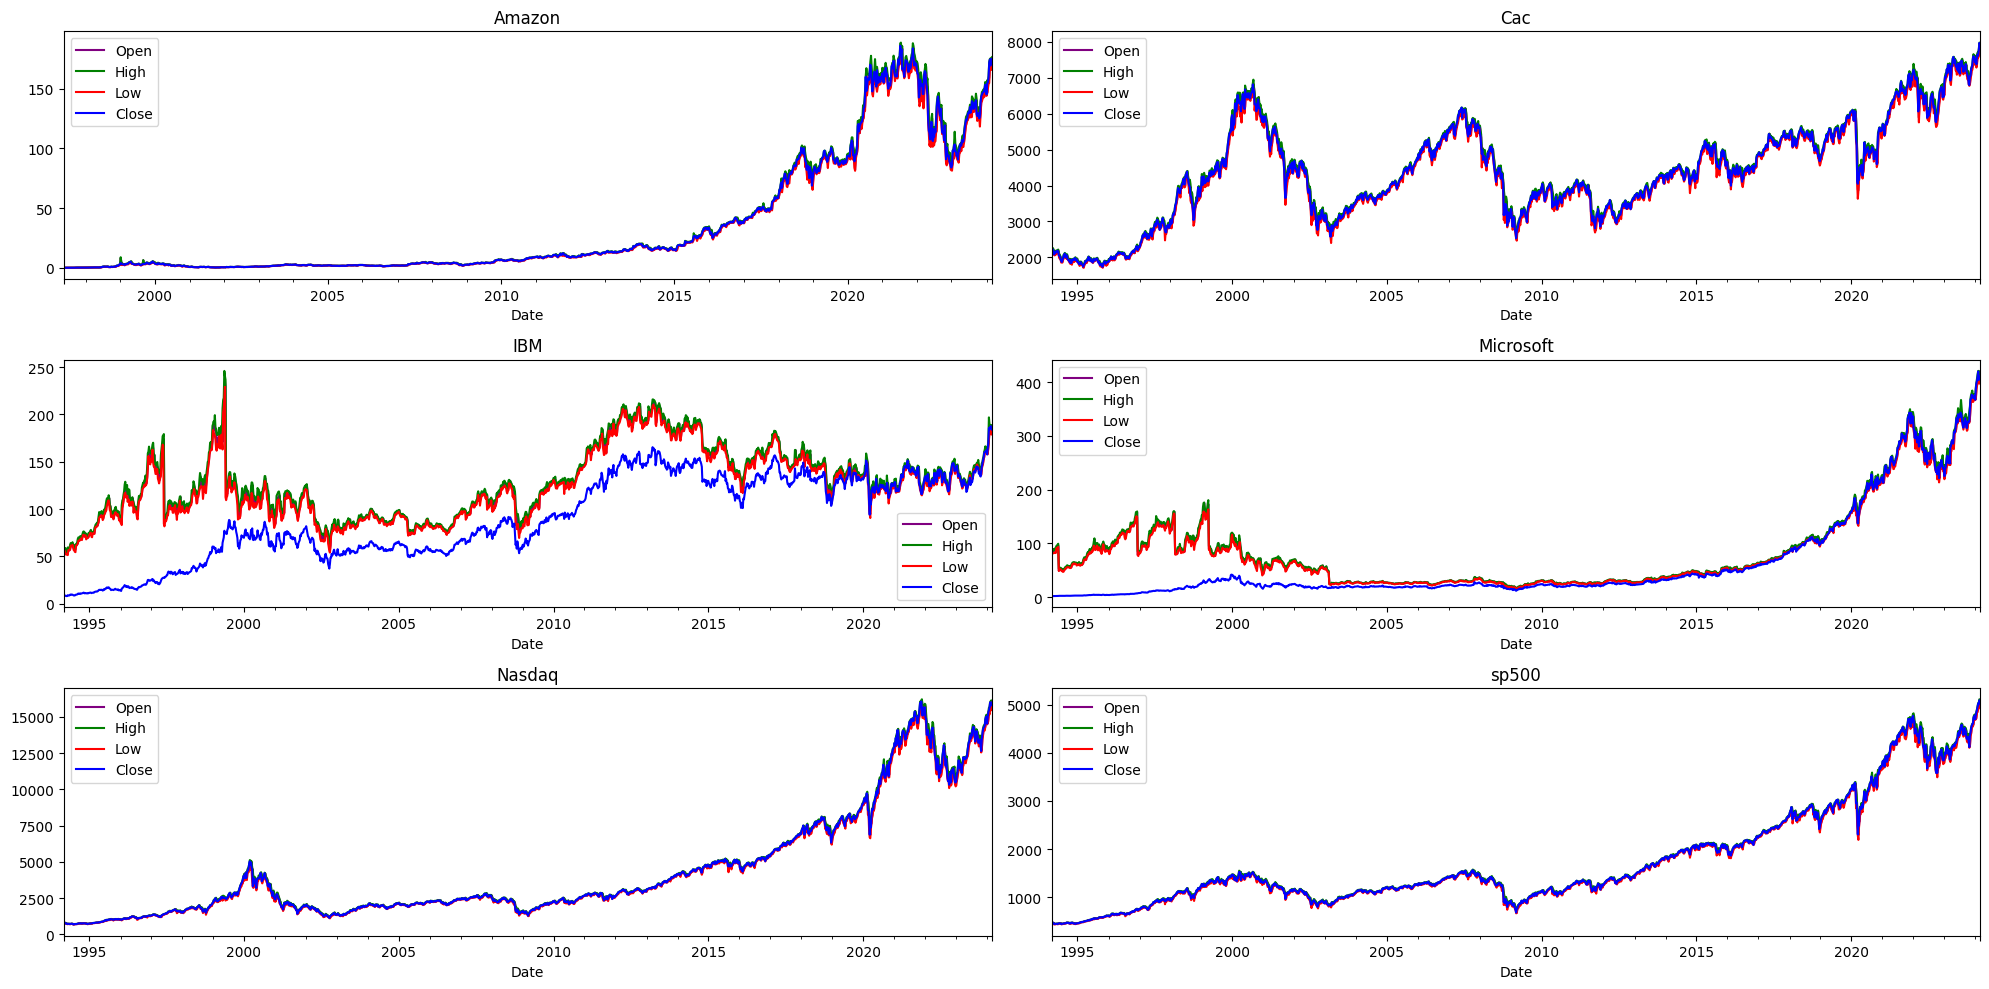

In [ ]:
#prices AFTER the cleaning of the Close prices
fig, axs = plt.subplots(3, 2, figsize=(20, 10))
for i in range(3):
    for j in range(2):
        plot_index = i * 2 + j
        dfs[plot_index].plot(x='Date', y='Open', ax=axs[i, j], color = 'purple')
        dfs[plot_index].plot(x='Date', y='High', ax=axs[i, j], color = 'green')
        dfs[plot_index].plot(x='Date', y='Low', ax=axs[i, j], color = 'red')
        dfs[plot_index].plot(x='Date', y='Close', ax=axs[i, j], color = 'blue')
        axs[i, j].set_title(f'{dfs_names[plot_index]}')
        axs[i, j].set_xlabel('Date')

plt.tight_layout()
plt.show()

In [ ]:
#investigate missing values for the datasets
for name, df in zip(dfs_names, dfs):
    missing_rows = df[df.isna().any(axis=1)]
    if not missing_rows.empty:
        print(f"DataFrame: {name}")
        print(missing_rows)

#for df in dfs:
    #df.dropna(inplace=True)

Close<Low:
- Data recording errors: Errors might have occurred during the process of recording or entering the data, leading to inconsistencies.
- Data adjustments: Sometimes, historical data might be adjusted to account for corporate actions such as stock splits, dividends, or other factors. If not handled properly, these adjustments could lead to inconsistencies.
- Data processing issues: Errors might occur during data processing, such as merging or joining datasets, which could result in incorrect values being assigned.

In [ ]:
#cases in which I have that Close<Low:
for df, name in zip(dfs, dfs_names):
    print(name, df[df['Close']<df['Low']])

Amazon Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []
Cac Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []
IBM            Date     Open     High      Low     Close    Volume
0    1994-03-06   53.125   53.875   52.125    8.0537   9055900
1    1994-03-13   53.000   56.250   51.375    8.5512  14884100
2    1994-03-20   56.125   58.375   55.875    8.7424  12402200
3    1994-03-27   56.875   58.875   53.625    8.2642  12237600
4    1994-04-03   54.375   55.000   52.000    8.3599  14114100
...         ...      ...      ...      ...       ...       ...
1543 2023-10-01  146.570  147.430  139.610  137.4734  23445500
1544 2023-10-08  140.040  142.940  139.860  139.1685  15932300
1545 2023-10-15  142.300  143.420  138.270  135.6704  16385600
1546 2023-10-22  139.280  140.620  136.310  134.3966  21043800
1557 2024-01-07  162.830  163.290  158.670  157.7221  15322500

[1370 rows x 6 columns]
Microsoft            Date    Open    High     Low       

SUM UP for Close<Low:
- Amazon: we have 120 rows between '97 and '99
- Cac: no case
- IBM: 1370 cases from 1994 to 2024
- Microsoft: 1285 cases from 1994 to 2023
- Nasdaq: no case
- sp500: no case

In [ ]:
#Check for duplicates
for df, name in zip(dfs, dfs_names):
    duplicates = df[df.duplicated()]
    print(name, duplicates)

Amazon Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []
Cac Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []
IBM Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []
Microsoft Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []
Nasdaq Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []
sp500 Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []


Outliers?

## PREPROCESSING

In [ ]:
from sklearn.preprocessing import StandardScaler

#scaler
scaler = StandardScaler()

#standardization of the prices
for df in dfs:
    df[['Close', 'Open', 'Low', 'High']] = scaler.fit_transform(df[['Close', 'Open', 'Low', 'High']])

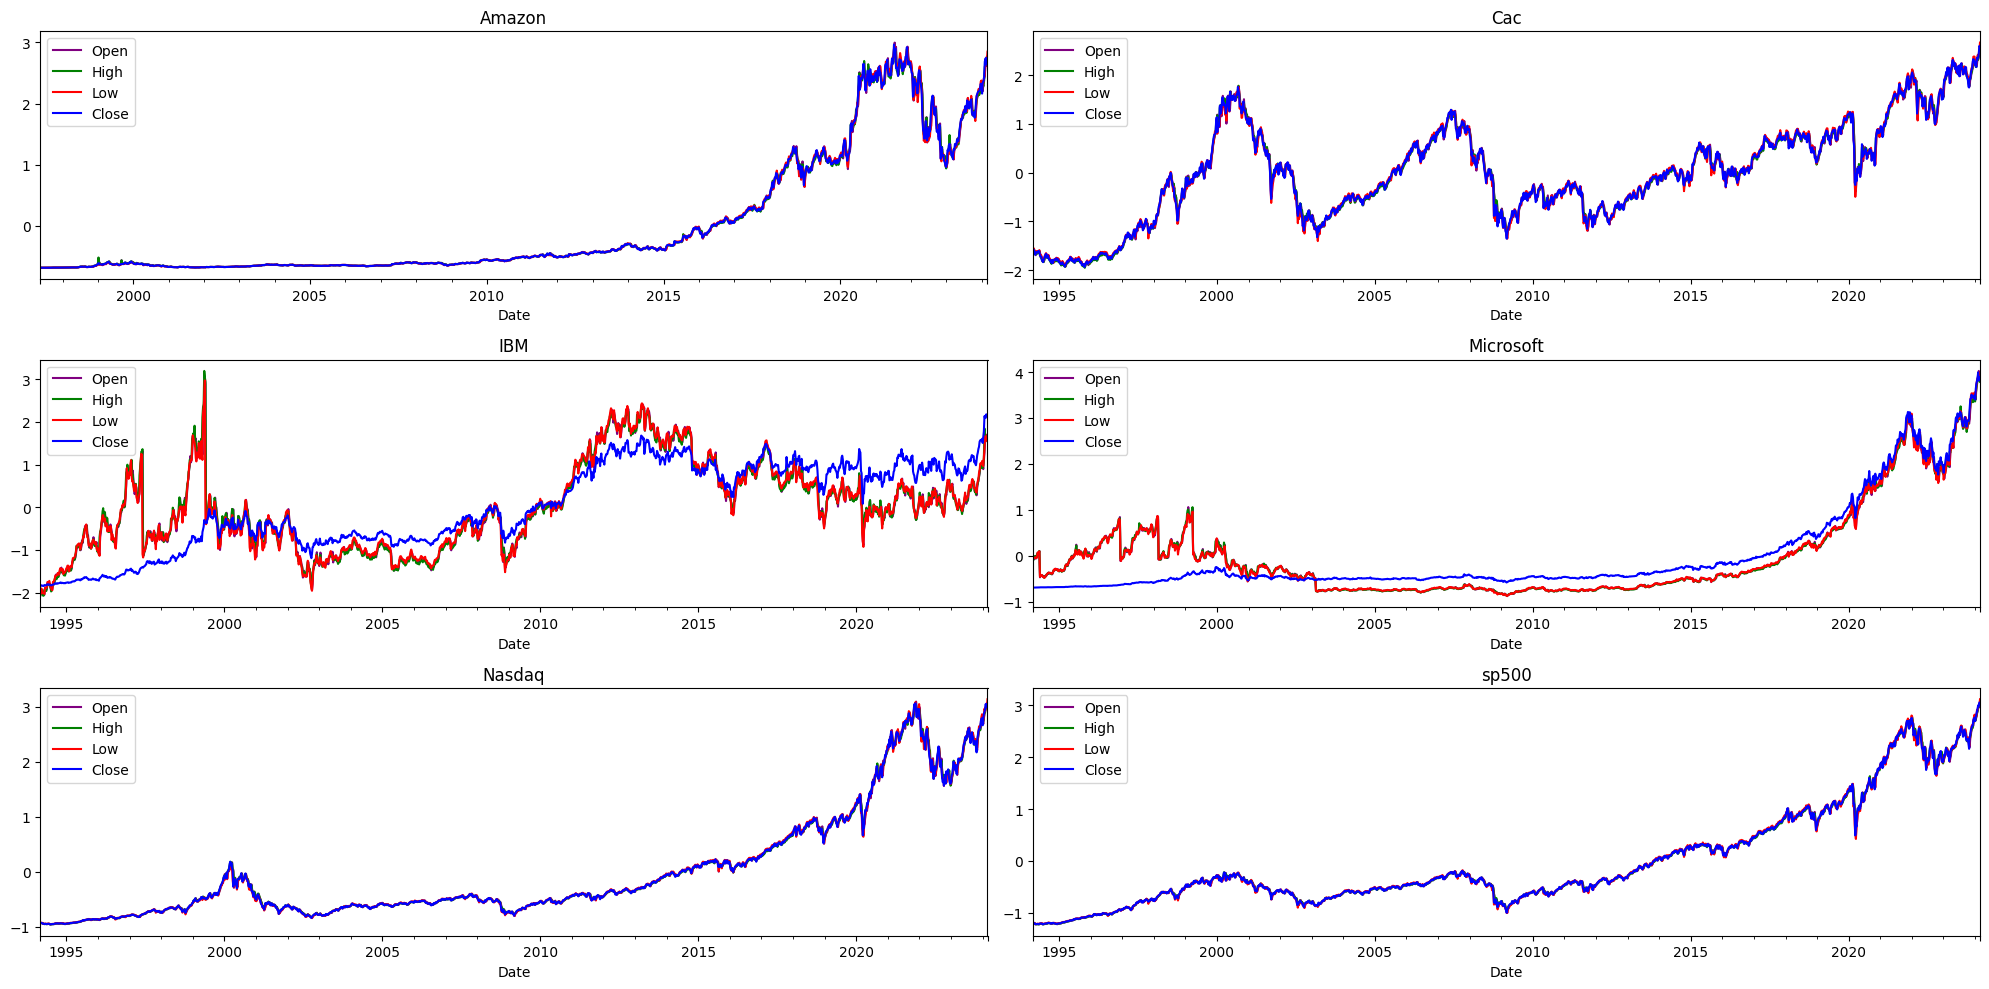

In [ ]:
#plots with standardized prices
fig, axs = plt.subplots(3, 2, figsize=(20, 10))
for i in range(3):
    for j in range(2):
        plot_index = i * 2 + j
        dfs[plot_index].plot(x='Date', y='Open', ax=axs[i, j], color = 'purple')
        dfs[plot_index].plot(x='Date', y='High', ax=axs[i, j], color = 'green')
        dfs[plot_index].plot(x='Date', y='Low', ax=axs[i, j], color = 'red')
        dfs[plot_index].plot(x='Date', y='Close', ax=axs[i, j], color = 'blue')
        axs[i, j].set_title(f'{dfs_names[plot_index]}')
        axs[i, j].set_xlabel('Date')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#scaler
scaler = MinMaxScaler()

#standardization of the prices
for df in dfs:
    df.loc[df['Volume']>0, ['Volume']] = scaler.fit_transform(df.loc[df['Volume']>0, ['Volume']])

#question: is it better to use RobustScaler to transform the volume? Take a look at it and try whether the performance is then getting better.

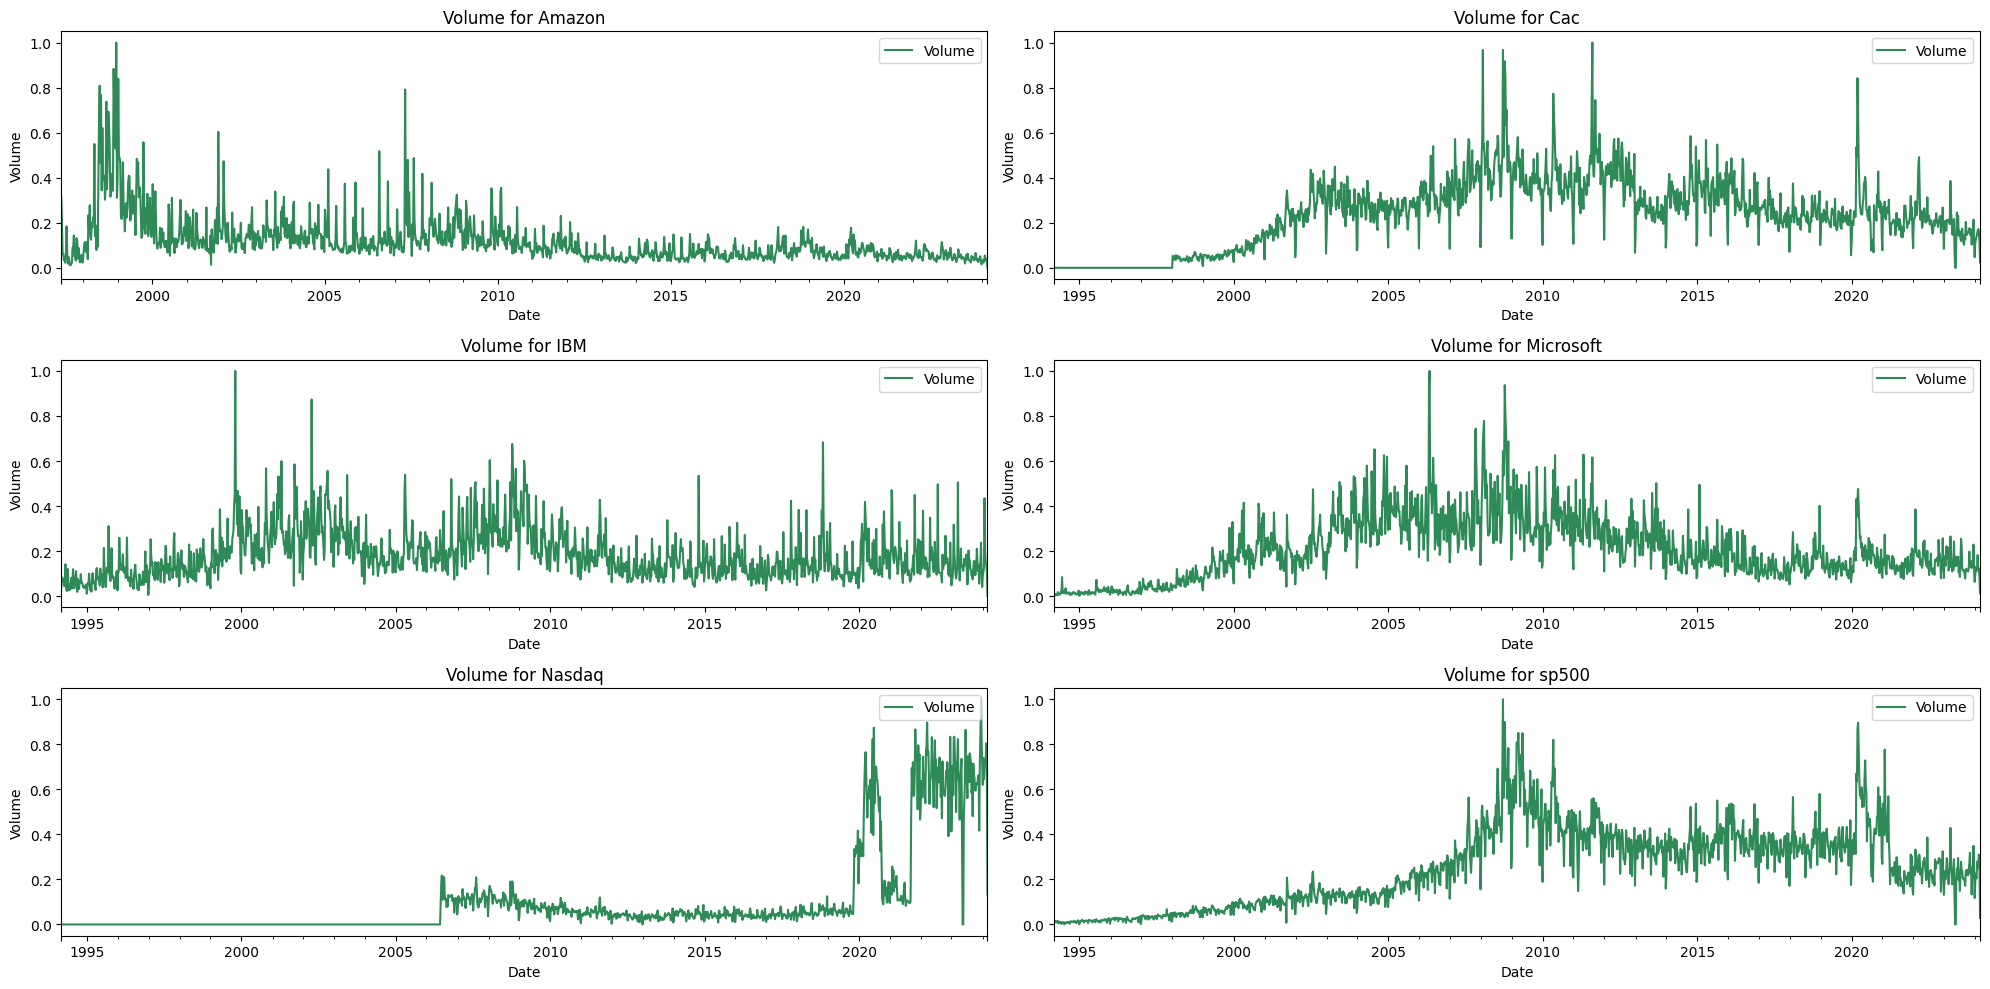

In [ ]:
#volume after the scaling
fig, axs = plt.subplots(3, 2, figsize=(20, 10))
for i in range(3):
    for j in range(2):
        plot_index = i * 2 + j
        dfs[plot_index].plot(x='Date', y='Volume', ax=axs[i, j], color = 'seagreen')
        axs[i, j].set_title(f'Volume for {dfs_names[plot_index]}')
        axs[i, j].set_xlabel('Date')
        axs[i, j].set_ylabel('Volume')
plt.tight_layout()
plt.show()

## ARIMA

- _AR(p) and MA(q)_

AR(p) and MA(q): these two methods are used to check how the stationarity is dependent on past errors or on past data respectively. In both case, the dependence is considered to be in additive way. The names clarify the two approaches: Moving Average and Autoregression; q is the number of the past errors the future data is depending upon, while p is the same but which past data.

- _ACF plots and ACF function_

Precondition: both ACF and PACF assume stationarity of the underlyinh time series.
Autocorrelation: correlation between a time series with a lagged version of itself. The ACF starts with a lag at 0, which is the correlation of the time series with itself t(therefore results in a correlation of 1).

https://towardsdatascience.com/interpreting-acf-and-pacf-plots-for-time-series-forecasting-af0d6db4061c#:~:text=in%20your%20browser.-,Autocorrelation%20Function%20(ACF),plot_acf%20function%20from%20the%20statsmodels.

Autocorrelation analysis helps detect pattern and check for randomness. It's very important when using ARMA model because it backs the finding of the parameters. ACF is giving you similarity, so it doesn't provide you any insight for a good estimation of p.
But, ACF is useful when it comes to work with MA(q). The ACF plot can tell things like the observed time series is white noise/random.
So, we have to move to PACF for p, which is a conditional correlation.The order is the dirrefence between the indexes of times (e.g.: it's 2 for t_1, t_3). If you calculate the PACF function of AR(p), it will be 0 after time lag = p. The cutting off of PACF(h) after p lags is the AR’s signature (p) model.

!!check parameter method = 'ols'

- _ARMa(p,q)_

It's a combination of the two model, and it's used to model stationary nonseasonal time series data. To select the best model, we compute the BIC for all the three and select the one which has the lowest value. To get the best parameters, we should compute AIC or BIC over a subset of p,q.

- _ARIMA(d,p,q)_

Change data into stationary data by transformation and differencing. (I)
Apply AR and MA models to estimate the dependence structure of the differenced time series and predict.
That’s AR + I + MA = ARIMA for you.

- _lollipop plots_

The blue area you see in ACF and PACF plots is the confidence interval and is an indicator of the significance threshold. TO DETERMINE THE ORDER OF THE MODEL: how many lollipopos are above/below the confidence interval before the next lollipop enters the blue area?


In [ ]:
# Calculate RSI (Relative Strength Index)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Calculate MACD (Moving Average Convergence Divergence)
def calculate_macd(data, short_window=12, long_window=26):
    short_ema = data['Close'].ewm(span=short_window, min_periods=1).mean()
    long_ema = data['Close'].ewm(span=long_window, min_periods=1).mean()
    macd = short_ema - long_ema
    signal_line = macd.ewm(span=9, min_periods=1).mean()
    return macd, signal_line

In [ ]:
for df in dfs:
    # Calculate moving averages (e.g., 10-day and 50-day)
    df['MA10'] = df['Close'].rolling(window=10).mean()
    df['MA40'] = df['Close'].rolling(window=40).mean()
    df['MACD'], df['Signal_Line'] = calculate_macd(df)
    df['RSI'] = calculate_rsi(df)

NameError: name 'calculate_macd' is not defined

In [ ]:
#Augmented Dickey-Fuller (ADF) test on each time series provided in the dfs list.
#The ADF test is a statistical test used to determine whether a unit root is present in a time series dataset.
#A unit root indicates that the series is non-stationary, meaning it has a trend or seasonality that needs to be removed for accurate analysis.

from statsmodels.tsa.stattools import adfuller

#  Define a function adf_check that takes a time series as input and performs the ADF test on it.
def adf_check(time_series):
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Number of Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        #Checks if the p-value from the ADF test is less than or equal to 0.05, which is a common significance level.
        #If so, it indicates evidence against the null hypothesis of a unit root being present.
        print(f"Reject the null hypothesis. Data has no unit root and is stationary.")
    else:
        #If the p-value is greater than 0.05, the null hypothesis cannot be rejected.
        print(f"Fail to reject the null hypothesis. Time series has a unit root, indicating it is non-stationary.")

In [ ]:
#check: close and volume don't have inf values
for df in dfs:
    inf_close = np.isinf(df['Close']).any()
    inf_volume = np.isinf(df['Volume']).any()
    print(inf_close, inf_volume)

False False
False False
False False
False False
False False
False False


In [ ]:
#check: close and volume don't have nan
for df in dfs:
    nan_close = (df['Close']).isna().sum()
    nan_volume = (df['Volume']).isna().sum()
    print(nan_close, nan_volume)


0 0
0 0
0 0
0 0
0 0
0 0


Reference for parameters selection:
https://analyticsindiamag.com/quick-way-to-find-p-d-and-q-values-for-arima/

In [ ]:
#split train and test
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
import plotly.graph_objects as go
from pandas import DateOffset
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot

The ARIMA model aims to capture the temporal dependencies and patterns in the time series data, making it suitable for forecasting future values.

Working Principles:
- Identifying Stationarity: ARIMA models require the time series data to be stationary. Stationarity implies that the statistical properties of the time series (like mean and variance) remain constant over time.
- Parameter Estimation: Estimating the parameters p, d, and q involves analyzing the autocorrelation function (ACF) and partial autocorrelation function (PACF) plots of the time series data. ACF helps determine the MA order (q), while PACF aids in determining the AR order (p).
- Model Fitting: Once the parameters are determined, the ARIMA model is fitted to the data. This involves minimizing the error (often using methods like maximum likelihood estimation) to obtain the most suitable coefficients for the autoregressive and moving average terms.
- Forecasting: After fitting the model, it can be used to forecast future values by iterating over time.

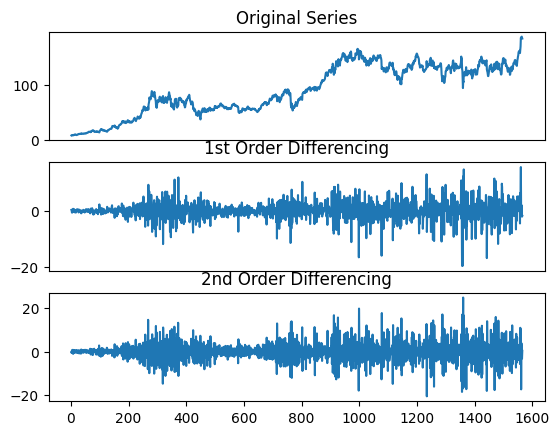

In [ ]:
#selection of d parameter for IBM
#as the Close are not stationary, we should consider d such as they would become so.
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(ibm_df.Close); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
    # 1st Differencing
ax2.plot(ibm_df.Close.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
    # 2nd Differencing
ax3.plot(ibm_df.Close.diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

#--> to get standardized data, we use the log on the close prices and check it with adf_check

In [ ]:
#correzione esponenziale di ibm con il logaritmo
ibm_df['Log Close'] = np.log(ibm_df['Close']+2)

ibm_df['Log Close First Difference'] = ibm_df['Log Close']- ibm_df['Log Close'].shift(1)
adf_check(ibm_df['Log Close First Difference'].dropna())

ibm_df['Log Close Second Difference'] = ibm_df['Log Close First Difference']- ibm_df['Log Close First Difference'].shift(1)
adf_check(ibm_df['Log Close Second Difference'].dropna())

ibm_df['Log Seasonal Difference'] = ibm_df['Log Close'] - ibm_df['Log Close'].shift(52)
adf_check(ibm_df['Log Seasonal Difference'].dropna())

ibm_df['Seasonal First Difference'] = ibm_df['Log Close First Difference'] - ibm_df['Log Close First Difference'].shift(54)
adf_check(ibm_df['Seasonal First Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -19.536188297691258
p-value : 0.0
#Number of Lags Used : 4
Number of Observations Used : 1560
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -14.653312347956488
p-value : 3.472733551056638e-27
#Number of Lags Used : 22
Number of Observations Used : 1541
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -4.379867216571514
p-value : 0.00032215520708563805
#Number of Lags Used : 13
Number of Observations Used : 1500
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -11.055227703769335
p-value : 4.96420843276281e-20
#Number of Lags Used : 18
Number of Observations Used : 1492
Reject the null hypothesis. Data has no unit root and is stationary.


Error in callback <function _draw_all_if_interactive at 0x796133c15120> (for post_execute):


KeyboardInterrupt: 

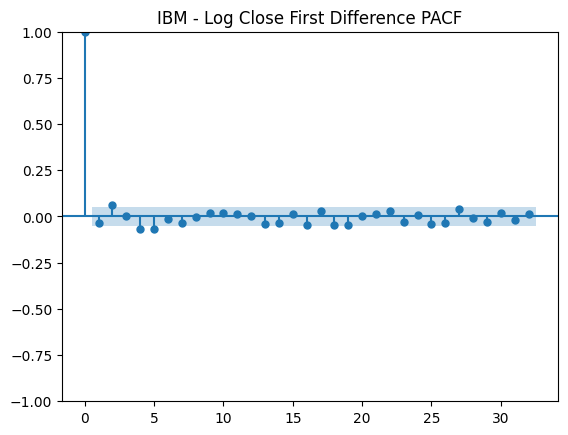

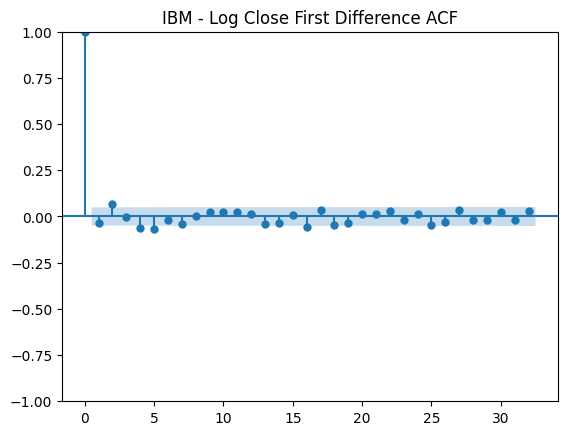

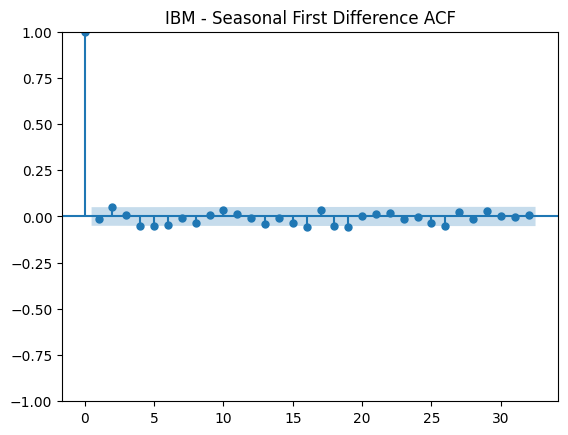

In [ ]:
#selection of p and q for IBM
fig_first = plot_pacf(ibm_df['Log Close First Difference'].dropna(), title='IBM - Log Close First Difference PACF')
second_first = plot_acf(ibm_df['Log Close First Difference'].dropna(), title='IBM - Log Close First Difference ACF')

    # Seasonal First Difference
fig_seasonal_first = plot_acf(ibm_df["Seasonal First Difference"].dropna(), title='IBM - Seasonal First Difference ACF')


In [ ]:
train_size_ibm = int(len(ibm_df) * 0.8)  # 80% for training
ibm_train, ibm_test = ibm_df[:train_size_ibm], ibm_df[train_size_ibm:]
ibm_test.set_index('Date', inplace=True)
ibm_train.set_index('Date', inplace=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Log Close   No. Observations:                 1252
Model:                 ARIMA(2, 2, 1)   Log Likelihood                2397.538
Date:                Thu, 18 Apr 2024   AIC                          -4787.076
Time:                        06:24:59   BIC                          -4766.553
Sample:                    03-06-1994   HQIC                         -4779.361
                         - 02-25-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0455      0.023     -1.958      0.050      -0.091    5.28e-05
ar.L2          0.0523      0.024      2.194      0.028       0.006       0.099
ma.L1         -0.9974      0.003   -299.662      0.0

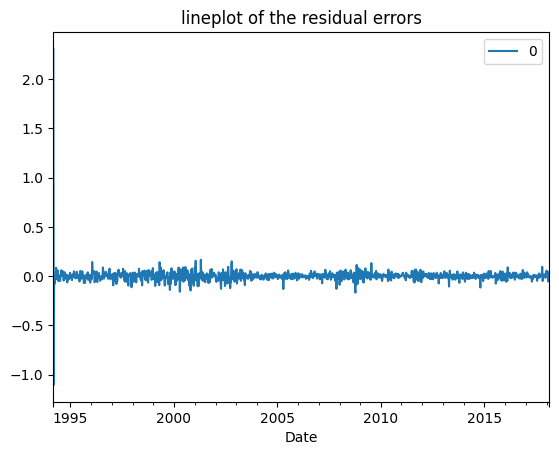

                 0
count  1252.000000
mean     -0.000483
std       0.080610
min      -1.105671
25%      -0.018614
50%      -0.000157
75%       0.016629
max       2.307941


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
<ipython-input-42-25793dc4a6f0>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ibm_test['forecast'] = fc


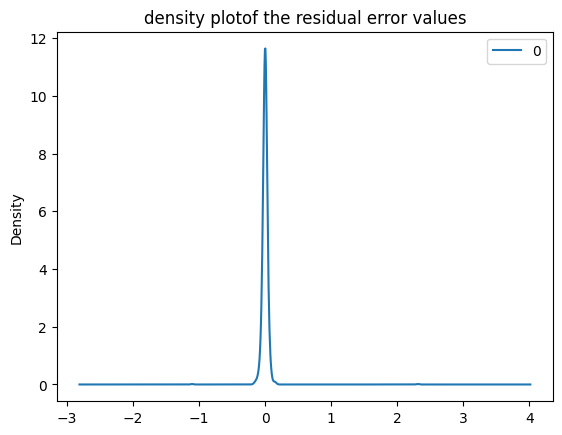

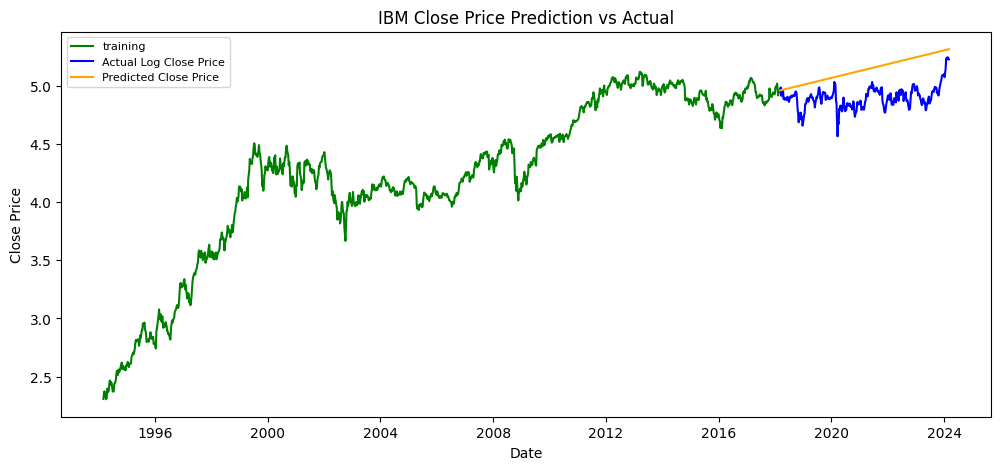

MSE: 0.06837189098898437
MAE: 0.06837189098898437
RMSE: 0.26148019234539427
MAPE: 0.04889828566272049


In [ ]:
#IBM
model = ARIMA(ibm_train['Log Close'], order=(2,2,1))
results = model.fit()
print(results.summary())

# Get the residuals
residuals = pd.DataFrame(results.resid)
residuals.plot() # suggesting that they still be some trend information not captured by the model?
plt.title('lineplot of the residual errors')
plt.show()
residuals.plot(kind='kde')
plt.title('density plotof the residual error values')
print(residuals.describe())
ibm_test.shape

#forecast
fc = results.forecast(314, alpha=0.05)
ibm_test['forecast'] = fc
plt.figure(figsize=(12,5), dpi=100)
plt.plot(ibm_train['Log Close'], color='green',label='training')
plt.plot(ibm_test['Log Close'], color='blue', label='Actual Log Close Price')
plt.plot(ibm_test['forecast'], color='orange', label='Predicted Close Price')
plt.title('IBM Close Price Prediction vs Actual')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()


fig = go.Figure()

# Add traces for 'Predicted Close' and 'Close'
fig.add_trace(go.Scatter(x=ibm_test.index, y=ibm_test['forecast'], mode='lines', name='Predicted Log Close', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=ibm_test.index, y=ibm_test['Log Close'], mode='lines', name='Actual Log Close', line=dict(color='red')))

# Update layout for better zooming
fig.update_layout(
    title='Predicted vs Actual Log Close Prices for IBM',
    xaxis=dict(
        title='Date',
        rangeselector=dict(
            buttons=list([
                dict(count=1, label='1m', step='month', stepmode='backward'),
                dict(count=6, label='6m', step='month', stepmode='backward'),
                dict(count=1, label='YTD', step='year', stepmode='todate'),
                dict(count=1, label='1y', step='year', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type='date'
    ),
    yaxis=dict(title='Close Price'),
)

fig.show()


mse = mean_squared_error(ibm_test['Log Close'], fc)
print('MSE: '+str(mse))
mae = mean_squared_error(ibm_test['Log Close'], fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(ibm_test['Log Close'], fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc-ibm_test['Log Close'])/np.abs(ibm_test['Log Close']))
print('MAPE: '+str(mape))

## microsoft arima

In [ ]:
import plotly.graph_objs as go

# Original Series
trace1 = go.Scatter(x=microsoft_df.index, y=microsoft_df['Close'], mode='lines', name='Original Series')
layout1 = go.Layout(title='Original Series', xaxis=dict(title='Date'), yaxis=dict(title='Close'))

# 1st Order Differencing
trace2 = go.Scatter(x=microsoft_df.index, y=microsoft_df['Close'].diff(), mode='lines', name='1st Order Differencing')
layout2 = go.Layout(title='1st Order Differencing', xaxis=dict(title='Date'), yaxis=dict(title='Close'))

# 2nd Order Differencing
trace3 = go.Scatter(x=microsoft_df.index, y=microsoft_df['Close'].diff().diff(), mode='lines', name='2nd Order Differencing')
layout3 = go.Layout(title='2nd Order Differencing', xaxis=dict(title='Date'), yaxis=dict(title='Close'))

# Create three separate plots
fig1 = go.Figure(data=[trace1], layout=layout1)
fig2 = go.Figure(data=[trace2], layout=layout2)
fig3 = go.Figure(data=[trace3], layout=layout3)

fig1.show()
fig2.show()
fig3.show()

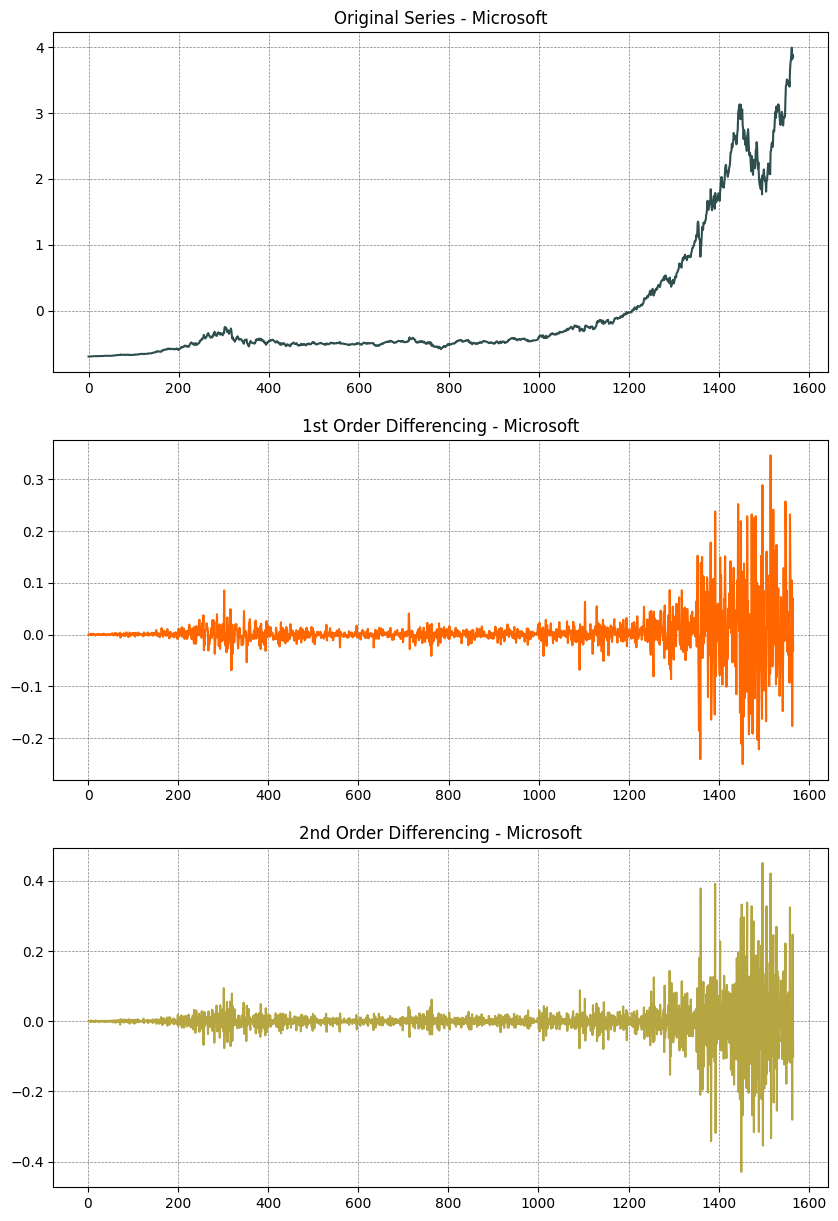

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('default')

# Create subplots with larger size
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(10, 15))

# Original Series
ax1.plot(microsoft_df.index, microsoft_df['Close'], color='#2F4F4F')
ax1.set_title('Original Series - Microsoft')
ax1.grid(True, linestyle='--', linewidth=0.5, color='gray')


# 1st Order Differencing
ax2.plot(microsoft_df.index, microsoft_df['Close'].diff(), color='#FF6600')
ax2.set_title('1st Order Differencing - Microsoft')

ax2.grid(True, linestyle='--', linewidth=0.5, color='gray')

# 2nd Order Differencing
ax3.plot(microsoft_df.index, microsoft_df['Close'].diff().diff(), color='#B5A642')
ax3.set_title('2nd Order Differencing - Microsoft')
ax3.grid(True, linestyle='--', linewidth=0.5, color='gray')

# Set transparent background for the entire figure
fig.patch.set_facecolor('none')
fig.patch.set_alpha(0.0)

# Set transparent background for each subplot
for ax in [ax1, ax2, ax3]:
    ax.set_facecolor('none')
    ax.patch.set_alpha(0.0)
    ax.tick_params(axis='x', colors='black')
    ax.tick_params(axis='y', colors='black')

plt.savefig('stationarity_microsoft.png')
plt.show()

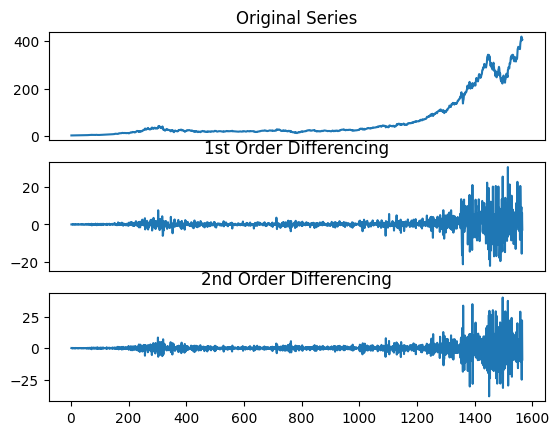

In [ ]:
#selection of d parameter for Microsoft
#as the Close are not stationary, we should consider d such as they would become so.
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(microsoft_df.Close); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
    # 1st Differencing
ax2.plot(microsoft_df.Close.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
    # 2nd Differencing
ax3.plot(microsoft_df.Close.diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

#--> to get standardized data, we use the log on the close prices and check it with adf_check

In [ ]:
#correzione esponenziale di microsoft con il logaritmo
microsoft_df['Log Close'] = np.log(microsoft_df['Close']+1)

microsoft_df['Log Close First Difference'] = microsoft_df['Log Close']- microsoft_df['Log Close'].shift(1)
adf_check(microsoft_df['Log Close First Difference'].dropna())

microsoft_df['Log Close Second Difference'] = microsoft_df['Log Close First Difference']- microsoft_df['Log Close First Difference'].shift(1)
adf_check(microsoft_df['Log Close Second Difference'].dropna())

microsoft_df['Log Seasonal Difference'] = microsoft_df['Log Close'] - microsoft_df['Log Close'].shift(52)
adf_check(microsoft_df['Log Seasonal Difference'].dropna())

microsoft_df['Seasonal First Difference'] = microsoft_df['Log Close First Difference'] - microsoft_df['Log Close First Difference'].shift(54)
adf_check(microsoft_df['Seasonal First Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -19.607609551714667
p-value : 0.0
#Number of Lags Used : 4
Number of Observations Used : 1560
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -14.65069881557587
p-value : 3.504297093085465e-27
#Number of Lags Used : 23
Number of Observations Used : 1540
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -3.5504075396536465
p-value : 0.006783055822138592
#Number of Lags Used : 14
Number of Observations Used : 1499
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -17.971096554079182
p-value : 2.7954984181974146e-30
#Number of Lags Used : 5
Number of Observations Used : 1505
Reject the null hypothesis. Data has no unit root and is stationary.


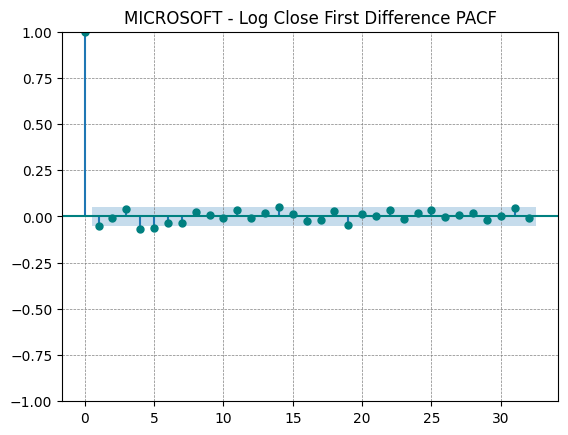

In [ ]:
#indagine di p e q per microsoft

# Plot PACF

plt.style.use('default')
plot_pacf(microsoft_df['Log Close First Difference'].dropna(), title='MICROSOFT - Log Close First Difference PACF', color='#008080')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')

plt.savefig('microsoft-PACF.png', transparent=True)
plt.show()

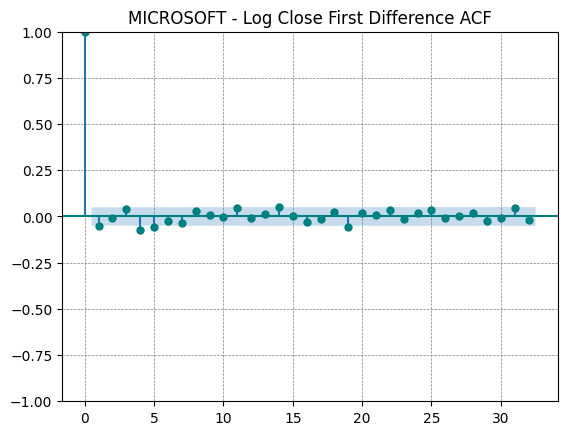

In [ ]:
# Plot ACF
plt.style.use('default')
plot_acf(microsoft_df['Log Close First Difference'].dropna(), title='MICROSOFT - Log Close First Difference ACF', color='#008080')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.savefig('microsoft-ACF.png',transparent=True)
plt.show()


In [ ]:
train_size_microsoft = int(len(microsoft_df) * 0.8)
microsoft_train, microsoft_test = microsoft_df[:train_size_microsoft], microsoft_df[train_size_microsoft:]

microsoft_test.set_index('Date', inplace=True)
microsoft_train.set_index('Date', inplace=True)

In [ ]:
#MICROSOFT
model = ARIMA(microsoft_train['Log Close'], order=(1,2,1)) #ORDERS: TO BE DECIDED ON THE ANALYSIS ABOVE.
        ##add the seasonal orders too!!

results = model.fit()
print(results.summary())
# Get the residuals
residuals = pd.DataFrame(results.resid)
residuals.plot()
plt.title('lineplot of the residual errors')
#suggesting that they still be some trend information not captured by the model
plt.show()
residuals.plot(kind='kde')
plt.title('density plotof the residual error values')
print(residuals.describe())

#forecast
fc = results.forecast(314, alpha=0.05)
microsoft_test['forecast'] = fc
plt.figure(figsize=(12,5), dpi=100)
plt.style.use('default')

plt.plot(microsoft_train['Log Close'], color='#3498db',label='training')
plt.plot(microsoft_test['Log Close'], color='#2ecc71', label='Actual Log Close Price')
plt.plot(microsoft_test['forecast'], color='#e74c3c', label='Predicted Log Close Price')
plt.title('Microsoft Close Price Actual vs Prediction')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(loc='upper left', fontsize=8)
plt.savefig('microsoft pred arima.png')
plt.show()


fig = go.Figure()

# Add traces for 'Predicted Close' and 'Close'
fig.add_trace(go.Scatter(x=microsoft_test.index, y=microsoft_test['forecast'], mode='lines', name='Predicted Log Close', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=microsoft_test.index, y=microsoft_test['Log Close'], mode='lines', name='Actual Log Close', line=dict(color='red')))

# Update layout for better zooming
fig.update_layout(
    title='Predicted vs Actual Log Close Prices for Microsoft',
    xaxis=dict(
        title='Date',
        rangeselector=dict(
            buttons=list([
                dict(count=1, label='1m', step='month', stepmode='backward'),
                dict(count=6, label='6m', step='month', stepmode='backward'),
                dict(count=1, label='YTD', step='year', stepmode='todate'),
                dict(count=1, label='1y', step='year', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type='date'
    ),
    yaxis=dict(title='Close Price'),
)

fig.show()


mse = mean_squared_error(microsoft_test['Log Close'], fc)
print('MSE: '+str(mse))
mae = mean_squared_error(microsoft_test['Log Close'], fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(microsoft_test['Log Close'], fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc-microsoft_test['Log Close'])/np.abs(microsoft_test['Log Close']))
print('MAPE: '+str(mape))

NameError: name 'ARIMA' is not defined

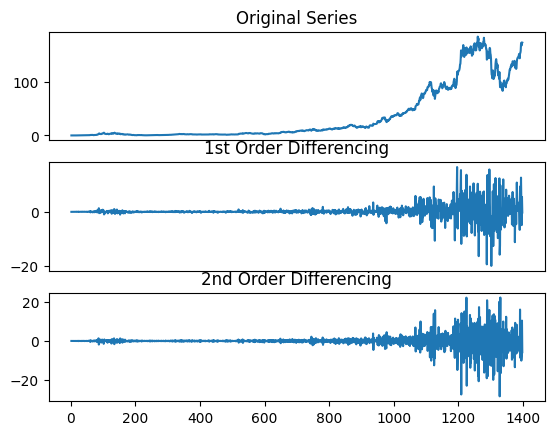

In [ ]:
#selection of d parameter for Amazon
#as the Close are not stationary, we should consider d such as they would become so.
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(amazon_df.Close); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
    # 1st Differencing
ax2.plot(amazon_df.Close.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
    # 2nd Differencing
ax3.plot(amazon_df.Close.diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

#--> to get standardized data, we use the log on the close prices and check it with adf_check

Augmented Dickey-Fuller Test:
ADF Test Statistic : -37.22102045052776
p-value : 0.0
#Number of Lags Used : 0
Number of Observations Used : 1397
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -13.892778764822195
p-value : 5.925900383117731e-26
#Number of Lags Used : 24
Number of Observations Used : 1372
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -3.7249380857611896
p-value : 0.003775742185682476
#Number of Lags Used : 16
Number of Observations Used : 1330
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -6.991467063490768
p-value : 7.725306050450135e-10
#Number of Lags Used : 23
Number of Observations Used : 1320
Reject the null hypothesis. Data has no unit root and is stationary.


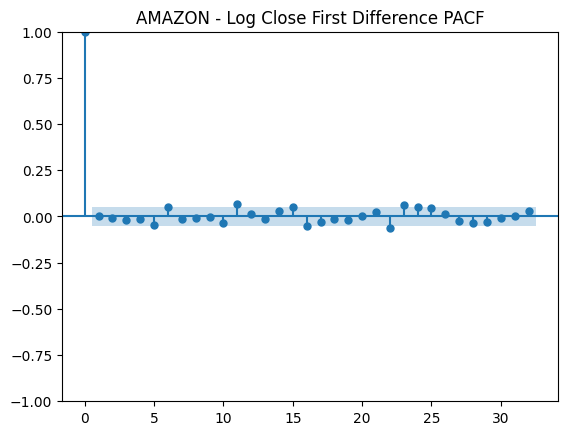

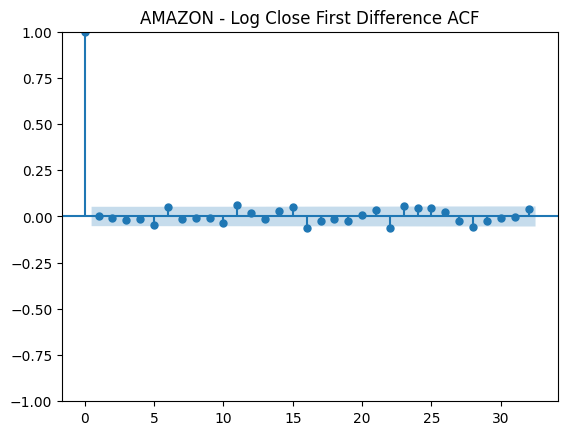

In [ ]:
#correzione esponenziale di amazon con il logaritmo
amazon_df['Log Close'] = np.log(amazon_df['Close']+2)

#indagine di d, p e q per amazon

amazon_df['Log Close First Difference'] = amazon_df['Log Close']- amazon_df['Log Close'].shift(1)
adf_check(amazon_df['Log Close First Difference'].dropna())

amazon_df['Log Close Second Difference'] = amazon_df['Log Close First Difference']- amazon_df['Log Close First Difference'].shift(1)
adf_check(amazon_df['Log Close Second Difference'].dropna())

amazon_df['Log Seasonal Difference'] = amazon_df['Log Close'] - amazon_df['Log Close'].shift(52)
adf_check(amazon_df['Log Seasonal Difference'].dropna())

amazon_df['Seasonal First Difference'] = amazon_df['Log Close First Difference'] - amazon_df['Log Close First Difference'].shift(54)
adf_check(amazon_df['Seasonal First Difference'].dropna())


fig_first = plot_pacf(amazon_df['Log Close First Difference'].dropna(), title='AMAZON - Log Close First Difference PACF')
second_first = plot_acf(amazon_df['Log Close First Difference'].dropna(), title='AMAZON - Log Close First Difference ACF')


In [ ]:
train_size_amazon = int(len(amazon_df) * 0.8)  # 80% for training
amazon_train, amazon_test = amazon_df[:train_size_amazon], amazon_df[train_size_amazon:]
amazon_test.set_index('Date', inplace=True)
amazon_train.set_index('Date', inplace=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.



                               SARIMAX Results                                
Dep. Variable:              Log Close   No. Observations:                 1119
Model:                 ARIMA(3, 3, 1)   Log Likelihood                1855.745
Date:                Thu, 18 Apr 2024   AIC                          -3701.490
Time:                        06:25:09   BIC                          -3676.402
Sample:                    05-18-1997   HQIC                         -3692.006
                         - 10-21-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7272      0.022    -33.159      0.000      -0.770      -0.684
ar.L2         -0.4699      0.028    -16.701      0.000      -0.525      -0.415
ar.L3         -0.2782      0.025    -11.210      0.0

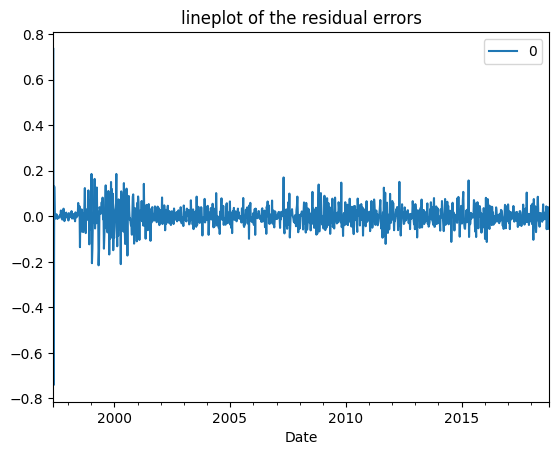

                 0
count  1119.000000
mean     -0.000032
std       0.055527
min      -0.740977
25%      -0.024301
50%      -0.001418
75%       0.023009
max       0.735469


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning:

Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.

<ipython-input-51-41d80d4235ca>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



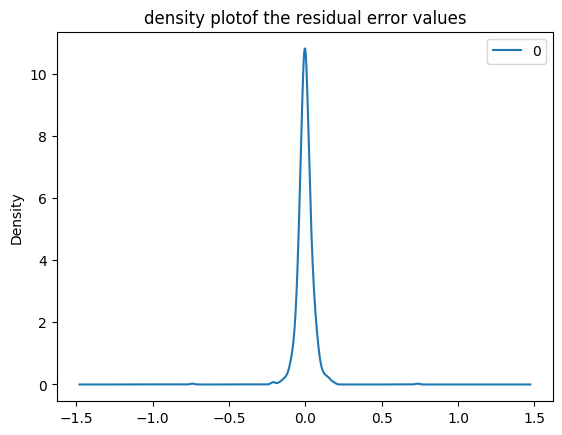

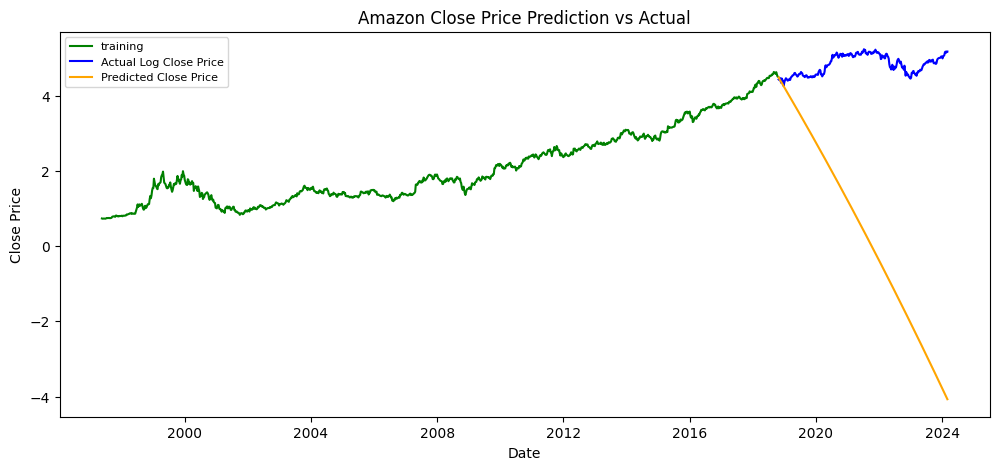

MSE: 26.682721178873706
MAE: 26.682721178873706
RMSE: 5.1655320325087235
MAPE: 0.9126409083088189


In [ ]:
#AMAZON -->> problemi!
model = ARIMA(amazon_train['Log Close'], order=(3,3,1)) #ORDERS: TO BE DECIDED ON THE ANALYSIS ABOVE.
        ##add the seasonal orders too!!

results = model.fit()
print(results.summary())

# Get the residuals
residuals = pd.DataFrame(results.resid)
residuals.plot() #suggesting that they still be some trend information not captured by the model?
plt.title('lineplot of the residual errors')
plt.show()
residuals.plot(kind='kde')
plt.title('density plotof the residual error values')
print(residuals.describe())

#forecast
fc = results.forecast(280, alpha=0.05)
amazon_test['forecast'] = fc
plt.figure(figsize=(12,5), dpi=100)
plt.plot(amazon_train['Log Close'], color='green',label='training')
plt.plot(amazon_test['Log Close'], color='blue', label='Actual Log Close Price')
plt.plot(amazon_test['forecast'], color='orange', label='Predicted Close Price')
plt.title('Amazon Close Price Prediction vs Actual')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()


fig = go.Figure()

# Add traces for 'Predicted Close' and 'Close'
fig.add_trace(go.Scatter(x=amazon_test.index, y=amazon_test['forecast'], mode='lines', name='Predicted Log Close', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=amazon_test.index, y=amazon_test['Log Close'], mode='lines', name='Actual Log Close', line=dict(color='red')))

# Update layout for better zooming
fig.update_layout(
    title='Predicted vs Actual Log Close Prices for Amazon',
    xaxis=dict(
        title='Date',
        rangeselector=dict(
            buttons=list([
                dict(count=1, label='1m', step='month', stepmode='backward'),
                dict(count=6, label='6m', step='month', stepmode='backward'),
                dict(count=1, label='YTD', step='year', stepmode='todate'),
                dict(count=1, label='1y', step='year', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type='date'
    ),
    yaxis=dict(title='Close Price'),
)

fig.show()


mse = mean_squared_error(amazon_test['Log Close'], fc)
print('MSE: '+str(mse))
mae = mean_squared_error(amazon_test['Log Close'], fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(amazon_test['Log Close'], fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc-amazon_test['Log Close'])/np.abs(amazon_test['Log Close']))
print('MAPE: '+str(mape))

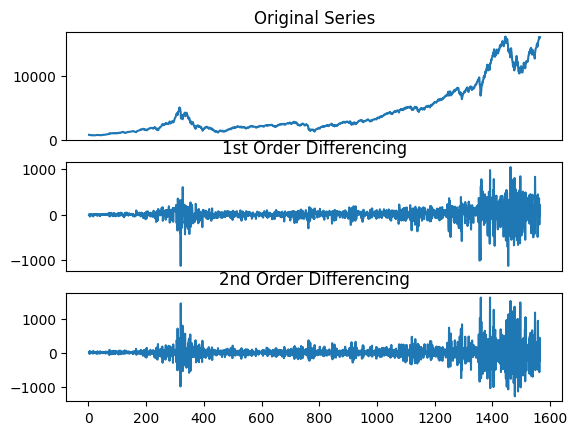

In [ ]:
#selection of d parameter for Nasdaq
#as the Close are not stationary, we should consider d such as they would become so.
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(nasdaq_df.Close); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
    # 1st Differencing
ax2.plot(nasdaq_df.Close.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
    # 2nd Differencing
ax3.plot(nasdaq_df.Close.diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

#--> to get standardized data, we use the log on the close prices and check it with adf_check

Augmented Dickey-Fuller Test:
ADF Test Statistic : -15.14353187116045
p-value : 6.9563914224994275e-28
#Number of Lags Used : 6
Number of Observations Used : 1558
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -14.259242426564404
p-value : 1.436120694808953e-26
#Number of Lags Used : 24
Number of Observations Used : 1539
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -3.7239788391199578
p-value : 0.003788237337948448
#Number of Lags Used : 7
Number of Observations Used : 1504
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -14.610340894181713
p-value : 4.032298602970466e-27
#Number of Lags Used : 6
Number of Observations Used : 1504
Reject the null hypothesis. Data has no unit root and is stationary.


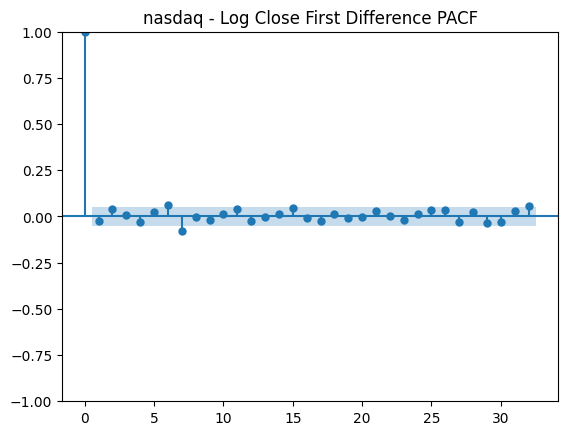

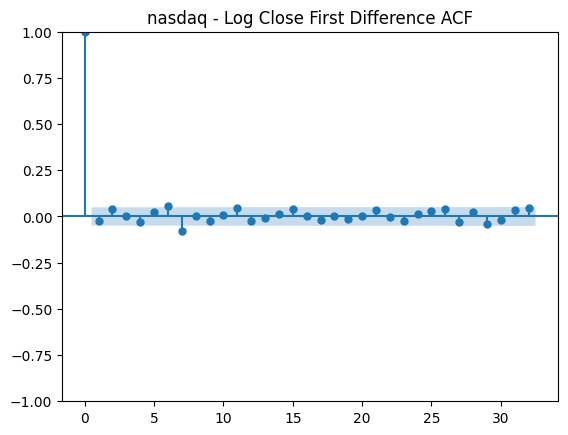

In [ ]:
#correzione esponenziale di nasdaq con il logaritmo
nasdaq_df['Log Close'] = np.log(nasdaq_df['Close']+1)

#indagine di p e q per nasdaq
nasdaq_df['Log Close First Difference'] = nasdaq_df['Log Close']- nasdaq_df['Log Close'].shift(1)
adf_check(nasdaq_df['Log Close First Difference'].dropna())

nasdaq_df['Log Close Second Difference'] = nasdaq_df['Log Close First Difference']- nasdaq_df['Log Close First Difference'].shift(1)
adf_check(nasdaq_df['Log Close Second Difference'].dropna())

nasdaq_df['Log Seasonal Difference'] = nasdaq_df['Log Close'] - nasdaq_df['Log Close'].shift(54) #verificaredi avere 54 settimane per anno nei dataset
adf_check(nasdaq_df['Log Seasonal Difference'].dropna())

nasdaq_df['Seasonal First Difference'] = nasdaq_df['Log Close First Difference'] - nasdaq_df['Log Close First Difference'].shift(54)
adf_check(nasdaq_df['Seasonal First Difference'].dropna())


fig_first = plot_pacf(nasdaq_df['Log Close First Difference'].dropna(), title='nasdaq - Log Close First Difference PACF')
second_first = plot_acf(nasdaq_df['Log Close First Difference'].dropna(), title='nasdaq - Log Close First Difference ACF')

In [ ]:
train_size_nasdaq = int(len(sp500_df) * 0.8)  # 80% for training
nasdaq_train, nasdaq_test = nasdaq_df[:train_size_nasdaq], nasdaq_df[train_size_nasdaq:]
nasdaq_test.set_index('Date', inplace=True)
nasdaq_train.set_index('Date', inplace=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.



                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1252
Model:                 ARIMA(2, 2, 1)   Log Likelihood               -7384.927
Date:                Thu, 18 Apr 2024   AIC                          14777.855
Time:                        06:25:12   BIC                          14798.378
Sample:                    03-06-1994   HQIC                         14785.570
                         - 02-25-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0425      0.015     -2.848      0.004      -0.072      -0.013
ar.L2          0.0062      0.015      0.424      0.671      -0.022       0.035
ma.L1         -0.9998      0.020    -49.523      0.0

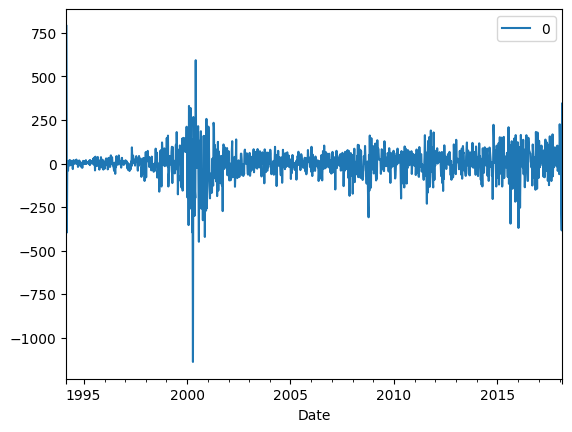

                 0
count  1252.000000
mean      2.641118
std      92.259780
min   -1140.061963
25%     -30.490249
50%       5.765508
75%      45.504047
max     790.550000


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning:

Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.

<ipython-input-55-f3eb4cd2a4ea>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



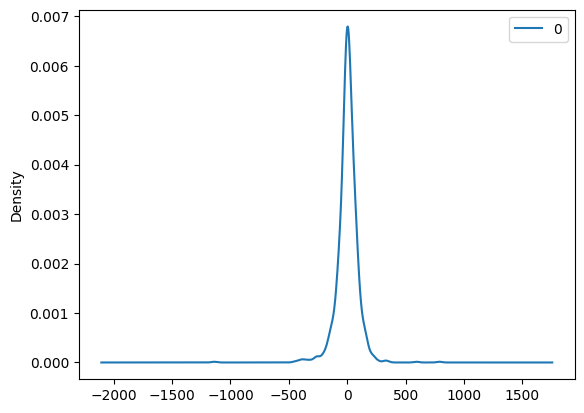

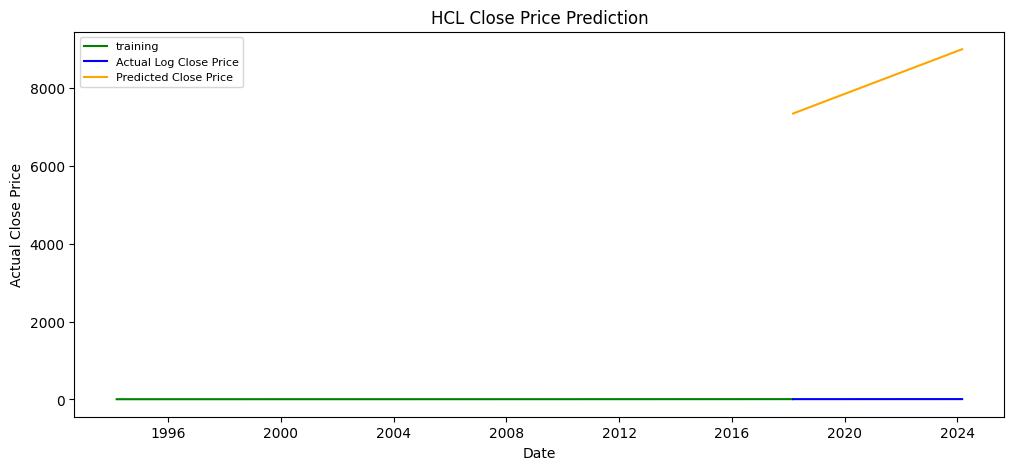

                 0
count  1252.000000
mean      2.641118
std      92.259780
min   -1140.061963
25%     -30.490249
50%       5.765508
75%      45.504047
max     790.550000


<ipython-input-55-f3eb4cd2a4ea>:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



MSE: 66779499.565759696
MAE: 66779499.565759696
RMSE: 8171.872463870181
MAPE: 878.6046861342306


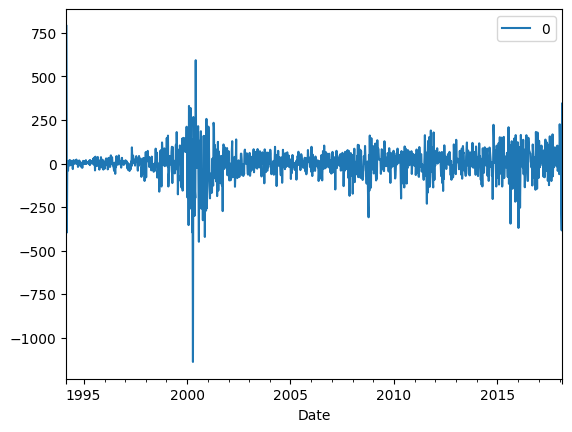

In [ ]:
#nasdaq
model = ARIMA(nasdaq_train['Close'], order=(2,2,1)) #ORDERS: TO BE DECIDED ON THE ANALYSIS ABOVE.
        ##add the seasonal orders too!!

results = model.fit()
print(results.summary())

nasdaq_df['Predicted Close'] = results.predict(start=nasdaq_train.index[0], end=nasdaq_train.index[-1], typ='levels')

# Get the residuals
residuals = pd.DataFrame(results.resid)
residuals.plot() #lineplot of the residual errors, suggesting that they still be some trend information not captured by the model?
plt.show()
residuals.plot(kind='kde') #density plotof the residual error values
print(residuals.describe())
fc = results.forecast(314, alpha=0.05)
nasdaq_test['forecast'] = fc
plt.figure(figsize=(12,5), dpi=100)
plt.plot(nasdaq_train['Log Close'], color='green',label='training')
plt.plot(nasdaq_test['Log Close'], color='blue', label='Actual Log Close Price')
plt.plot(nasdaq_test['forecast'], color='orange', label='Predicted Close Price')
plt.title('HCL Close Price Prediction')
plt.xlabel('Date')
plt.ylabel('Actual Close Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()
# Get the residuals
residuals = pd.DataFrame(results.resid)
residuals.plot()
print(residuals.describe())
nasdaq_test['Residual'] = nasdaq_test['Log Close'].iloc[2:] - nasdaq_test['Log Close'].iloc[2:]


fig = go.Figure()

# Add traces for 'Predicted Close' and 'Close'
fig.add_trace(go.Scatter(x=nasdaq_test.index, y=nasdaq_test['forecast'], mode='lines', name='Predicted Log Close', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=nasdaq_test.index, y=nasdaq_test['Log Close'], mode='lines', name='Actual Log Close', line=dict(color='red')))

# Update layout for better zooming
fig.update_layout(
    title='Predicted vs Actual Log Close Prices for nasdaq',
    xaxis=dict(
        title='Date',
        rangeselector=dict(
            buttons=list([
                dict(count=1, label='1m', step='month', stepmode='backward'),
                dict(count=6, label='6m', step='month', stepmode='backward'),
                dict(count=1, label='YTD', step='year', stepmode='todate'),
                dict(count=1, label='1y', step='year', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type='date'
    ),
    yaxis=dict(title='Close Price'),
)

fig.show()


mse = mean_squared_error(nasdaq_test['Log Close'], fc)
print('MSE: '+str(mse))
mae = mean_squared_error(nasdaq_test['Log Close'], fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(nasdaq_test['Log Close'], fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc-nasdaq_test['Log Close'])/np.abs(nasdaq_test['Log Close']))
print('MAPE: '+str(mape))

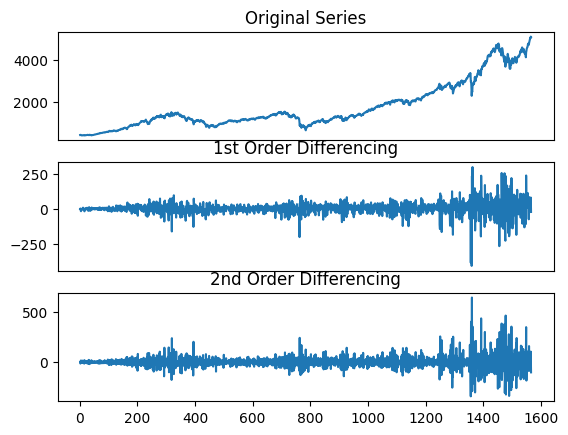

In [ ]:
#selection of d parameter for sp500
#as the Close are not stationary, we should consider d such as they would become so.
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(sp500_df.Close); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
    # 1st Differencing
ax2.plot(sp500_df.Close.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
    # 2nd Differencing
ax3.plot(sp500_df.Close.diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

#--> to get standardized data, we use the log on the close prices and check it with adf_check

Augmented Dickey-Fuller Test:
ADF Test Statistic : -15.966926780739202
p-value : 7.074965189627775e-29
#Number of Lags Used : 6
Number of Observations Used : 1558
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -16.29763225028687
p-value : 3.2904232187515755e-29
#Number of Lags Used : 20
Number of Observations Used : 1543
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -3.640850316761791
p-value : 0.005026403109582836
#Number of Lags Used : 3
Number of Observations Used : 1508
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -20.858733870529374
p-value : 0.0
#Number of Lags Used : 3
Number of Observations Used : 1507
Reject the null hypothesis. Data has no unit root and is stationary.


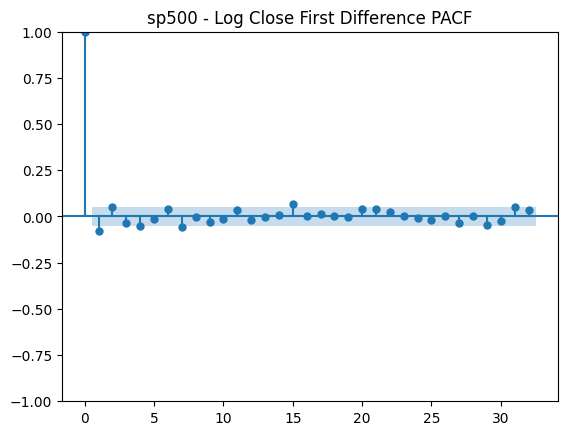

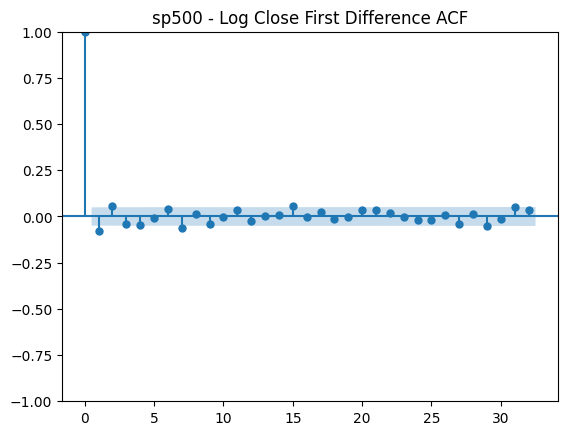

In [ ]:
#correzione esponenziale di sp500 con il logaritmo
sp500_df['Log Close'] = np.log(sp500_df['Close']+1)

#indagine di p e q per sp500
sp500_df['Log Close First Difference'] = sp500_df['Log Close']- sp500_df['Log Close'].shift(1)
adf_check(sp500_df['Log Close First Difference'].dropna())

sp500_df['Log Close Second Difference'] = sp500_df['Log Close First Difference']- sp500_df['Log Close First Difference'].shift(1)
adf_check(sp500_df['Log Close Second Difference'].dropna())

sp500_df['Log Seasonal Difference'] = sp500_df['Log Close'] - sp500_df['Log Close'].shift(54) #verificaredi avere 54 settimane per anno nei dataset
adf_check(sp500_df['Log Seasonal Difference'].dropna())

sp500_df['Seasonal First Difference'] = sp500_df['Log Close First Difference'] - sp500_df['Log Close First Difference'].shift(54)
adf_check(sp500_df['Seasonal First Difference'].dropna())

fig_first = plot_pacf(sp500_df['Log Close First Difference'].dropna(), title='sp500 - Log Close First Difference PACF')
second_first = plot_acf(sp500_df['Log Close First Difference'].dropna(), title='sp500 - Log Close First Difference ACF')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.



                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1252
Model:                 ARIMA(4, 1, 1)   Log Likelihood               -5982.461
Date:                Thu, 18 Apr 2024   AIC                          11976.922
Time:                        06:25:16   BIC                          12007.712
Sample:                    03-06-1994   HQIC                         11988.496
                         - 02-25-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1546      0.912     -0.170      0.865      -1.941       1.632
ar.L2          0.0132      0.080      0.164      0.869      -0.144       0.170
ar.L3         -0.0350      0.026     -1.356      0.1

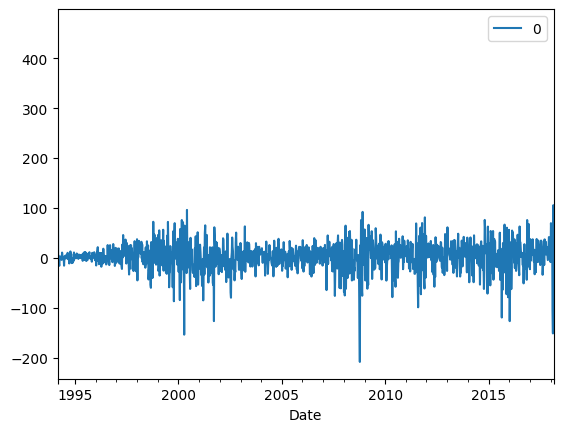

                 0
count  1252.000000
mean      2.424158
std      31.637053
min    -208.305413
25%     -12.269946
50%       3.357290
75%      17.967189
max     464.740000


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning:

Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.

<ipython-input-58-6295c10d71bf>:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



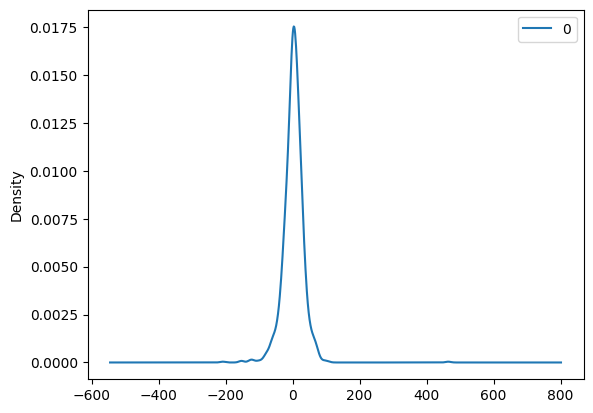

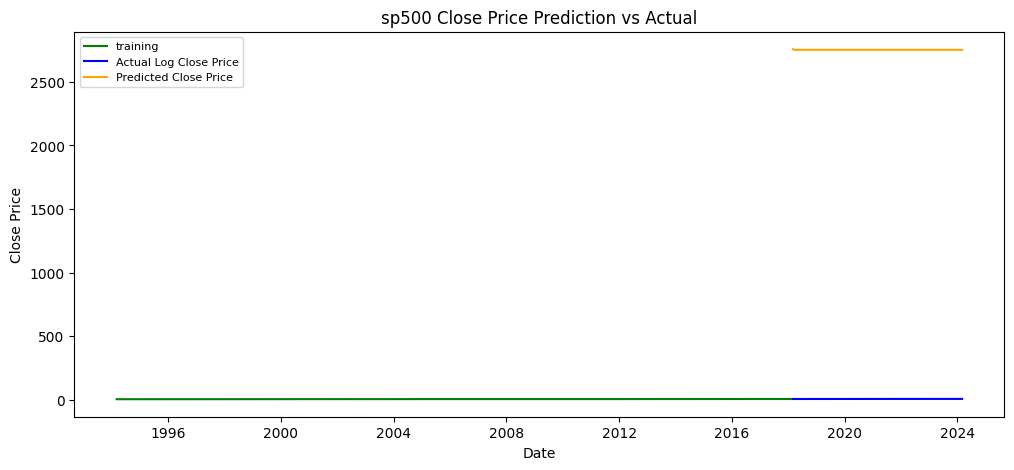

MSE: 7526041.416913199
MAE: 7526041.416913199
RMSE: 2743.363158044009
MAPE: 335.4507288949598


In [ ]:
#sp500

train_size_sp500 = int(len(sp500_df) * 0.8)  # 80% for training
sp500_train, sp500_test = sp500_df[:train_size_sp500], sp500_df[train_size_sp500:]
sp500_test.set_index('Date', inplace=True)
sp500_train.set_index('Date', inplace=True)
model = ARIMA(sp500_train['Close'], order=(4,1,1)) #ORDERS: TO BE DECIDED ON THE ANALYSIS ABOVE.
        ##add the seasonal orders too!!

results = model.fit()
print(results.summary())

# Get the residuals
residuals = pd.DataFrame(results.resid)
residuals.plot() #lineplot of the residual errors, suggesting that they still be some trend information not captured by the model?
plt.show()
residuals.plot(kind='kde') #density plotof the residual error values
print(residuals.describe())

#forecast
fc = results.forecast(314, alpha=0.05)
sp500_test['forecast'] = fc
plt.figure(figsize=(12,5), dpi=100)
plt.plot(sp500_train['Log Close'], color='green',label='training')
plt.plot(sp500_test['Log Close'], color='blue', label='Actual Log Close Price')
plt.plot(sp500_test['forecast'], color='orange', label='Predicted Close Price')
plt.title('sp500 Close Price Prediction vs Actual')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

fig = go.Figure()

# Add traces for 'Predicted Close' and 'Close'
fig.add_trace(go.Scatter(x=sp500_test.index, y=sp500_test['forecast'], mode='lines', name='Predicted Log Close', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=sp500_test.index, y=sp500_test['Log Close'], mode='lines', name='Actual Log Close', line=dict(color='red')))

# Update layout for better zooming
fig.update_layout(
    title='Predicted vs Actual Log Close Prices for sp500',
    xaxis=dict(
        title='Date',
        rangeselector=dict(
            buttons=list([
                dict(count=1, label='1m', step='month', stepmode='backward'),
                dict(count=6, label='6m', step='month', stepmode='backward'),
                dict(count=1, label='YTD', step='year', stepmode='todate'),
                dict(count=1, label='1y', step='year', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type='date'
    ),
    yaxis=dict(title='Close Price'),
)

fig.show()


mse = mean_squared_error(sp500_test['Log Close'], fc)
print('MSE: '+str(mse))
mae = mean_squared_error(sp500_test['Log Close'], fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(sp500_test['Log Close'], fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc-sp500_test['Log Close'])/np.abs(sp500_test['Log Close']))
print('MAPE: '+str(mape))

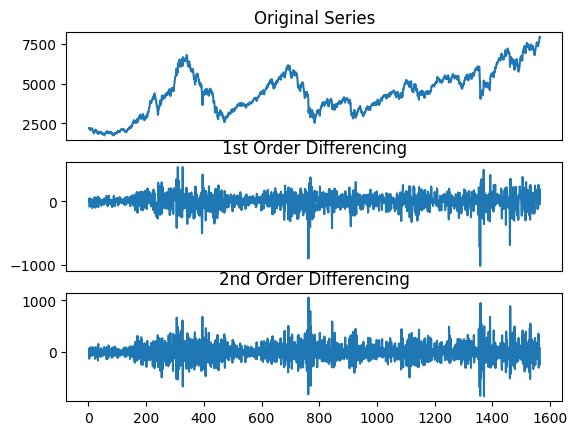

In [ ]:
#selection of d parameter for cac
#as the Close are not stationary, we should consider d such as they would become so.
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(cac_df.Close); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
    # 1st Differencing
ax2.plot(cac_df.Close.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
    # 2nd Differencing
ax3.plot(cac_df.Close.diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

#--> to get standardized data, we use the log on the close prices and check it with adf_check

Augmented Dickey-Fuller Test:
ADF Test Statistic : -10.73749814667706
p-value : 2.8739623398745604e-19
#Number of Lags Used : 12
Number of Observations Used : 1552
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -15.514752898109448
p-value : 2.3240397156740197e-28
#Number of Lags Used : 21
Number of Observations Used : 1542
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -3.832327422543088
p-value : 0.002593351312135833
#Number of Lags Used : 13
Number of Observations Used : 1498
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -10.506286171939227
p-value : 1.0522197370001118e-18
#Number of Lags Used : 12
Number of Observations Used : 1498
Reject the null hypothesis. Data has no unit root and is stationary.
selection of p
selection of q


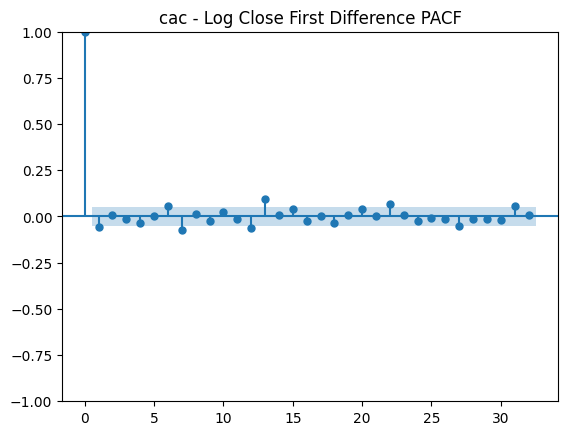

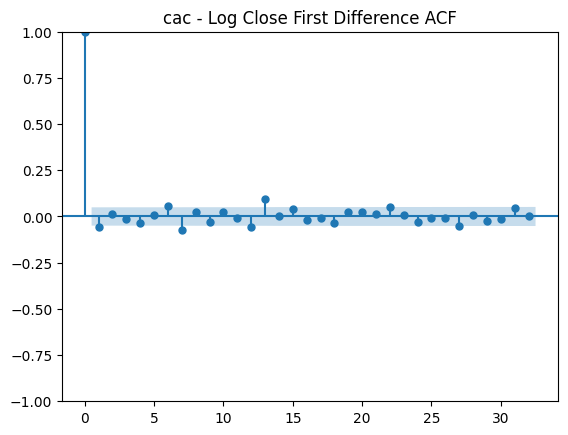

In [ ]:
#correzione esponenziale di cac con il logaritmo
cac_df['Log Close'] = np.log(cac_df['Close']+2)


#indagine di p e q per cac
cac_df['Log Close First Difference'] = cac_df['Log Close']- cac_df['Log Close'].shift(1)
adf_check(cac_df['Log Close First Difference'].dropna())

cac_df['Log Close Second Difference'] = cac_df['Log Close First Difference']- cac_df['Log Close First Difference'].shift(1)
adf_check(cac_df['Log Close Second Difference'].dropna())

cac_df['Log Seasonal Difference'] = cac_df['Log Close'] - cac_df['Log Close'].shift(54) #verificaredi avere 54 settimane per anno nei dataset
adf_check(cac_df['Log Seasonal Difference'].dropna())

cac_df['Seasonal First Difference'] = cac_df['Log Close First Difference'] - cac_df['Log Close First Difference'].shift(54)
adf_check(cac_df['Seasonal First Difference'].dropna())

    #Plots the autocorrelation function (ACF) for the first differenced data and the seasonal first differenced data:
    #ACF plots are needed to select q parameters, while PACF are useful to get p

print('selection of p')
fig_first = plot_pacf(cac_df['Log Close First Difference'].dropna(), title='cac - Log Close First Difference PACF')

print('selection of q')
second_first = plot_acf(cac_df['Log Close First Difference'].dropna(), title='cac - Log Close First Difference ACF')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.



                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1252
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -7711.086
Date:                Thu, 18 Apr 2024   AIC                          15430.172
Time:                        06:25:19   BIC                          15450.699
Sample:                    03-06-1994   HQIC                         15437.888
                         - 02-25-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2821      2.693      0.105      0.917      -4.996       5.560
ma.L1         -0.3415      2.692     -0.127      0.899      -5.618       4.935
ma.L2          0.0095      0.168      0.057      0.9

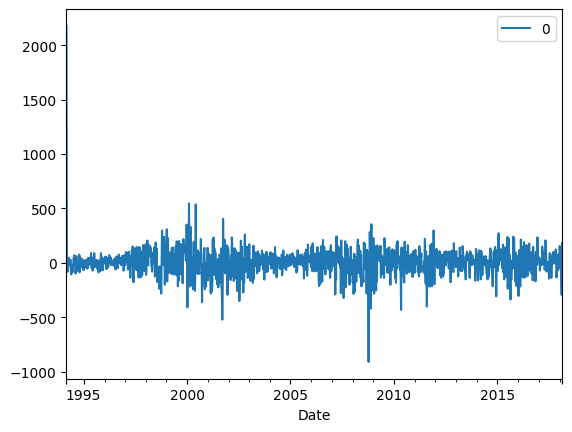

                 0
count  1252.000000
mean      4.432455
std     130.389166
min    -910.875707
25%     -58.107826
50%      12.391221
75%      71.742354
max    2178.690000


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning:

Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.

<ipython-input-61-7c5a38dbfdeb>:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



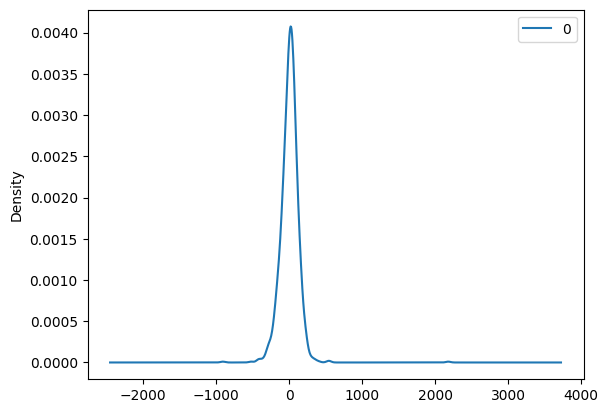

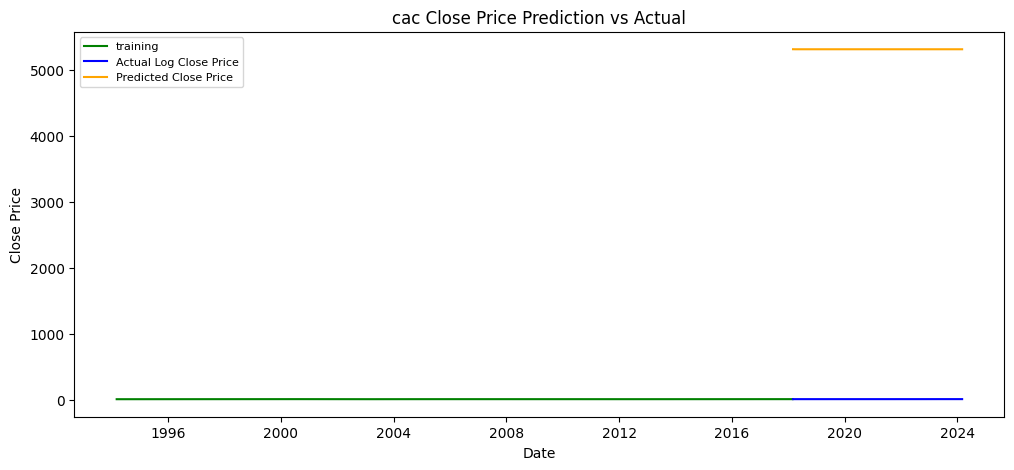

MSE: 28140042.309890922
MAE: 28140042.309890922
RMSE: 5304.718871899898
MAPE: 610.1092874121043


In [ ]:
#cac

train_size_cac = int(len(cac_df) * 0.8)  # 80% for training
cac_train, cac_test = cac_df[:train_size_cac], cac_df[train_size_cac:]
cac_test.set_index('Date', inplace=True)
cac_train.set_index('Date', inplace=True)

model = ARIMA(cac_train['Close'], order=(1,1,2)) #ORDERS: TO BE DECIDED ON THE ANALYSIS ABOVE.
        ##add the seasonal orders too!!

results = model.fit()
print(results.summary())

# Get the residuals
residuals = pd.DataFrame(results.resid)
residuals.plot() #lineplot of the residual errors, suggesting that they still be some trend information not captured by the model?
plt.show()
residuals.plot(kind='kde') #density plotof the residual error values
print(residuals.describe())
fc = results.forecast(314, alpha=0.05)
cac_test['forecast'] = fc
plt.figure(figsize=(12,5), dpi=100)
plt.plot(cac_train['Log Close'], color='green',label='training')
plt.plot(cac_test['Log Close'], color='blue', label='Actual Log Close Price')
plt.plot(cac_test['forecast'], color='orange', label='Predicted Close Price')
plt.title('cac Close Price Prediction vs Actual')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()


fig = go.Figure()

# Add traces for 'Predicted Close' and 'Close'
fig.add_trace(go.Scatter(x=cac_test.index, y=cac_test['forecast'], mode='lines', name='Predicted Log Close', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=cac_test.index, y=cac_test['Log Close'], mode='lines', name='Actual Log Close', line=dict(color='red')))

# Update layout for better zooming
fig.update_layout(
    title='Predicted vs Actual Log Close Prices for Cac',
    xaxis=dict(
        title='Date',
        rangeselector=dict(
            buttons=list([
                dict(count=1, label='1m', step='month', stepmode='backward'),
                dict(count=6, label='6m', step='month', stepmode='backward'),
                dict(count=1, label='YTD', step='year', stepmode='todate'),
                dict(count=1, label='1y', step='year', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type='date'
    ),
    yaxis=dict(title='Close Price'),
)

fig.show()


mse = mean_squared_error(cac_test['Log Close'], fc)
print('MSE: '+str(mse))
mae = mean_squared_error(cac_test['Log Close'], fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(cac_test['Log Close'], fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc-cac_test['Log Close'])/np.abs(cac_test['Log Close']))
print('MAPE: '+str(mape))

## LSTM

TAKE CARE!! Run the notebook ONLY including the cells before ARIMA and then come here.

https://www.diariodiunanalista.it/posts/previsione-delle-serie-temporali-con-lstm-in-tensorflow/

https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM?ref=diariodiunanalista.it

In [ ]:
pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=2f4bf0742ababf9b79ed86d6522bc99488d8101288a7e04bbc1cd73ed6c18e05
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [ ]:
import yfinance as yf
import pandas_ta as ta
import keras.models, keras.layers
import tensorflow as tf
import numpy as np

- ibm_df['RSI']=ta.rsi(ibm_df.Close, length=15): Here, the Relative Strength Index (RSI) indicator is being calculated for the ibm_df DataFrame. RSI is a momentum indicator that measures the speed and magnitude of price movements. It is calculated using the closing price (Close) data and specifying a length of 15 periods.
- ibm_df['EMAF']=ta.ema(ibm_df.Close, length=10): Here, the Exponential Moving Average (EMA) is being calculated for the ibm_df DataFrame. EMA is a trend indicator that assigns greater weight to more recent data. It is calculated using the closing price (Close) data and specifying a length of 20 periods.
- ibm_df['EMAM']=ta.ema(ibm_df.Close, length=100): This line calculates another EMA, but with a length of 100 periods. This could be useful for identifying longer-term trends.
- ibm_df['EMAS']=ta.ema(ibm_df.Close, length=150): Finally, this line calculates another EMA with a length of 150 periods. This provides an even longer-term indication of price trends.

In [ ]:
ibm_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

ANOTHER TRY: THE GOOD ONE!!

In [ ]:
#versione liste
def windowed_dataset(dataset, window_size):
    windowed_dataset = dataset.set_index('Date').copy()

    windowed_close = np.full((len(windowed_dataset), window_size), np.nan)
    windowed_volume = np.full((len(windowed_dataset), window_size), np.nan)

    for j in range(len(windowed_dataset)):
        if j >= window_size:
            window_data = windowed_dataset.iloc[j - window_size : j]
            windowed_close[j] = window_data['Close'].values
            windowed_volume[j] = window_data['Volume'].values

    windowed_dataset['Memory_Close'] = list(windowed_close)
    windowed_dataset['Memory_Volume'] = list(windowed_volume)

    return windowed_dataset


In [ ]:
#versione array
def windowed_dataset(dataset, window_size):
    windowed_dataset = dataset.copy()

    windowed_close = []
    windowed_volume = []

    for j in range(len(windowed_dataset)):
       #if j >= window_size:
        #    window_data = windowed_dataset.iloc[j - window_size : j]
         #   windowed_close.append(window_data['Close'].values.astype(float))
          #  windowed_volume.append(window_data['Volume'].values.astype(float))
      # else:
       #     windowed_close.append(np.array([], dtype=float))
        #    windowed_volume.append(np.array([], dtype=float))

        if j >= window_size:
            window_data = windowed_dataset.iloc[j - window_size : j]
            windowed_close.append(pd.Series(window_data['Close'].values.astype(float)))
            windowed_volume.append(pd.Series(window_data['Volume'].values.astype(float))) #, index=window_data.index
        #else:
         #   windowed_close.append(pd.Series(dtype=float))
          #  windowed_volume.append(pd.Series(dtype=float))

    windowed_dataset['Memory_Close'] = windowed_close
    windowed_dataset['Memory_Volume'] = windowed_volume

    return windowed_dataset

In [ ]:
#versione array: provo a risolvere il fatto che non coincidono lene values in lunghezza --> questo effettivamente lo risolve.
def windowed_dataset(dataset, window_size):
    windowed_dataset = dataset.copy()

    windowed_close = []
    windowed_volume = []

    for j in range(len(windowed_dataset)):

        if j >= window_size:
            window_data = windowed_dataset.iloc[j - window_size : j]
            windowed_close.append(pd.Series(window_data['Close'].values.astype(float)))
            windowed_volume.append(pd.Series(window_data['Volume'].values.astype(float)))
        else:
            # Aggiungi serie vuote per mantenere le dimensioni corrette
            windowed_close.append(pd.Series(dtype=float))
            windowed_volume.append(pd.Series(dtype=float))

    windowed_dataset['Memory_Close'] = windowed_close
    windowed_dataset['Memory_Volume'] = windowed_volume

    return windowed_dataset

In [ ]:
X_train = windowed_dataset(ibm_df_train_set, 5)[['RSI', 'EMAF', 'EMAM','EMAS','Memory_Close', 'Memory_Volume']].tail(len(ibm_df_train_set)-5)
y_train = windowed_dataset(ibm_df_train_set, 5)[['Close']].tail(len(ibm_df_train_set)-5)
X_train.info(), y_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 980 entries, 1997-02-16 to 2015-11-22
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RSI            980 non-null    float64
 1   EMAF           980 non-null    float64
 2   EMAM           980 non-null    float64
 3   EMAS           980 non-null    float64
 4   Memory_Close   980 non-null    object 
 5   Memory_Volume  980 non-null    object 
dtypes: float64(4), object(2)
memory usage: 53.6+ KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 980 entries, 1997-02-16 to 2015-11-22
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   980 non-null    float64
dtypes: float64(1)
memory usage: 15.3 KB


(None, None)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((980, 2, 1), (428, 2, 1), (980, 1, 1), (428, 1, 1))

In [ ]:
X_train = windowed_dataset(ibm_df_train_set, 5)[['RSI', 'EMAF', 'EMAM','EMAS','Memory_Close', 'Memory_Volume']].tail(len(ibm_df_train_set)-5)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 980 entries, 1997-02-16 to 2015-11-22
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RSI            980 non-null    float64
 1   EMAF           980 non-null    float64
 2   EMAM           980 non-null    float64
 3   EMAS           980 non-null    float64
 4   Memory_Close   980 non-null    object 
 5   Memory_Volume  980 non-null    object 
dtypes: float64(4), object(2)
memory usage: 53.6+ KB


In [ ]:
tf.convert_to_tensor(X_train[['EMAF','RSI','EMAM','EMAS']], dtype='float64')

<tf.Tensor: shape=(980, 4), dtype=float64, numpy=
array([[-1.50868556, 48.68959415, -1.62886424, -1.68449136],
       [-1.51134123, 41.76739406, -1.62703663, -1.68253214],
       [-1.5116705 , 48.52283412, -1.6248141 , -1.6803105 ],
       ...,
       [ 0.7320638 , 32.29191507,  0.97659995,  1.00149397],
       [ 0.70163793, 26.44169454,  0.96543148,  0.99369395],
       [ 0.68600651, 39.15966809,  0.95695775,  0.98765175]])>

In [ ]:
np.asarray(X_train[['Memory_Close']]).shape

(980, 1)

In [ ]:
array_close = np.asarray(X_train[['Memory_Close']])
array_volume = np.asarray(X_train[['Memory_Volume']])
tensor_data = tf.convert_to_tensor(X_train[['EMAF','RSI','EMAM','EMAS']], dtype='float64')

# Espandi l'array lungo l'asse orizzontale per farlo corrispondere alla lunghezza del tensore
#expanded_array_data = np.expand_dims(array_data, axis=0)  # Espandi l'array in una nuova dimensione

# Ripeti l'array per corrispondere alla lunghezza del tensore
#repeated_array_data = np.repeat(array_data, tensor_data.shape[1], axis=0)  # Ripeti lungo la dimensione dei tempi

# Combina il tensore e l'array
combined_data = np.concatenate((tensor_data, array_close, array_volume), axis=1)


In [ ]:
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((245, 4, 6), (107, 4, 6), (980, 1), (428, 1))

In [ ]:
import keras

In [ ]:
X_train.shape,y_train.shape


((985, 5), (985, 1))

THE FOLLOWING IS RUNNING!

In [ ]:
#another try: do not use my customized windowed

ibm_df['RSI']=ta.rsi(ibm_df.Close, length=10)
ibm_df['EMAF']=ta.ema(ibm_df.Close, length=20)
ibm_df['EMAM']=ta.ema(ibm_df.Close, length=100)
ibm_df['EMAS']=ta.ema(ibm_df.Close, length=150)

ibm_df_set = ibm_df.loc[:, ['Date','Volume','Close','RSI', 'EMAF', 'EMAM','EMAS']].dropna()

splitlimit = int(len(ibm_df_set) * 0.8)
ibm_df_train_set = ibm_df_set.loc[:splitlimit,:]
ibm_df_test_set = ibm_df_set.loc[splitlimit:,:]
#ibm_df_train_set.set_index('Date')
#ibm_df_test_set.set_index('Date')

X_train = ibm_df_train_set[['Volume','RSI', 'EMAF', 'EMAM','EMAS']]
y_train = ibm_df_train_set[['Close']]
X_test = ibm_df_test_set[['Volume','RSI', 'EMAF', 'EMAM','EMAS']]
y_test = ibm_df_test_set[['Close']]

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

X_train = np.reshape(X_train, (X_train.shape[0],1, X_train.shape[1]))
y_train = np.reshape(y_train, (y_train.shape[0],1,y_train.shape[1]))
X_test = np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))
#y_test = np.reshape(y_test, (y_test.shape[0],1,y_test.shape[1]))

model = keras.Sequential()
model.add(keras.Input((1,5)))
model.add(keras.layers.LSTM(1)) #1 è l'output dimension
model.compile(optimizer ='adam', loss='mse')

model.fit(x=X_train, y=y_train, batch_size=4, epochs=10, validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/10
247/247 [==============================] - 3s 5ms/step - loss: 1.4933 - val_loss: 0.4763
Epoch 2/10
247/247 [==============================] - 1s 4ms/step - loss: 0.6645 - val_loss: 0.3733
Epoch 3/10
247/247 [==============================] - 1s 5ms/step - loss: 0.5728 - val_loss: 0.2785
Epoch 4/10
247/247 [==============================] - 1s 4ms/step - loss: 0.5291 - val_loss: 0.2191
Epoch 5/10
247/247 [==============================] - 1s 3ms/step - loss: 0.5048 - val_loss: 0.1587
Epoch 6/10
247/247 [==============================] - 1s 4ms/step - loss: 0.4895 - val_loss: 0.1471
Epoch 7/10
247/247 [==============================] - 1s 3ms/step - loss: 0.4791 - val_loss: 0.1404
Epoch 8/10
247/247 [==============================] - 1s 3ms/step - loss: 0.4715 - val_loss: 0.1380
Epoch 9/10
247/247 [==============================] - 1s 3ms/step - loss: 0.4660 - val_loss: 0.1273
Epoch 10/10
14/14 [==============================] - 0s 2ms/step


In [ ]:
y_pred.shape

(433, 1)

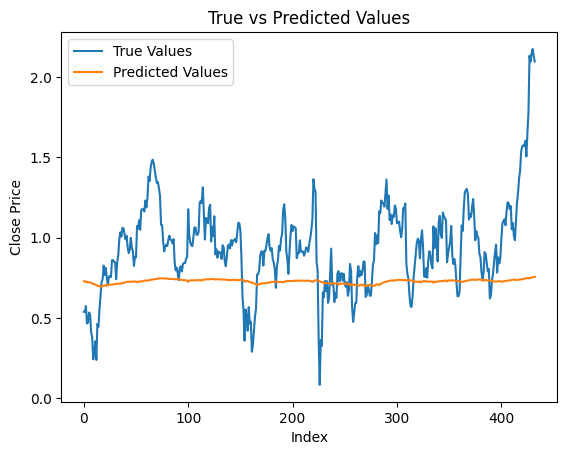

In [ ]:

# Plot the predicted values
plt.plot(y_test, label='True Values')
plt.plot(np.reshape(y_pred, 433),  label='Predicted Values')

plt.title('True vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1)                 28        
                                                                 
Total params: 28 (112.00 Byte)
Trainable params: 28 (112.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.history.history

{}

In [ ]:
##office hour

ibm_df['RSI']=ta.rsi(ibm_df.Close, length=10)
ibm_df['EMAF']=ta.ema(ibm_df.Close, length=20)
ibm_df['EMAM']=ta.ema(ibm_df.Close, length=100)
ibm_df['EMAS']=ta.ema(ibm_df.Close, length=150)

ibm_df_set = ibm_df.loc[:, ['Date','Volume','Close','RSI', 'EMAF', 'EMAM','EMAS']].dropna()

splitlimit = int(len(ibm_df_set) * 0.8)
ibm_df_train_set = ibm_df_set.loc[:splitlimit,:]
ibm_df_test_set = ibm_df_set.loc[splitlimit:,:]
#ibm_df_train_set.set_index('Date')
#ibm_df_test_set.set_index('Date')

X_train = ibm_df_train_set[['Volume','RSI', 'EMAF', 'EMAM','EMAS']]
y_train = ibm_df_train_set[['Close']]
X_test = ibm_df_test_set[['Volume','RSI', 'EMAF', 'EMAM','EMAS']]
y_test = ibm_df_test_set[['Close']]

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

X_train = np.reshape(X_train, (X_train.shape[0],1, X_train.shape[1]))
#y_train = np.reshape(y_train, (y_train.shape[0],1,y_train.shape[1]))
X_test = np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))
#y_test = np.reshape(y_test, (y_test.shape[0],1,y_test.shape[1]))


model = keras.Sequential()
model.add(keras.Input((1,5)))
model.add(keras.layers.LSTM(1)) #1 è l'output dimension
model.compile(optimizer ='adam', loss='mse')

model.fit(x=X_train, y=y_train, batch_size=4, epochs=10, validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/10
247/247 [==============================] - 6s 11ms/step - loss: 1.5440 - val_loss: 0.1138
Epoch 2/10
247/247 [==============================] - 2s 7ms/step - loss: 1.5440 - val_loss: 0.1138
Epoch 3/10
247/247 [==============================] - 2s 9ms/step - loss: 1.5440 - val_loss: 0.1138
Epoch 4/10
247/247 [==============================] - 2s 8ms/step - loss: 1.5440 - val_loss: 0.1138
Epoch 5/10
247/247 [==============================] - 2s 6ms/step - loss: 1.5440 - val_loss: 0.1138
Epoch 6/10
247/247 [==============================] - 1s 5ms/step - loss: 1.5440 - val_loss: 0.1138
Epoch 7/10
247/247 [==============================] - 1s 6ms/step - loss: 1.2110 - val_loss: 0.1434
Epoch 8/10
247/247 [==============================] - 1s 5ms/step - loss: 0.4676 - val_loss: 0.1315
Epoch 9/10
247/247 [==============================] - 1s 5ms/step - loss: 0.4580 - val_loss: 0.1236
Epoch 10/10
14/14 [==============================] - 1s 3ms/step


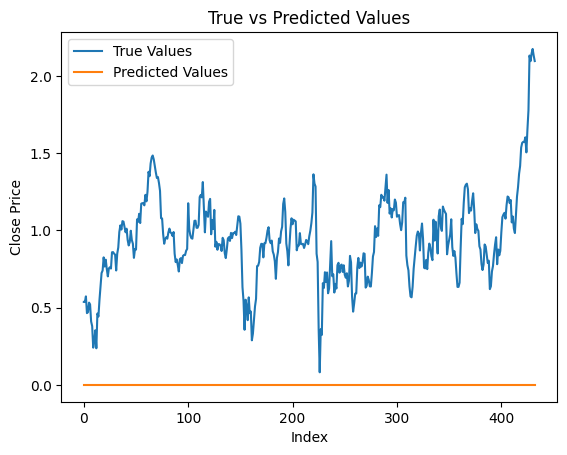

In [ ]:
# Plot the predicted values
plt.plot(y_test, label='True Values')
plt.plot(np.reshape(y_pred, 433),  label='Predicted Values')

plt.title('True vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [ ]:
#another try: do not use my customized windowed

ibm_df['RSI']=ta.rsi(ibm_df.Close, length=10)
ibm_df['EMAF']=ta.ema(ibm_df.Close, length=20)
ibm_df['EMAM']=ta.ema(ibm_df.Close, length=100)
ibm_df['EMAS']=ta.ema(ibm_df.Close, length=150)

ibm_df_set = ibm_df.loc[:, ['Date','Volume','Close','RSI', 'EMAF', 'EMAM','EMAS']].dropna()

splitlimit = int(len(ibm_df_set) * 0.8)
ibm_df_train_set = ibm_df_set.loc[:splitlimit,:]
ibm_df_test_set = ibm_df_set.loc[splitlimit:,:]
#ibm_df_train_set.set_index('Date')
#ibm_df_test_set.set_index('Date')

X_train = ibm_df_train_set[['Volume','RSI', 'EMAF', 'EMAM','EMAS']]
y_train = ibm_df_train_set[['Close']]
X_test = ibm_df_test_set[['Volume','RSI', 'EMAF', 'EMAM','EMAS']]
y_test = ibm_df_test_set[['Close']]

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

X_train = np.reshape(X_train, (X_train.shape[0],1, X_train.shape[1]))
#y_train = np.reshape(y_train, (y_train.shape[0],1,y_train.shape[1]))
X_test = np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))
#y_test = np.reshape(y_test, (y_test.shape[0],1,y_test.shape[1]))

model = keras.Sequential()
model.add(keras.Input((1,5)))
model.add(keras.layers.LSTM(1)) #1 è l'output dimension
model.compile(optimizer ='adam', loss='mse')

model.fit(x=X_train, y=y_train, batch_size=4, epochs=30, validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/30
247/247 [==============================] - 7s 12ms/step - loss: 0.6361 - val_loss: 0.3163
Epoch 2/30
247/247 [==============================] - 1s 5ms/step - loss: 0.5636 - val_loss: 0.2389
Epoch 3/30
247/247 [==============================] - 1s 4ms/step - loss: 0.5268 - val_loss: 0.1844
Epoch 4/30
247/247 [==============================] - 1s 5ms/step - loss: 0.4930 - val_loss: 0.1535
Epoch 5/30
247/247 [==============================] - 1s 4ms/step - loss: 0.4637 - val_loss: 0.1292
Epoch 6/30
247/247 [==============================] - 1s 5ms/step - loss: 0.4542 - val_loss: 0.1271
Epoch 7/30
247/247 [==============================] - 2s 9ms/step - loss: 0.4496 - val_loss: 0.1211
Epoch 8/30
247/247 [==============================] - 4s 14ms/step - loss: 0.4467 - val_loss: 0.1194
Epoch 9/30
247/247 [==============================] - 3s 12ms/step - loss: 0.4446 - val_loss: 0.1177
Epoch 10/30
247/247 [==============================] - 2s 8ms/step - loss: 0.4431 - val_loss: 0.1

Epoch 1/30
247/247 [==============================] - 2s 7ms/step - loss: 0.4360 - val_loss: 0.1138
Epoch 2/30
247/247 [==============================] - 1s 5ms/step - loss: 0.4360 - val_loss: 0.1138
Epoch 3/30
247/247 [==============================] - 2s 10ms/step - loss: 0.4359 - val_loss: 0.1138
Epoch 4/30
247/247 [==============================] - 1s 6ms/step - loss: 0.4359 - val_loss: 0.1138
Epoch 5/30
247/247 [==============================] - 1s 4ms/step - loss: 0.4358 - val_loss: 0.1138
Epoch 6/30
247/247 [==============================] - 1s 5ms/step - loss: 0.4358 - val_loss: 0.1138
Epoch 7/30
247/247 [==============================] - 1s 5ms/step - loss: 0.4358 - val_loss: 0.1138
Epoch 8/30
247/247 [==============================] - 1s 5ms/step - loss: 0.4358 - val_loss: 0.1138
Epoch 9/30
247/247 [==============================] - 1s 5ms/step - loss: 0.4357 - val_loss: 0.1138
Epoch 10/30
247/247 [==============================] - 1s 4ms/step - loss: 0.4357 - val_loss: 0.113

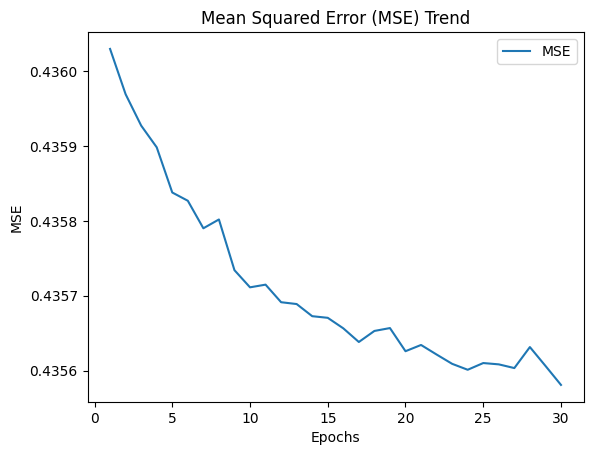

In [ ]:
history = model.fit(x=X_train, y=y_train, batch_size=4, epochs=30, validation_data= (X_test,y_test))
# Extract the MSE values from the history object
mse_values = history.history['loss']

# Plot the trend of MSE with respect to epochs
plt.plot(range(1, len(mse_values) + 1), mse_values, label='MSE')
plt.title('Mean Squared Error (MSE) Trend')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

Epoch 1/50
247/247 [==============================] - 6s 11ms/step - loss: 0.7268 - val_loss: 0.9664
Epoch 2/50
247/247 [==============================] - 2s 10ms/step - loss: 0.7265 - val_loss: 0.9664
Epoch 3/50
247/247 [==============================] - 1s 6ms/step - loss: 0.7263 - val_loss: 0.9641
Epoch 4/50
247/247 [==============================] - 1s 4ms/step - loss: 0.6144 - val_loss: 0.1838
Epoch 5/50
247/247 [==============================] - 1s 4ms/step - loss: 0.4926 - val_loss: 0.1439
Epoch 6/50
247/247 [==============================] - 1s 5ms/step - loss: 0.4745 - val_loss: 0.1330
Epoch 7/50
247/247 [==============================] - 1s 5ms/step - loss: 0.4646 - val_loss: 0.1263
Epoch 8/50
247/247 [==============================] - 1s 6ms/step - loss: 0.4587 - val_loss: 0.1252
Epoch 9/50
247/247 [==============================] - 1s 5ms/step - loss: 0.4547 - val_loss: 0.1197
Epoch 10/50
247/247 [==============================] - 1s 6ms/step - loss: 0.2763 - val_loss: 0.11

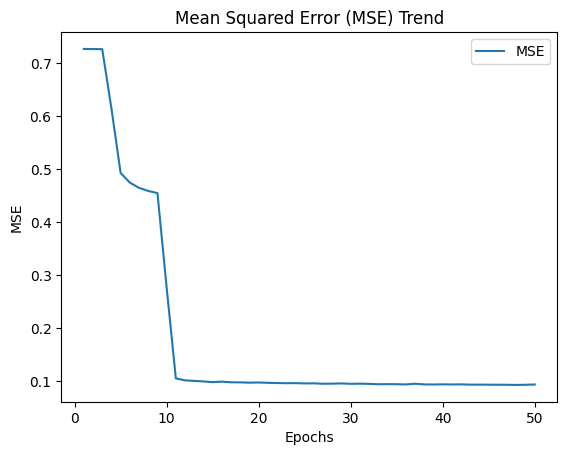

In [ ]:
#prova definitiva per scegliere il numero di epoche!!

ibm_df['RSI']=ta.rsi(ibm_df.Close, length=10)
ibm_df['EMAF']=ta.ema(ibm_df.Close, length=20)
ibm_df['EMAM']=ta.ema(ibm_df.Close, length=100)
ibm_df['EMAS']=ta.ema(ibm_df.Close, length=150)

ibm_df_set = ibm_df.loc[:, ['Date','Volume','Close','RSI', 'EMAF', 'EMAM','EMAS']].dropna()

splitlimit = int(len(ibm_df_set) * 0.8)
ibm_df_train_set = ibm_df_set.loc[:splitlimit,:]
ibm_df_test_set = ibm_df_set.loc[splitlimit:,:]
#ibm_df_train_set.set_index('Date')
#ibm_df_test_set.set_index('Date')

X_train = ibm_df_train_set[['Volume','RSI', 'EMAF', 'EMAM','EMAS']]
y_train = ibm_df_train_set[['Close']]
X_test = ibm_df_test_set[['Volume','RSI', 'EMAF', 'EMAM','EMAS']]
y_test = ibm_df_test_set[['Close']]

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

X_train = np.reshape(X_train, (X_train.shape[0],1, X_train.shape[1]))
y_train = np.reshape(y_train, (y_train.shape[0],1,y_train.shape[1]))
X_test = np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))
#y_test = np.reshape(y_test, (y_test.shape[0],1,y_test.shape[1]))

model = keras.Sequential()
model.add(keras.Input((1,5)))
model.add(keras.layers.LSTM(1)) #1 è l'output dimension
model.compile(optimizer ='adam', loss='mse')


history = model.fit(x=X_train, y=y_train, batch_size=4, epochs=50, validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

# Extract the MSE values from the history object
mse_values = history.history['loss']

# Plot the trend of MSE with respect to epochs
plt.plot(range(1, len(mse_values) + 1), mse_values, label='MSE')
plt.title('Mean Squared Error (MSE) Trend')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

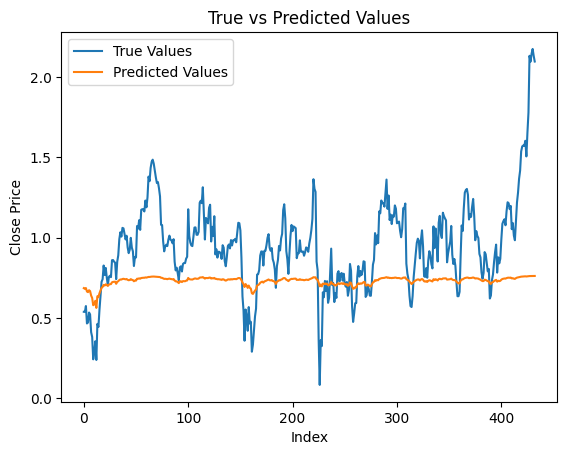

In [ ]:
# Plot the predicted values
plt.plot(y_test, label='True Values')
plt.plot(np.reshape(y_pred, 433),  label='Predicted Values')

plt.title('True vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

Reference to implement to LSTM model:https://medium.com/@pennQuin/implementation-of-long-short-term-memory-lstm-81e35fa5ca54

Epoch 1/10
99/99 [==============================] - 17s 63ms/step - loss: 0.4112 - val_loss: 0.2478
Epoch 2/10
99/99 [==============================] - 3s 29ms/step - loss: 0.0997 - val_loss: 0.1368
Epoch 3/10
99/99 [==============================] - 4s 39ms/step - loss: 0.0591 - val_loss: 0.0558
Epoch 4/10
99/99 [==============================] - 3s 29ms/step - loss: 0.0389 - val_loss: 0.0416
Epoch 5/10
99/99 [==============================] - 3s 29ms/step - loss: 0.0272 - val_loss: 0.0421
Epoch 6/10
99/99 [==============================] - 3s 29ms/step - loss: 0.0223 - val_loss: 0.0490
Epoch 7/10
99/99 [==============================] - 6s 56ms/step - loss: 0.0184 - val_loss: 0.0680
Epoch 8/10
99/99 [==============================] - 5s 51ms/step - loss: 0.0177 - val_loss: 0.0201
Epoch 9/10
99/99 [==============================] - 5s 50ms/step - loss: 0.0137 - val_loss: 0.0250
Epoch 10/10
14/14 [==============================] - 2s 16ms/step


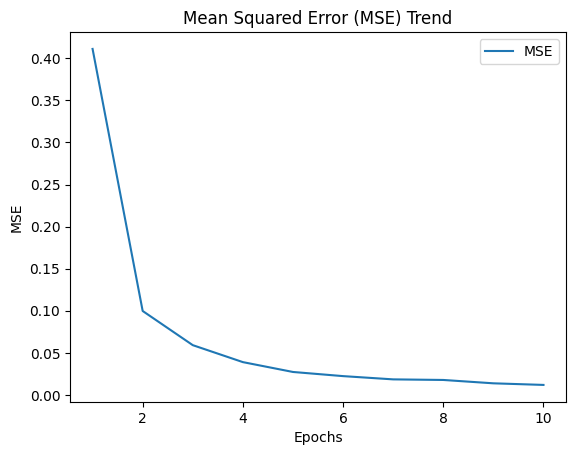

In [ ]:
#prova con diversa struttura layers
ibm_df['RSI']=ta.rsi(ibm_df.Close, length=10)
ibm_df['EMAF']=ta.ema(ibm_df.Close, length=20)
ibm_df['EMAM']=ta.ema(ibm_df.Close, length=100)
ibm_df['EMAS']=ta.ema(ibm_df.Close, length=150)

ibm_df_set = ibm_df.loc[:, ['Date','Volume','Close','RSI', 'EMAF', 'EMAM','EMAS']].dropna()

splitlimit = int(len(ibm_df_set) * 0.8)
ibm_df_train_set = ibm_df_set.loc[:splitlimit,:]
ibm_df_test_set = ibm_df_set.loc[splitlimit:,:]
#ibm_df_train_set.set_index('Date')
#ibm_df_test_set.set_index('Date')

X_train = ibm_df_train_set[['Volume','RSI', 'EMAF', 'EMAM','EMAS']]
y_train = ibm_df_train_set[['Close']]
X_test = ibm_df_test_set[['Volume','RSI', 'EMAF', 'EMAM','EMAS']]
y_test = ibm_df_test_set[['Close']]

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

X_train = np.reshape(X_train, (X_train.shape[0],1, X_train.shape[1]))
#y_train = np.reshape(y_train, (y_train.shape[0],1,y_train.shape[1]))
X_test = np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))
#y_test = np.reshape(y_test, (y_test.shape[0],1,y_test.shape[1]))

X_train_1 = np.repeat(X_train, repeats=50, axis=1)
y_train_1 = np.array(ibm_df_train_set[['Close']])

X_test_1 = np.repeat(X_test, repeats=50, axis=1)
y_test_1 = np.array(ibm_df_test_set[['Close']])

model_1 = keras.Sequential()
model_1.add(keras.layers.LSTM(units = 50, return_sequences=True, input_shape=(X_train_1.shape[1], X_train_1.shape[2])))
model_1.add(keras.layers.Dropout(0.2))
model_1.add(keras.layers.LSTM(units = 50,return_sequences=True))
model_1.add(keras.layers.Dropout(0.2))
model_1.add(keras.layers.LSTM(units = 50,return_sequences=True))
model_1.add(keras.layers.Dense(units=1))
model_1.compile(optimizer ='adam', loss='mse')


history = model_1.fit(x=X_train_1, y=y_train_1, batch_size=10, epochs=10, validation_data= (X_test_1,y_test_1))
y_pred = model_1.predict(X_test_1)

# Extract the MSE values from the history object
mse_values_1 = history.history['loss']

# Plot the trend of MSE with respect to epochs
plt.plot(range(1, len(mse_values_1) + 1), mse_values_1, label='MSE')
plt.title('Mean Squared Error (MSE) Trend')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

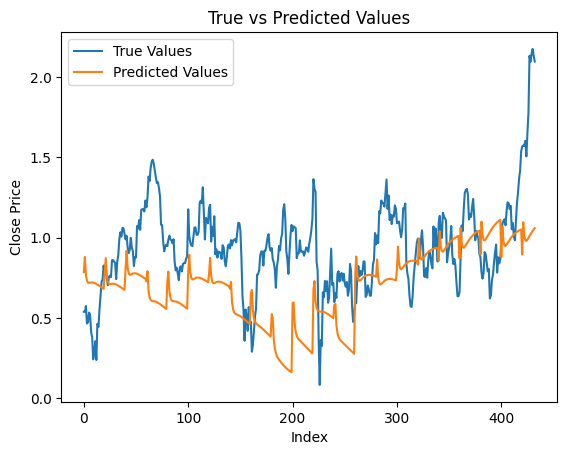

In [ ]:
# Plot the predicted values
plt.plot(y_test_1, label='True Values')
plt.plot(np.reshape(y_pred,8660)[:len(y_test_1)],  label='Predicted Values')

plt.title('True vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [ ]:
#another try: do not use my customized windowed

ibm_df['RSI']=ta.rsi(ibm_df.Close, length=10)
ibm_df['EMAF']=ta.ema(ibm_df.Close, length=20)
ibm_df['EMAM']=ta.ema(ibm_df.Close, length=100)
ibm_df['EMAS']=ta.ema(ibm_df.Close, length=150)

ibm_df_set = ibm_df.loc[:, ['Date','Volume','Close','RSI', 'EMAF', 'EMAM','EMAS']].dropna()

splitlimit = int(len(ibm_df_set) * 0.8)
ibm_df_train_set = ibm_df_set.loc[:splitlimit,:]
ibm_df_test_set = ibm_df_set.loc[splitlimit:,:]
#ibm_df_train_set.set_index('Date')
#ibm_df_test_set.set_index('Date')

X_train = ibm_df_train_set[['Volume','RSI', 'EMAF', 'EMAM','EMAS']]
y_train = ibm_df_train_set[['Close']]
X_test = ibm_df_test_set[['Volume','RSI', 'EMAF', 'EMAM','EMAS']]
y_test = ibm_df_test_set[['Close']]

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

X_train = np.reshape(X_train, (X_train.shape[0],1, X_train.shape[1]))
y_train = np.reshape(y_train, (y_train.shape[0],1,y_train.shape[1]))
X_test = np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))
y_test = np.reshape(y_test, (y_test.shape[0],1,y_test.shape[1]))

model = keras.Sequential()
model.add(keras.Input((1,5)))
model.add(keras.layers.LSTM(1)) #1 è l'output dimension
model.compile(optimizer ='adam', loss='mse')

model.fit(x=X_train, y=y_train, batch_size=200, epochs=300, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)

In [ ]:
model.history

In [ ]:
ibm_df.tail(10) #office hour

Date      Open      High       Low     Close    Volume        RSI  \
1556 2023-12-31  0.989935  0.945996  1.081272  1.603141  0.040935  79.025691   
1557 2024-01-07  1.006602  0.921551  0.986183  1.505740  0.087912  65.860770   
1558 2024-01-14  0.891599  0.995435  0.964240  1.653063  0.106960  73.328137   
1559 2024-01-21  1.089105  1.149246  1.165390  1.779087  0.125193  77.918806   
1560 2024-01-28  1.284111  1.844690  1.372447  2.132752  0.434384  85.630628   
1561 2024-02-04  1.690790  1.640342  1.662497  2.096586  0.194376  82.362294   
1562 2024-02-11  1.636622  1.577719  1.628175  2.146481  0.149213  83.337199   
1563 2024-02-18  1.647456  1.626334  1.649837  2.175587  0.140671  83.913526   
1564 2024-02-25  1.695790  1.621390  1.551091  2.132599  0.105699  79.406475   
1565 2024-03-03  1.639122  1.548742  1.700476  2.097000  0.000000  75.666920   

          EMAF      EMAM      EMAS  
1556  1.309648  1.050016  1.009865  
1557  1.328324  1.059040  1.016432  
1558  1.359251  1.070803  1.024865  
1559  1.399235  1.084829  1.034854  
1560  1.469094  1.105580  1.049396  
1561  1.528855  1.125204  1.063266  
1562  1.587677  1.145427  1.077613  
1563  1.643668  1.165826  1.092156  
1564  1.690233  1.184970  1.105937  
1565  1.728973  1.203030  1.119063

In [ ]:
def windowed_dataset(dataset, window_size): #office hour
    windowed_dataset = dataset.set_index('Date').copy()

    windowed_close = []
    windowed_volume = []

    for j in range(len(windowed_dataset)):
        if j >= window_size:
            window_data = windowed_dataset.iloc[j - window_size : j]
            windowed_close.append(window_data['Close'].values)
            windowed_volume.append(window_data['Volume'].values)
        else:
            windowed_close.append(np.full(window_size, np.nan))
            windowed_volume.append(np.full(window_size, np.nan))

    windowed_dataset['Memory_Close'] = windowed_close
    windowed_dataset['Memory_Volume'] = windowed_volume

    return windowed_dataset

In [ ]:
windowed_dataset(ibm_df, 5).tail(10)

Open      High       Low     Close    Volume        RSI  \
Date                                                                      
2023-12-31  0.989935  0.945996  1.081272  1.603141  0.040935  79.025691   
2024-01-07  1.006602  0.921551  0.986183  1.505740  0.087912  65.860770   
2024-01-14  0.891599  0.995435  0.964240  1.653063  0.106960  73.328137   
2024-01-21  1.089105  1.149246  1.165390  1.779087  0.125193  77.918806   
2024-01-28  1.284111  1.844690  1.372447  2.132752  0.434384  85.630628   
2024-02-04  1.690790  1.640342  1.662497  2.096586  0.194376  82.362294   
2024-02-11  1.636622  1.577719  1.628175  2.146481  0.149213  83.337199   
2024-02-18  1.647456  1.626334  1.649837  2.175587  0.140671  83.913526   
2024-02-25  1.695790  1.621390  1.551091  2.132599  0.105699  79.406475   
2024-03-03  1.639122  1.548742  1.700476  2.097000  0.000000  75.666920   

                EMAF      EMAM      EMAS  \
Date                                       
2023-12-31  1.309648  1.050016  1.009865   
2024-01-07  1.328324  1.059040  1.016432   
2024-01-14  1.359251  1.070803  1.024865   
2024-01-21  1.399235  1.084829  1.034854   
2024-01-28  1.469094  1.105580  1.049396   
2024-02-04  1.528855  1.125204  1.063266   
2024-02-11  1.587677  1.145427  1.077613   
2024-02-18  1.643668  1.165826  1.092156   
2024-02-25  1.690233  1.184970  1.105937   
2024-03-03  1.728973  1.203030  1.119063   

                                                 Memory_Close  \
Date                                                            
2023-12-31  [1.4174334713076868, 1.5365792920971137, 1.567...   
2024-01-07  [1.5365792920971137, 1.567864165796083, 1.5738...   
2024-01-14  [1.567864165796083, 1.5738533618989055, 1.5718...   
2024-01-21  [1.5738533618989055, 1.571856216880693, 1.6031...   
2024-01-28  [1.571856216880693, 1.6031410905796626, 1.5057...   
2024-02-04  [1.6031410905796626, 1.505739969809158, 1.6530...   
2024-02-11  [1.505739969809158, 1.6530629991795283, 1.7790...   
2024-02-18  [1.6530629991795283, 1.779086879941991, 2.1327...   
2024-02-25  [1.779086879941991, 2.1327517085034455, 2.0965...   
2024-03-03  [2.1327517085034455, 2.0965859198496526, 2.146...   

                                                Memory_Volume  
Date                                                           
2023-12-31  [0.05537626655388376, 0.14194238451830218, 0.1...  
2024-01-07  [0.14194238451830218, 0.1437307336088092, 0.23...  
2024-01-14  [0.1437307336088092, 0.23726788068762478, 0.10...  
2024-01-21  [0.23726788068762478, 0.10770827335716784, 0.0...  
2024-01-28  [0.10770827335716784, 0.04093475207932549, 0.0...  
2024-02-04  [0.04093475207932549, 0.08791156930014968, 0.1...  
2024-02-11  [0.08791156930014968, 0.10695991046261025, 0.1...  
2024-02-18  [0.10695991046261025, 0.1251933493293506, 0.43...  
2024-02-25  [0.1251933493293506, 0.4343838741021956, 0.194...  
2024-03-03  [0.4343838741021956, 0.19437625410855133, 0.14...

In [ ]:
#PROVE

#versione liste
def windowed_dataset(dataset, window_size):
    windowed_dataset = dataset.set_index('Date').copy()

    windowed_close = np.full((len(windowed_dataset), window_size), np.nan)
    windowed_volume = np.full((len(windowed_dataset), window_size), np.nan)

    for j in range(len(windowed_dataset)):
        if j >= window_size:
            window_data = windowed_dataset.iloc[j - window_size : j]
            windowed_close[j] = window_data['Close'].values
            windowed_volume[j] = window_data['Volume'].values

    windowed_dataset['Memory_Close'] = list(windowed_close)
    windowed_dataset['Memory_Volume'] = list(windowed_volume)

    return windowed_dataset


ibm_df['RSI']=ta.rsi(ibm_df.Close, length=10)
ibm_df['EMAF']=ta.ema(ibm_df.Close, length=20)
ibm_df['EMAM']=ta.ema(ibm_df.Close, length=100)
ibm_df['EMAS']=ta.ema(ibm_df.Close, length=150)

ibm_df_set = ibm_df.loc[:, ['Date','Volume','Close','RSI', 'EMAF', 'EMAM','EMAS']].dropna()

splitlimit = int(len(ibm_df_set) * 0.8)

X = windowed_dataset(ibm_df_set, 5)[['RSI', 'EMAF', 'EMAM','EMAS','Memory_Close', 'Memory_Volume']].tail(len(ibm_df_set)-5)
y = windowed_dataset(ibm_df_set, 5)[['Close']].tail(len(ibm_df_set)-5)

X.shape,y.shape

X = np.array(X)
y = np.array(y)

X = np.reshape(X, (X.shape[0],1, X.shape[1]))
y = np.reshape(y, (y.shape[0],1,y.shape[1]))

model = keras.Sequential()
model.add(keras.Input((1,6)))
model.add(keras.layers.LSTM(1, input_shape=(1,6))) #1 è l'output dimension
model.compile(optimizer ='adam', loss='mse')

model.fit(x=X, y=y, batch_size=100, epochs=10)


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [ ]:
X.shape,y.shape

((1412, 1, 6), (1412, 1))

In [ ]:
#PROVE

#versione liste
def windowed_dataset(dataset, window_size):
    windowed_dataset = dataset.set_index('Date').copy()

    windowed_close = np.full((len(windowed_dataset), window_size), np.nan)
    windowed_volume = np.full((len(windowed_dataset), window_size), np.nan)

    for j in range(len(windowed_dataset)):
        if j >= window_size:
            window_data = windowed_dataset.iloc[j - window_size : j]
            windowed_close[j] = window_data['Close'].values
            windowed_volume[j] = window_data['Volume'].values

    windowed_dataset['Memory_Close'] = list(windowed_close)
    windowed_dataset['Memory_Volume'] = list(windowed_volume)

    return windowed_dataset


ibm_df['RSI']=ta.rsi(ibm_df.Close, length=10)
ibm_df['EMAF']=ta.ema(ibm_df.Close, length=20)
ibm_df['EMAM']=ta.ema(ibm_df.Close, length=100)
ibm_df['EMAS']=ta.ema(ibm_df.Close, length=150)

ibm_df_set = ibm_df.loc[:, ['Date','Volume','Close','RSI', 'EMAF', 'EMAM','EMAS']].dropna()

splitlimit = int(len(ibm_df_set) * 0.8)

X = windowed_dataset(ibm_df_set, 5)[['RSI', 'EMAF', 'EMAM','EMAS','Memory_Close', 'Memory_Volume']].tail(len(ibm_df_train_set)-5)
y = windowed_dataset(ibm_df_set, 5)[['Close']].tail(len(ibm_df_train_set)-5)

ibm_df_train_set = ibm_df_set.loc[:splitlimit,:]
ibm_df_test_set = ibm_df_set.loc[splitlimit:,:]

X_train = windowed_dataset(ibm_df_train_set, 5)[['RSI', 'EMAF', 'EMAM','EMAS','Memory_Close', 'Memory_Volume']].tail(len(ibm_df_train_set)-5)
y_train = windowed_dataset(ibm_df_train_set, 5)[['Close']].tail(len(ibm_df_train_set)-5)
X_test = windowed_dataset(ibm_df_test_set, 5)[['RSI', 'EMAF', 'EMAM','EMAS','Memory_Close', 'Memory_Volume']].tail(len(ibm_df_test_set)-5)
y_test = windowed_dataset(ibm_df_test_set, 5)[['Close']].tail(len(ibm_df_test_set)-5)


#X_train = np.concatenate((tf.convert_to_tensor(X_train[['EMAF','RSI','EMAM','EMAS']], dtype='float64'), np.asarray(X_train[['Memory_Close']]), np.asarray(X_train[['Memory_Close']])), axis=1)
#X_test = np.concatenate((tf.convert_to_tensor(X_test[['EMAF','RSI','EMAM','EMAS']], dtype='float64'), np.asarray(X_test[['Memory_Close']]), np.asarray(X_test[['Memory_Close']])), axis=1)

y_train, y_test = np.array(y_train), np.array(y_test)

X_train = np.reshape(X_train, (245, 4, X_train.shape[1]))
X_test = np.reshape(X_test, (107,4, X_test.shape[1]))
y_train = np.reshape(y_train, (245, 1))
y_test = np.reshape(y_test, (y_test.shape[0], y_test.shape[1]))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

#IBM
model = Sequential()
model.add(keras.Input((4,6)))
model.add(keras.layers.LSTM(1, input_shape=(4,6))) #1 è l'output dimension
model.compile(optimizer ='adam', loss='mse')

model.fit(x=X_train, y=y_train, batch_size=32, epochs=10)



y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

# Plot for training data
axes[0].plot(y_train, color='black', label='Actual (Train)')
axes[0].plot(y_pred_train, color='green', label='Predicted (Train)')
axes[0].set_title('Training Data')
axes[0].legend()

# Plot for test data
axes[1].plot(y_test, color='blue', label='Actual (Test)')
axes[1].plot(y_pred, color='red', label='Predicted (Test)')
axes[1].set_title('Test Data')
axes[1].legend()

plt.suptitle('IBM')
plt.show()

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [ ]:
#Indicators to be considered in the training set
ibm_df['RSI']=ta.rsi(ibm_df.Close, length=10)
ibm_df['EMAF']=ta.ema(ibm_df.Close, length=20)
ibm_df['EMAM']=ta.ema(ibm_df.Close, length=100)
ibm_df['EMAS']=ta.ema(ibm_df.Close, length=150)

ibm_df_set = ibm_df.loc[:, ['Date','Volume','Close','RSI', 'EMAF', 'EMAM','EMAS']].dropna()

splitlimit = int(len(ibm_df_set) * 0.8)

ibm_df_train_set = ibm_df_set.loc[:splitlimit,:]
ibm_df_test_set = ibm_df_set.loc[splitlimit:,:]

X_train = windowed_dataset(ibm_df_train_set, 5)[['RSI', 'EMAF', 'EMAM','EMAS','Memory_Close', 'Memory_Volume']].tail(len(ibm_df_train_set)-5)
y_train = windowed_dataset(ibm_df_train_set, 5)[['Close']].tail(len(ibm_df_train_set)-5)
X_test = windowed_dataset(ibm_df_test_set, 5)[['RSI', 'EMAF', 'EMAM','EMAS','Memory_Close', 'Memory_Volume']].tail(len(ibm_df_test_set)-5)
y_test = windowed_dataset(ibm_df_test_set, 5)[['Close']].tail(len(ibm_df_test_set)-5)


X_train, X_test = np.array(X_train), np.array(X_test)
y_train, y_test = np.array(y_train), np.array(y_test)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1], 1))
y_test = np.reshape(y_test, (y_test.shape[0], y_test.shape[1], 1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

#IBM
lstm_input = keras.layers.Input(shape=((6,1)), name='lstm_input')
inputs = keras.layers.LSTM(50, name='first_layer')(lstm_input)
inputs = keras.layers.Dense(1, name='dense_layer')(inputs)
output = keras.layers.Activation('linear', name='output')(inputs)
model = keras.Model(inputs=lstm_input, outputs=output)
adam = keras.optimizers.Adam()
model.compile(optimizer=adam, loss='mse')

model.fit(x=X_train, y=y_train,  batch_size=15,epochs=30,validation_split=0.1)


y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

# Plot for training data
axes[0].plot(y_train, color='black', label='Actual (Train)')
axes[0].plot(y_pred_train, color='green', label='Predicted (Train)')
axes[0].set_title('Training Data')
axes[0].legend()

# Plot for test data
axes[1].plot(y_test, color='blue', label='Actual (Test)')
axes[1].plot(y_pred, color='red', label='Predicted (Test)')
axes[1].set_title('Test Data')
axes[1].legend()

plt.suptitle('IBM')
plt.show()

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [ ]:
#IBM
def windowed_dataset(dataset, window_size):
    windowed_dataset = dataset.set_index('Date').copy()

    windowed_close = []
    windowed_volume = []

    for j in range(len(windowed_dataset)):
        if j >= window_size:
            window_data = windowed_dataset.iloc[j - window_size : j]
            windowed_close.append(window_data['Close'].values)
            windowed_volume.append(window_data['Volume'].values)
        else:
            windowed_close.append(np.full(window_size, np.nan))
            windowed_volume.append(np.full(window_size, np.nan))

    windowed_dataset['Memory_Close'] = windowed_close
    windowed_dataset['Memory_Volume'] = windowed_volume

    return windowed_dataset


#Indicators to be considered in the training set
ibm_df['RSI']=ta.rsi(ibm_df.Close, length=10)
ibm_df['EMAF']=ta.ema(ibm_df.Close, length=20)
ibm_df['EMAM']=ta.ema(ibm_df.Close, length=100)
ibm_df['EMAS']=ta.ema(ibm_df.Close, length=150)

ibm_df_set = ibm_df.loc[:, ['Date','Volume','Close','RSI', 'EMAF', 'EMAM','EMAS']].dropna()

splitlimit = int(len(ibm_df_set) * 0.8)

ibm_df_train_set = ibm_df_set.loc[:splitlimit,:]
ibm_df_test_set = ibm_df_set.loc[splitlimit:,:]

X_train = np.array(windowed_dataset(ibm_df_train_set, 5)[['RSI', 'EMAF', 'EMAM','EMAS','Memory_Close', 'Memory_Volume']].tail(len(ibm_df_train_set)-5))
y_train = np.array(windowed_dataset(ibm_df_train_set, 5)[['Close']].tail(len(ibm_df_train_set)-5))
X_test = np.array(windowed_dataset(ibm_df_test_set, 5)[['RSI', 'EMAF', 'EMAM','EMAS','Memory_Close', 'Memory_Volume']].tail(len(ibm_df_test_set)-5))
y_test = np.array(windowed_dataset(ibm_df_test_set, 5)[['Close']].tail(len(ibm_df_test_set)-5))



X_train, X_test = np.array(X_train), np.array(X_test)
y_train, y_test = np.array(y_train), np.array(y_test)

# Define the model
model = keras.Sequential([
    keras.layers.LSTM(50, input_shape=(6,1)),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, validation_split=0.1)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [ ]:
splitlimit = int(len(X) * 0.8)
X_train, X_test = [], []
for feature in X:
    X_train.append(feature[:splitlimit])
    X_test.append(feature[splitlimit:])

X_train, X_test = np.array(X_train), np.array(X_test)

y_train, y_test= [],[]
for feature in y:
    y_train.append(feature[:splitlimit])
    y_test.append(feature[splitlimit:])

y_train, y_test = np.array(y_train), np.array(y_test)

In [ ]:
X_train.dtype
splitlimit = int(len(X) * 0.8)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]

np.random.seed(10)

# Reshape X_train and X_test to match the expected input shape of the LSTM layer

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1], 1))
y_test = np.reshape(y_test, (y_test.shape[0], y_test.shape[1], 1))

dtype('O')

49/49 [==============================] - 1s 18ms/step


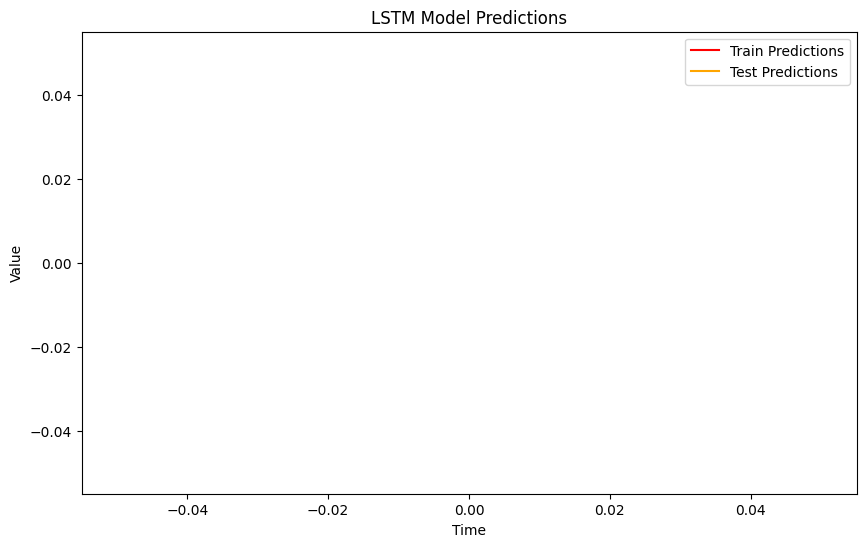

In [ ]:
import matplotlib.pyplot as plt

# Funzione per fare predizioni utilizzando il modello
def make_predictions(model, dataset):
    predictions = model.predict(dataset)
    return predictions

# Fare predizioni sui dati di addestramento e di test
train_predictions = make_predictions(lstm_model, X)
test_predictions = make_predictions(lstm_model, X)

# Plot dei risultati
plt.figure(figsize=(10, 6))
plt.plot(train_predictions, label='Train Predictions', color='red')
plt.plot(test_predictions, label='Test Predictions', color='orange')
plt.title('LSTM Model Predictions')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error
import math
#I have to fix the fact that the shape of y_test is 292 while the shape of y_pred is 282
mse = mean_squared_error(y_test[:282], y_pred)
rmse = math.sqrt(mse)

print("RMSE:", rmse)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
      a = dataset.iloc[i:(i+look_back), :]
      dataX.append(a)
      dataY.append(dataset.iloc[i + look_back, :])
  return np.array(dataX), np.array(dataY)

ibm_df['RSI']=ta.rsi(ibm_df.Close, length=10)
ibm_df['EMAF']=ta.ema(ibm_df.Close, length=20)
ibm_df['EMAM']=ta.ema(ibm_df.Close, length=100)
ibm_df['EMAS']=ta.ema(ibm_df.Close, length=150)


dataset = ibm_df.loc[:, [ 'Open', 'High', 'Low', 'Volume', 'RSI', 'EMAF', 'EMAM','EMAS', 'Close']]

# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset.loc[0:train_size,:], dataset.loc[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))


# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
 model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
 model.reset_states()
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

ValueError: cannot reshape array of size 111780 into shape (1242,10,1)

Epoch 1/10
99/99 [==============================] - 33s 123ms/step - loss: 0.0205 - val_loss: 4.2795
Epoch 2/10
99/99 [==============================] - 7s 74ms/step - loss: 0.0096 - val_loss: 4.3836
Epoch 3/10
99/99 [==============================] - 6s 64ms/step - loss: 0.0081 - val_loss: 4.2317
Epoch 4/10
99/99 [==============================] - 7s 70ms/step - loss: 0.0074 - val_loss: 4.3061
Epoch 5/10
99/99 [==============================] - 5s 55ms/step - loss: 0.0071 - val_loss: 4.1097
Epoch 6/10
99/99 [==============================] - 5s 48ms/step - loss: 0.0066 - val_loss: 3.9007
Epoch 7/10
99/99 [==============================] - 6s 57ms/step - loss: 0.0047 - val_loss: 3.5457
Epoch 8/10
99/99 [==============================] - 5s 55ms/step - loss: 0.0029 - val_loss: 3.4169
Epoch 9/10
99/99 [==============================] - 5s 55ms/step - loss: 0.0025 - val_loss: 3.3540
Epoch 10/10
14/14 [==============================] - 2s 15ms/step


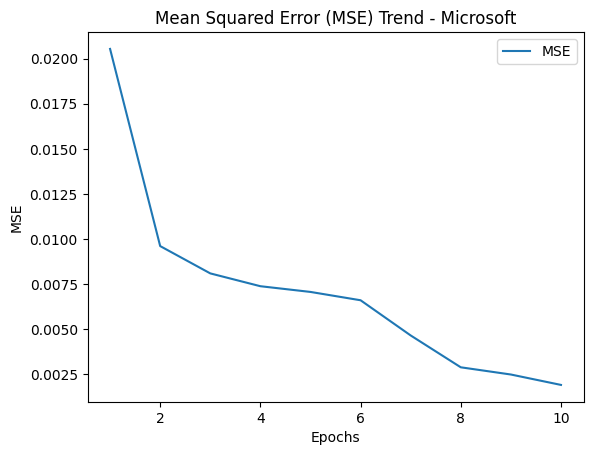

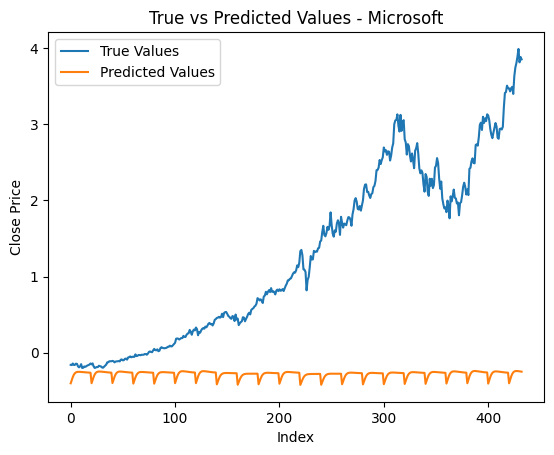

In [ ]:
##MICROSOFT BUT RIGHT!

#prova con diversa struttura layers
microsoft_df['RSI']=ta.rsi(microsoft_df.Close, length=10)
microsoft_df['EMAF']=ta.ema(microsoft_df.Close, length=20)
microsoft_df['EMAM']=ta.ema(microsoft_df.Close, length=100)
microsoft_df['EMAS']=ta.ema(microsoft_df.Close, length=150)

microsoft_df_set = microsoft_df.loc[:, ['Date','Volume','Close','RSI', 'EMAF', 'EMAM','EMAS']].dropna()

splitlimit = int(len(microsoft_df_set) * 0.8)
microsoft_df_train_set = microsoft_df_set.loc[:splitlimit,:]
microsoft_df_test_set = microsoft_df_set.loc[splitlimit:,:]
#ibm_df_train_set.set_index('Date')
#ibm_df_test_set.set_index('Date')

X_train = microsoft_df_train_set[['Volume','RSI', 'EMAF', 'EMAM','EMAS']]
y_train = microsoft_df_train_set[['Close']]
X_test = microsoft_df_test_set[['Volume','RSI', 'EMAF', 'EMAM','EMAS']]
y_test = microsoft_df_test_set[['Close']]

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

X_train = np.reshape(X_train, (X_train.shape[0],1, X_train.shape[1]))
#y_train = np.reshape(y_train, (y_train.shape[0],1,y_train.shape[1]))
X_test = np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))
#y_test = np.reshape(y_test, (y_test.shape[0],1,y_test.shape[1]))

X_train_1 = np.repeat(X_train, repeats=20, axis=1)
y_train_1 = np.array(microsoft_df_train_set[['Close']])

X_test_1 = np.repeat(X_test, repeats=20, axis=1)
y_test_1 = np.array(microsoft_df_test_set[['Close']])

model_1 = keras.Sequential()
model_1.add(keras.layers.LSTM(units = 50, return_sequences=True, input_shape=(X_train_1.shape[1], X_train_1.shape[2])))
model_1.add(keras.layers.Dropout(0.2))
model_1.add(keras.layers.LSTM(units = 50,return_sequences=True))
model_1.add(keras.layers.Dropout(0.2))
model_1.add(keras.layers.LSTM(units = 50,return_sequences=True))
model_1.add(keras.layers.Dense(units=1))
model_1.compile(optimizer ='adam', loss='mse')


history = model_1.fit(x=X_train_1, y=y_train_1, batch_size=10, epochs=10, validation_data= (X_test_1,y_test_1)) #ho provato con 30 ma è meglio 10
y_pred = model_1.predict(X_test_1)

# Extract the MSE values from the history object
mse_values_1 = history.history['loss']

# Plot the trend of MSE with respect to epochs
plt.plot(range(1, len(mse_values_1) + 1), mse_values_1, label='MSE')
plt.title('Mean Squared Error (MSE) Trend - Microsoft')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()


# Plot the predicted values
plt.plot(y_test_1, label='True Values')
plt.plot(np.reshape(y_pred,8660)[:len(y_test_1)],  label='Predicted Values')

plt.title('True vs Predicted Values - Microsoft')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

(1417, 9)
<class 'pandas.core.frame.DataFrame'>
Epoch 1/30
68/68 [==============================] - 3s 14ms/step - loss: 0.0650 - val_loss: 0.2904
Epoch 2/30
68/68 [==============================] - 0s 7ms/step - loss: 0.0090 - val_loss: 0.2774
Epoch 3/30
68/68 [==============================] - 0s 7ms/step - loss: 0.0086 - val_loss: 0.2904
Epoch 4/30
68/68 [==============================] - 1s 7ms/step - loss: 0.0081 - val_loss: 0.2625
Epoch 5/30
68/68 [==============================] - 0s 7ms/step - loss: 0.0080 - val_loss: 0.2929
Epoch 6/30
68/68 [==============================] - 0s 7ms/step - loss: 0.0085 - val_loss: 0.2625
Epoch 7/30
68/68 [==============================] - 0s 7ms/step - loss: 0.0084 - val_loss: 0.3289
Epoch 8/30
68/68 [==============================] - 0s 6ms/step - loss: 0.0081 - val_loss: 0.3027
Epoch 9/30
68/68 [==============================] - 0s 7ms/step - loss: 0.0088 - val_loss: 0.2828
Epoch 10/30
68/68 [==============================] - 0s 7ms/step - lo

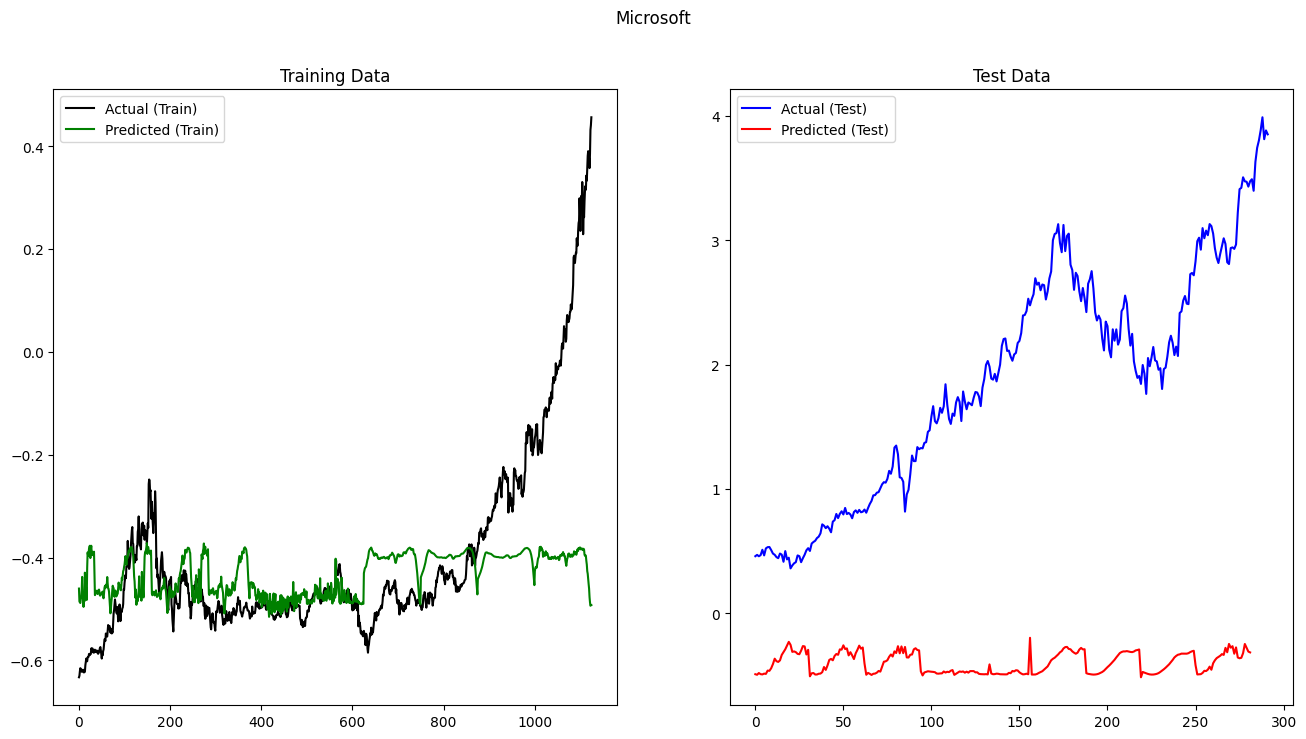

In [ ]:
#Microsoft

# Adding indicators
microsoft_df['RSI']=ta.rsi(microsoft_df.Close, length=15)
microsoft_df['EMAF']=ta.ema(microsoft_df.Close, length=20)
microsoft_df['EMAM']=ta.ema(microsoft_df.Close, length=100)
microsoft_df['EMAS']=ta.ema(microsoft_df.Close, length=150)


microsoft_df.dropna(inplace=True)
microsoft_df.reset_index(inplace = True)
microsoft_df_set = microsoft_df.loc[:, [ 'Open', 'High', 'Low', 'Volume', 'RSI', 'EMAF', 'EMAM','EMAS', 'Close']]
pd.set_option('display.max_columns', None)

microsoft_df_set.head(10)
print(microsoft_df_set.shape)
print(type(microsoft_df_set))
#Target column Categories
Y =[1 if microsoft_df.Open[i]<microsoft_df.Close[i] else 0 for i in range(0, len(microsoft_df))] #on Y,  I have 1 if the open price is lower than the close price, 0 otherwise

y = [microsoft_df.Close[i] for i in range(0, len(microsoft_df))] #on y, I have the close price

#On X, I'm storing the values of the 9 features I have but considering a shift of 10 weeks
X = []
backcandles = 10
for j in range(9):
    X.append([])
    for i in range(backcandles, microsoft_df_set.shape[0]):
        X[j].append(microsoft_df_set.iloc[i - backcandles:i, j].values)

splitlimit = int(len(X[0]) * 0.8)
X_train, X_test = [], []
for feature in X:
    X_train.append(feature[:splitlimit])
    X_test.append(feature[splitlimit:])

X_train, X_test = np.array(X_train), np.array(X_test)

y_train, y_test = y[:splitlimit], y[splitlimit:]
y_train, y_test = np.array(y_train), np.array(y_test)

# Reshaping the arrays to match the input shape expected by the model
X_train = X_train.reshape(-1, backcandles, 9)
X_test = X_test.reshape(-1, backcandles, 9)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

np.random.seed(10)

lstm_input = keras.layers.Input(shape=(backcandles, 9), name='lstm_input')
inputs = keras.layers.LSTM(50, name='first_layer')(lstm_input)
inputs = keras.layers.Dense(1, name='dense_layer')(inputs)
output = keras.layers.Activation('linear', name='output')(inputs)
model = keras.Model(inputs=lstm_input, outputs=output)
adam = keras.optimizers.Adam()
model.compile(optimizer=adam, loss='mse')

model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split=0.1)

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Plot for training data
axes[0].plot(y_train, color='black', label='Actual (Train)')
axes[0].plot(y_pred_train, color='green', label='Predicted (Train)')
axes[0].set_title('Training Data')
axes[0].legend()

# Plot for test data
axes[1].plot(y_test, color='blue', label='Actual (Test)')
axes[1].plot(y_pred, color='red', label='Predicted (Test)')
axes[1].set_title('Test Data')
axes[1].legend()

plt.suptitle('Microsoft')
plt.show()

Epoch 1/30
86/86 [==============================] - 17s 86ms/step - loss: 0.0536 - val_loss: 4.3246
Epoch 2/30
86/86 [==============================] - 4s 50ms/step - loss: 0.0311 - val_loss: 3.8324
Epoch 3/30
86/86 [==============================] - 4s 47ms/step - loss: 0.0209 - val_loss: 3.3869
Epoch 4/30
86/86 [==============================] - 5s 60ms/step - loss: 0.0091 - val_loss: 2.9231
Epoch 5/30
86/86 [==============================] - 5s 57ms/step - loss: 0.0069 - val_loss: 2.5103
Epoch 6/30
86/86 [==============================] - 4s 50ms/step - loss: 0.0051 - val_loss: 2.3111
Epoch 7/30
86/86 [==============================] - 4s 44ms/step - loss: 0.0046 - val_loss: 2.2124
Epoch 8/30
86/86 [==============================] - 3s 30ms/step - loss: 0.0037 - val_loss: 1.9808
Epoch 9/30
86/86 [==============================] - 3s 30ms/step - loss: 0.0033 - val_loss: 2.0119
Epoch 10/30
86/86 [==============================] - 3s 30ms/step - loss: 0.0028 - val_loss: 1.7655
Epoch 11

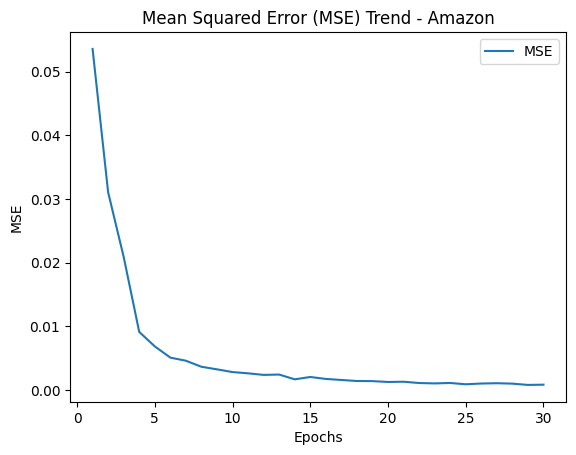

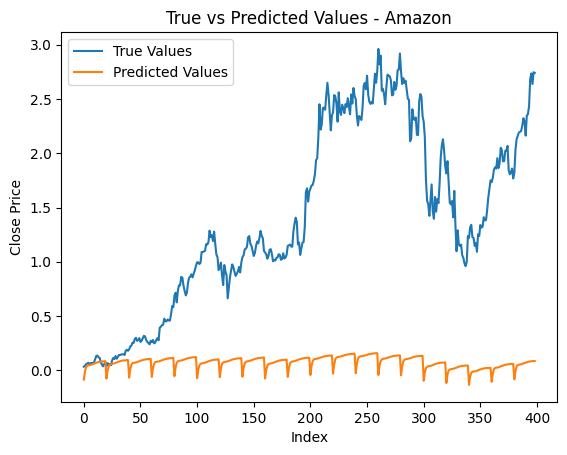

In [ ]:
##AMAZON BUT RIGHT!

#prova con diversa struttura layers
amazon_df['RSI']=ta.rsi(amazon_df.Close, length=10)
amazon_df['EMAF']=ta.ema(amazon_df.Close, length=20)
amazon_df['EMAM']=ta.ema(amazon_df.Close, length=100)
amazon_df['EMAS']=ta.ema(amazon_df.Close, length=150)

amazon_df_set = amazon_df.loc[:, ['Date','Volume','Close','RSI', 'EMAF', 'EMAM','EMAS']].dropna()

splitlimit = int(len(amazon_df_set) * 0.8)
amazon_df_train_set = amazon_df_set.loc[:splitlimit,:]
amazon_df_test_set = amazon_df_set.loc[splitlimit:,:]
#ibm_df_train_set.set_index('Date')
#ibm_df_test_set.set_index('Date')

X_train = amazon_df_train_set[['Volume','RSI', 'EMAF', 'EMAM','EMAS']]
y_train = amazon_df_train_set[['Close']]
X_test = amazon_df_test_set[['Volume','RSI', 'EMAF', 'EMAM','EMAS']]
y_test = amazon_df_test_set[['Close']]

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

X_train = np.reshape(X_train, (X_train.shape[0],1, X_train.shape[1]))
#y_train = np.reshape(y_train, (y_train.shape[0],1,y_train.shape[1]))
X_test = np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))
#y_test = np.reshape(y_test, (y_test.shape[0],1,y_test.shape[1]))

X_train_1 = np.repeat(X_train, repeats=20, axis=1)
y_train_1 = np.array(amazon_df_train_set[['Close']])

X_test_1 = np.repeat(X_test, repeats=20, axis=1)
y_test_1 = np.array(amazon_df_test_set[['Close']])

model_1 = keras.Sequential()
model_1.add(keras.layers.LSTM(units = 50, return_sequences=True, input_shape=(X_train_1.shape[1], X_train_1.shape[2])))
model_1.add(keras.layers.Dropout(0.2))
model_1.add(keras.layers.LSTM(units = 50,return_sequences=True))
model_1.add(keras.layers.Dropout(0.2))
model_1.add(keras.layers.LSTM(units = 50,return_sequences=True))
model_1.add(keras.layers.Dense(units=1))
model_1.compile(optimizer ='adam', loss='mse')


history = model_1.fit(x=X_train_1, y=y_train_1, batch_size=10, epochs=30, validation_data= (X_test_1,y_test_1))
y_pred = model_1.predict(X_test_1)

# Extract the MSE values from the history object
mse_values_1 = history.history['loss']

# Plot the trend of MSE with respect to epochs
plt.plot(range(1, len(mse_values_1) + 1), mse_values_1, label='MSE')
plt.title('Mean Squared Error (MSE) Trend - Amazon')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()


# Plot the predicted values
plt.plot(y_test_1, label='True Values')
plt.plot(np.reshape(y_pred,7980)[:len(y_test_1)],  label='Predicted Values')

plt.title('True vs Predicted Values - Amazon')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [ ]:
#amazon

# Adding indicators
amazon_df['RSI']=ta.rsi(amazon_df.Close, length=15)
amazon_df['EMAF']=ta.ema(amazon_df.Close, length=20)
amazon_df['EMAM']=ta.ema(amazon_df.Close, length=100)
amazon_df['EMAS']=ta.ema(amazon_df.Close, length=150)


amazon_df.dropna(inplace=True)
amazon_df.reset_index(inplace = True)
amazon_df_set = amazon_df.loc[:, [ 'Open', 'High', 'Low', 'Volume', 'RSI', 'EMAF', 'EMAM','EMAS', 'Close']]
pd.set_option('display.max_columns', None)

amazon_df_set.head(10)
print(amazon_df_set.shape)
print(type(amazon_df_set))
#Target column Categories
Y = [1 if amazon_df.Open[i]<amazon_df.Close[i] else 0 for i in range(0, len(amazon_df))]

y = [amazon_df.Close[i] for i in range(0, len(amazon_df))] #on yi, I have the close price
#print(yi)
#print(len(yi))
#On X, I'm storing the values of the 9 features I have but considering a shift of 10 weeks
X = []
backcandles = 10
for j in range(9):
    X.append([])
    for i in range(backcandles, amazon_df_set.shape[0]):
        X[j].append(amazon_df_set.iloc[i - backcandles:i, j].values)

splitlimit = int(len(X[0]) * 0.8)
X_train, X_test = [], []
for feature in X:
    X_train.append(feature[:splitlimit])
    X_test.append(feature[splitlimit:])

X_train, X_test = np.array(X_train), np.array(X_test)

y_train, y_test = y[:splitlimit], y[splitlimit:]
y_train, y_test = np.array(y_train), np.array(y_test)

# Reshaping the arrays to match the input shape expected by the model
X_train = X_train.reshape(-1, backcandles, 9)
X_test = X_test.reshape(-1, backcandles, 9)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

np.random.seed(10)

lstm_input = keras.layers.Input(shape=(backcandles, 9), name='lstm_input')
inputs = keras.layers.LSTM(50, name='first_layer')(lstm_input)
inputs = keras.layers.Dense(1, name='dense_layer')(inputs)
output = keras.layers.Activation('linear', name='output')(inputs)
model = keras.Model(inputs=lstm_input, outputs=output)
adam = keras.optimizers.Adam()
model.compile(optimizer=adam, loss='mse')

model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split=0.1)

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Plot for training data
axes[0].plot(y_train, color='black', label='Actual (Train)')
axes[0].plot(y_pred_train, color='green', label='Predicted (Train)')
axes[0].set_title('Training Data')
axes[0].legend()

# Plot for test data
axes[1].plot(y_test, color='blue', label='Actual (Test)')
axes[1].plot(y_pred, color='red', label='Predicted (Test)')
axes[1].set_title('Test Data')
axes[1].legend()

plt.suptitle('Amazon')
plt.show()

Epoch 1/30
99/99 [==============================] - 22s 92ms/step - loss: 0.0926 - val_loss: 2.3224
Epoch 2/30
99/99 [==============================] - 6s 62ms/step - loss: 0.0351 - val_loss: 1.5345
Epoch 3/30
99/99 [==============================] - 7s 73ms/step - loss: 0.0185 - val_loss: 1.7092
Epoch 4/30
99/99 [==============================] - 8s 79ms/step - loss: 0.0100 - val_loss: 1.6441
Epoch 5/30
99/99 [==============================] - 9s 87ms/step - loss: 0.0065 - val_loss: 1.7044
Epoch 6/30
99/99 [==============================] - 7s 72ms/step - loss: 0.0053 - val_loss: 1.5721
Epoch 7/30
99/99 [==============================] - 8s 81ms/step - loss: 0.0045 - val_loss: 1.5665
Epoch 8/30
99/99 [==============================] - 7s 74ms/step - loss: 0.0036 - val_loss: 1.6810
Epoch 9/30
99/99 [==============================] - 7s 72ms/step - loss: 0.0038 - val_loss: 1.6492
Epoch 10/30
99/99 [==============================] - 8s 84ms/step - loss: 0.0031 - val_loss: 1.5939
Epoch 11

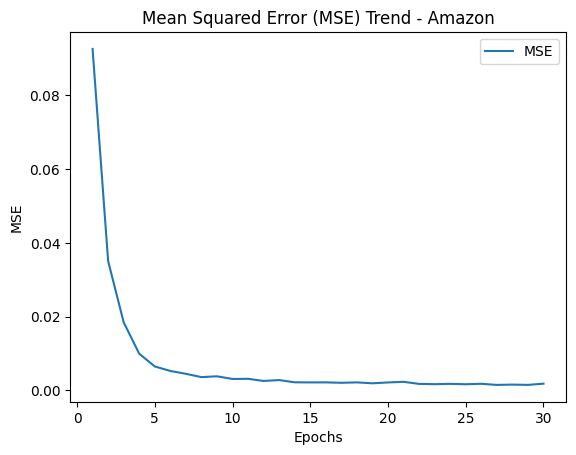

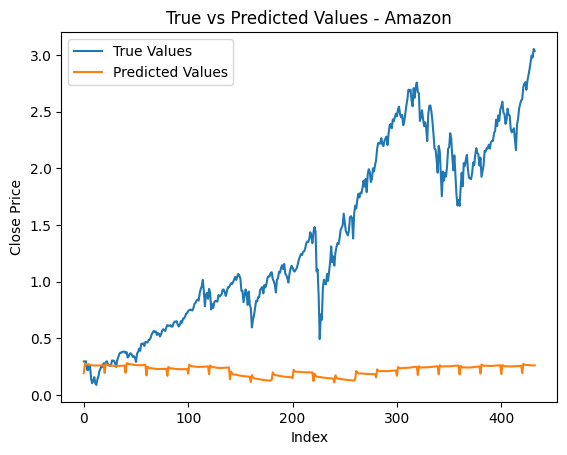

In [ ]:
##sp500 BUT RIGHT!

#prova con diversa struttura layers
sp500_df['RSI']=ta.rsi(sp500_df.Close, length=10)
sp500_df['EMAF']=ta.ema(sp500_df.Close, length=20)
sp500_df['EMAM']=ta.ema(sp500_df.Close, length=100)
sp500_df['EMAS']=ta.ema(sp500_df.Close, length=150)

sp500_df_set = sp500_df.loc[:, ['Date','Volume','Close','RSI', 'EMAF', 'EMAM','EMAS']].dropna()

splitlimit = int(len(sp500_df_set) * 0.8)
sp500_df_train_set = sp500_df_set.loc[:splitlimit,:]
sp500_df_test_set = sp500_df_set.loc[splitlimit:,:]


X_train = sp500_df_train_set[['Volume','RSI', 'EMAF', 'EMAM','EMAS']]
y_train = sp500_df_train_set[['Close']]
X_test = sp500_df_test_set[['Volume','RSI', 'EMAF', 'EMAM','EMAS']]
y_test = sp500_df_test_set[['Close']]

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

X_train = np.reshape(X_train, (X_train.shape[0],1, X_train.shape[1]))
#y_train = np.reshape(y_train, (y_train.shape[0],1,y_train.shape[1]))
X_test = np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))
#y_test = np.reshape(y_test, (y_test.shape[0],1,y_test.shape[1]))

X_train_1 = np.repeat(X_train, repeats=20, axis=1)
y_train_1 = np.array(sp500_df_train_set[['Close']])

X_test_1 = np.repeat(X_test, repeats=20, axis=1)
y_test_1 = np.array(sp500_df_test_set[['Close']])

model_1 = keras.Sequential()
model_1.add(keras.layers.LSTM(units = 50, return_sequences=True, input_shape=(X_train_1.shape[1], X_train_1.shape[2])))
model_1.add(keras.layers.Dropout(0.2))
model_1.add(keras.layers.LSTM(units = 50,return_sequences=True))
model_1.add(keras.layers.Dropout(0.2))
model_1.add(keras.layers.LSTM(units = 50,return_sequences=True))
model_1.add(keras.layers.Dense(units=1))
model_1.compile(optimizer ='adam', loss='mse')


history = model_1.fit(x=X_train_1, y=y_train_1, batch_size=10, epochs=30, validation_data= (X_test_1,y_test_1))
y_pred = model_1.predict(X_test_1)

# Extract the MSE values from the history object
mse_values_1 = history.history['loss']

# Plot the trend of MSE with respect to epochs
plt.plot(range(1, len(mse_values_1) + 1), mse_values_1, label='MSE')
plt.title('Mean Squared Error (MSE) Trend - sp500')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()


# Plot the predicted values
plt.plot(y_test_1, label='True Values')
plt.plot(np.reshape(y_pred,8660)[:len(y_test_1)],  label='Predicted Values')

plt.title('True vs Predicted Values - sp500')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [ ]:
#sp500

# Adding indicators
sp500_df['RSI']=ta.rsi(sp500_df.Close, length=15)
sp500_df['EMAF']=ta.ema(sp500_df.Close, length=20)
sp500_df['EMAM']=ta.ema(sp500_df.Close, length=100)
sp500_df['EMAS']=ta.ema(sp500_df.Close, length=150)


sp500_df.dropna(inplace=True)
sp500_df.reset_index(inplace = True)
sp500_df_set = ibm_df.loc[:, [ 'Open', 'High', 'Low', 'Volume', 'RSI', 'EMAF', 'EMAM','EMAS', 'Close']]
pd.set_option('display.max_columns', None)

sp500_df_set.head(10)
print(sp500_df_set.shape)
print(type(sp500_df_set))
#Target column Categories
Y =[1 if sp500_df.Open[i]<sp500_df.Close[i] else 0 for i in range(0, len(sp500_df))] #on Y,  I have 1 if the open price is lower than the close price, 0 otherwise

y = [sp500_df.Close[i] for i in range(0, len(sp500_df))] #on y, I have the close price
#print(yi)
#print(len(yi))
#On X, I'm storing the values of the 9 features I have but considering a shift of 10 weeks
X = []
backcandles = 10
for j in range(9):
    X.append([])
    for i in range(backcandles, sp500_df_set.shape[0]):
        X[j].append(sp500_df_set.iloc[i - backcandles:i, j].values)

splitlimit = int(len(X[0]) * 0.8)
X_train, X_test = [], []
for feature in X:
    X_train.append(feature[:splitlimit])
    X_test.append(feature[splitlimit:])

X_train, X_test = np.array(X_train), np.array(X_test)

y_train, y_test = y[:splitlimit], y[splitlimit:]
y_train, y_test = np.array(y_train), np.array(y_test)

# Reshaping the arrays to match the input shape expected by the model
X_train = X_train.reshape(-1, backcandles, 9)
X_test = X_test.reshape(-1, backcandles, 9)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

np.random.seed(10)

lstm_input = keras.layers.Input(shape=(backcandles, 9), name='lstm_input')
inputs = keras.layers.LSTM(50, name='first_layer')(lstm_input)
inputs = keras.layers.Dense(1, name='dense_layer')(inputs)
output = keras.layers.Activation('linear', name='output')(inputs)
model = keras.Model(inputs=lstm_input, outputs=output)
adam = keras.optimizers.Adam()
model.compile(optimizer=adam, loss='mse')

model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split=0.1)

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Plot for training data
axes[0].plot(y_train, color='black', label='Actual (Train)')
axes[0].plot(y_pred_train, color='green', label='Predicted (Train)')
axes[0].set_title('Training Data')
axes[0].legend()

# Plot for test data
axes[1].plot(y_test, color='blue', label='Actual (Test)')
axes[1].plot(y_pred, color='red', label='Predicted (Test)')
axes[1].set_title('Test Data')
axes[1].legend()

plt.suptitle('sp500')
plt.show()

Epoch 1/10
99/99 [==============================] - 19s 91ms/step - loss: 0.2510 - val_loss: 0.4538
Epoch 2/10
99/99 [==============================] - 6s 59ms/step - loss: 0.0947 - val_loss: 0.2213
Epoch 3/10
99/99 [==============================] - 8s 78ms/step - loss: 0.0575 - val_loss: 0.1188
Epoch 4/10
99/99 [==============================] - 5s 54ms/step - loss: 0.0376 - val_loss: 0.1162
Epoch 5/10
99/99 [==============================] - 6s 58ms/step - loss: 0.0286 - val_loss: 0.1119
Epoch 6/10
99/99 [==============================] - 5s 51ms/step - loss: 0.0249 - val_loss: 0.1107
Epoch 7/10
99/99 [==============================] - 5s 48ms/step - loss: 0.0175 - val_loss: 0.0797
Epoch 8/10
99/99 [==============================] - 6s 63ms/step - loss: 0.0148 - val_loss: 0.1027
Epoch 9/10
99/99 [==============================] - 6s 56ms/step - loss: 0.0145 - val_loss: 0.1187
Epoch 10/10
14/14 [==============================] - 1s 10ms/step


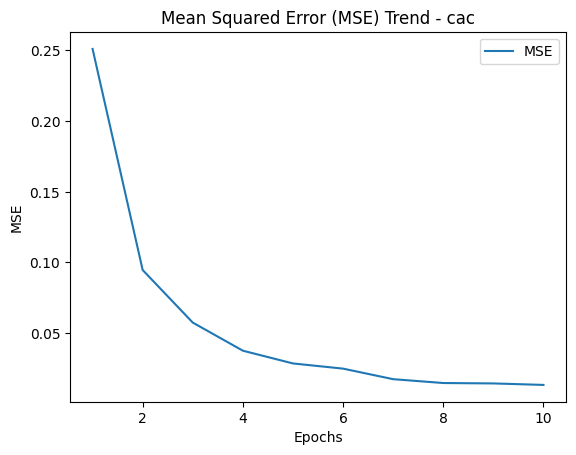

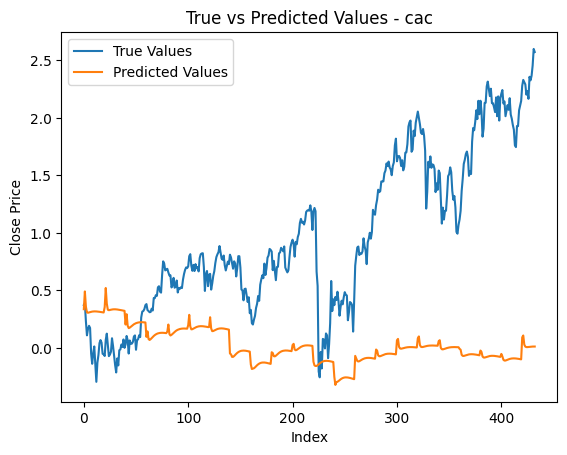

In [ ]:
##cac BUT RIGHT!

#prova con diversa struttura layers
cac_df['RSI']=ta.rsi(cac_df.Close, length=10)
cac_df['EMAF']=ta.ema(cac_df.Close, length=20)
cac_df['EMAM']=ta.ema(cac_df.Close, length=100)
cac_df['EMAS']=ta.ema(cac_df.Close, length=150)

cac_df_set = cac_df.loc[:, ['Date','Volume','Close','RSI', 'EMAF', 'EMAM','EMAS']].dropna()

splitlimit = int(len(sp500_df_set) * 0.8)
cac_df_train_set = cac_df_set.loc[:splitlimit,:]
cac_df_test_set = cac_df_set.loc[splitlimit:,:]


X_train = cac_df_train_set[['Volume','RSI', 'EMAF', 'EMAM','EMAS']]
y_train = cac_df_train_set[['Close']]
X_test = cac_df_test_set[['Volume','RSI', 'EMAF', 'EMAM','EMAS']]
y_test = cac_df_test_set[['Close']]

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

X_train = np.reshape(X_train, (X_train.shape[0],1, X_train.shape[1]))
#y_train = np.reshape(y_train, (y_train.shape[0],1,y_train.shape[1]))
X_test = np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))
#y_test = np.reshape(y_test, (y_test.shape[0],1,y_test.shape[1]))

X_train_1 = np.repeat(X_train, repeats=20, axis=1)
y_train_1 = np.array(cac_df_train_set[['Close']])

X_test_1 = np.repeat(X_test, repeats=20, axis=1)
y_test_1 = np.array(cac_df_test_set[['Close']])

model_1 = keras.Sequential()
model_1.add(keras.layers.LSTM(units = 50, return_sequences=True, input_shape=(X_train_1.shape[1], X_train_1.shape[2])))
model_1.add(keras.layers.Dropout(0.2))
model_1.add(keras.layers.LSTM(units = 50,return_sequences=True))
model_1.add(keras.layers.Dropout(0.2))
model_1.add(keras.layers.LSTM(units = 50,return_sequences=True))
model_1.add(keras.layers.Dense(units=1))
model_1.compile(optimizer ='adam', loss='mse')


history = model_1.fit(x=X_train_1, y=y_train_1, batch_size=10, epochs=10, validation_data= (X_test_1,y_test_1))
y_pred = model_1.predict(X_test_1)

# Extract the MSE values from the history object
mse_values_1 = history.history['loss']

# Plot the trend of MSE with respect to epochs
plt.plot(range(1, len(mse_values_1) + 1), mse_values_1, label='MSE')
plt.title('Mean Squared Error (MSE) Trend - cac')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()


# Plot the predicted values
plt.plot(y_test_1, label='True Values')
plt.plot(np.reshape(y_pred,8660)[:len(y_test_1)],  label='Predicted Values')

plt.title('True vs Predicted Values - cac')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [ ]:
#cac

# Adding indicators
cac_df['RSI']=ta.rsi(cac_df.Close, length=15)
cac_df['EMAF']=ta.ema(cac_df.Close, length=20)
cac_df['EMAM']=ta.ema(cac_df.Close, length=100)
cac_df['EMAS']=ta.ema(cac_df.Close, length=150)


cac_df.dropna(inplace=True)
cac_df.reset_index(inplace = True)
cac_df_set = cac_df.loc[:, [ 'Open', 'High', 'Low', 'Volume', 'RSI', 'EMAF', 'EMAM','EMAS', 'Close']]
pd.set_option('display.max_columns', None)

cac_df_set.head(10)
print(cac_df_set.shape)
print(type(cac_df_set))
#Target column Categories
Y =[1 if cac_df.Open[i]<cac_df.Close[i] else 0 for i in range(0, len(cac_df))] #on Y,  I have 1 if the open price is lower than the close price, 0 otherwise

y = [cac_df.Close[i] for i in range(0, len(cac_df))] #on y, I have the close price
#print(yi)
#print(len(yi))
#On X, I'm storing the values of the 9 features I have but considering a shift of 10 weeks
X = []
backcandles = 10
for j in range(9):
    X.append([])
    for i in range(backcandles, cac_df_set.shape[0]):
        X[j].append(cac_df_set.iloc[i - backcandles:i, j].values)

splitlimit = int(len(X[0]) * 0.8)
X_train, X_test = [], []
for feature in X:
    X_train.append(feature[:splitlimit])
    X_test.append(feature[splitlimit:])

X_train, X_test = np.array(X_train), np.array(X_test)

y_train, y_test = y[:splitlimit], y[splitlimit:]
y_train, y_test = np.array(y_train), np.array(y_test)

# Reshaping the arrays to match the input shape expected by the model
X_train = X_train.reshape(-1, backcandles, 9)
X_test = X_test.reshape(-1, backcandles, 9)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

np.random.seed(10)

lstm_input = keras.layers.Input(shape=(backcandles, 9), name='lstm_input')
inputs = keras.layers.LSTM(50, name='first_layer')(lstm_input)
inputs = keras.layers.Dense(1, name='dense_layer')(inputs)
output = keras.layers.Activation('linear', name='output')(inputs)
model = keras.Model(inputs=lstm_input, outputs=output)
adam = keras.optimizers.Adam()
model.compile(optimizer=adam, loss='mse')

model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split=0.1)

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Plot for training data
axes[0].plot(y_train, color='black', label='Actual (Train)')
axes[0].plot(y_pred_train, color='green', label='Predicted (Train)')
axes[0].set_title('Training Data')
axes[0].legend()

# Plot for test data
axes[1].plot(y_test, color='blue', label='Actual (Test)')
axes[1].plot(y_pred, color='red', label='Predicted (Test)')
axes[1].set_title('Test Data')
axes[1].legend()

plt.suptitle('Cac')
plt.show()

Epoch 1/10
99/99 [==============================] - 19s 82ms/step - loss: 0.3498 - val_loss: 0.3529
Epoch 2/10
99/99 [==============================] - 7s 66ms/step - loss: 0.1102 - val_loss: 0.1852
Epoch 3/10
99/99 [==============================] - 6s 58ms/step - loss: 0.0563 - val_loss: 0.1303
Epoch 4/10
99/99 [==============================] - 8s 81ms/step - loss: 0.0407 - val_loss: 0.1021
Epoch 5/10
99/99 [==============================] - 5s 51ms/step - loss: 0.0272 - val_loss: 0.0697
Epoch 6/10
99/99 [==============================] - 8s 81ms/step - loss: 0.0235 - val_loss: 0.0714
Epoch 7/10
99/99 [==============================] - 5s 54ms/step - loss: 0.0193 - val_loss: 0.0740
Epoch 8/10
99/99 [==============================] - 6s 56ms/step - loss: 0.0169 - val_loss: 0.0525
Epoch 9/10
99/99 [==============================] - 5s 55ms/step - loss: 0.0135 - val_loss: 0.0648
Epoch 10/10
14/14 [==============================] - 2s 16ms/step


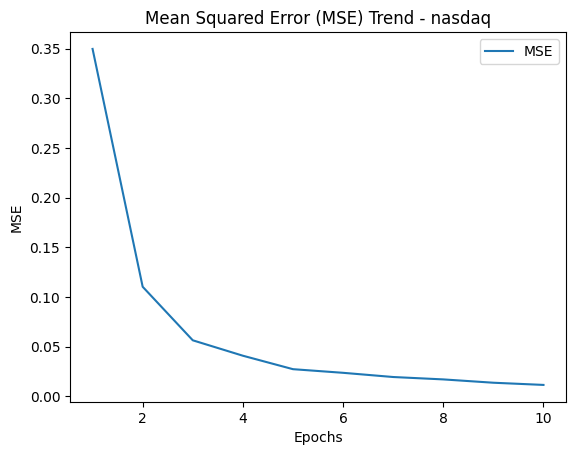

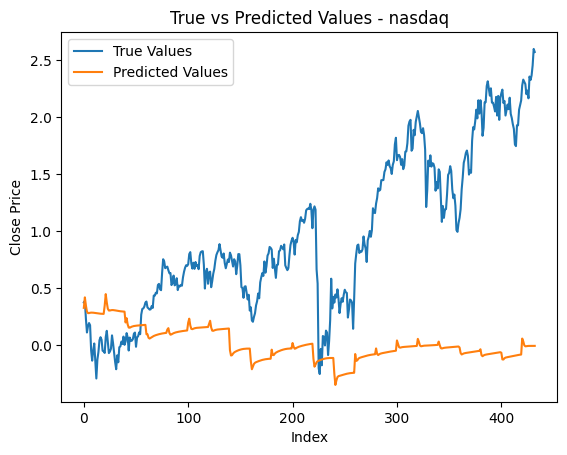

In [ ]:
##nasdaq BUT RIGHT!

#prova con diversa struttura layers
nasdaq_df['RSI']=ta.rsi(nasdaq_df.Close, length=10)
nasdaq_df['EMAF']=ta.ema(nasdaq_df.Close, length=20)
nasdaq_df['EMAM']=ta.ema(nasdaq_df.Close, length=100)
nasdaq_df['EMAS']=ta.ema(nasdaq_df.Close, length=150)

nasdaq_df_set = cac_df.loc[:, ['Date','Volume','Close','RSI', 'EMAF', 'EMAM','EMAS']].dropna()

splitlimit = int(len(nasdaq_df_set) * 0.8)
nasdaq_df_train_set = nasdaq_df_set.loc[:splitlimit,:]
nasdaq_df_test_set = nasdaq_df_set.loc[splitlimit:,:]


X_train = nasdaq_df_train_set[['Volume','RSI', 'EMAF', 'EMAM','EMAS']]
y_train = nasdaq_df_train_set[['Close']]
X_test = nasdaq_df_test_set[['Volume','RSI', 'EMAF', 'EMAM','EMAS']]
y_test = nasdaq_df_test_set[['Close']]

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

X_train = np.reshape(X_train, (X_train.shape[0],1, X_train.shape[1]))
#y_train = np.reshape(y_train, (y_train.shape[0],1,y_train.shape[1]))
X_test = np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))
#y_test = np.reshape(y_test, (y_test.shape[0],1,y_test.shape[1]))

X_train_1 = np.repeat(X_train, repeats=20, axis=1)
y_train_1 = np.array(nasdaq_df_train_set[['Close']])

X_test_1 = np.repeat(X_test, repeats=20, axis=1)
y_test_1 = np.array(nasdaq_df_test_set[['Close']])

model_1 = keras.Sequential()
model_1.add(keras.layers.LSTM(units = 50, return_sequences=True, input_shape=(X_train_1.shape[1], X_train_1.shape[2])))
model_1.add(keras.layers.Dropout(0.2))
model_1.add(keras.layers.LSTM(units = 50,return_sequences=True))
model_1.add(keras.layers.Dropout(0.2))
model_1.add(keras.layers.LSTM(units = 50,return_sequences=True))
model_1.add(keras.layers.Dense(units=1))
model_1.compile(optimizer ='adam', loss='mse')


history = model_1.fit(x=X_train_1, y=y_train_1, batch_size=10, epochs=10, validation_data= (X_test_1,y_test_1))
y_pred = model_1.predict(X_test_1)

# Extract the MSE values from the history object
mse_values_1 = history.history['loss']

# Plot the trend of MSE with respect to epochs
plt.plot(range(1, len(mse_values_1) + 1), mse_values_1, label='MSE')
plt.title('Mean Squared Error (MSE) Trend - nasdaq')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()


# Plot the predicted values
plt.plot(y_test_1, label='True Values')
plt.plot(np.reshape(y_pred,8660)[:len(y_test_1)],  label='Predicted Values')

plt.title('True vs Predicted Values - nasdaq')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [ ]:
#nasdaq

# Adding indicators
nasdaq_df['RSI']=ta.rsi(nasdaq_df.Close, length=15)
nasdaq_df['EMAF']=ta.ema(nasdaq_df.Close, length=20)
nasdaq_df['EMAM']=ta.ema(nasdaq_df.Close, length=100)
nasdaq_df['EMAS']=ta.ema(nasdaq_df.Close, length=150)


nasdaq_df.dropna(inplace=True)
nasdaq_df.reset_index(inplace = True)
nasdaq_df_set = nasdaq_df.loc[:, [ 'Open', 'High', 'Low', 'Volume','Close', 'RSI', 'EMAF', 'EMAM','EMAS', 'Close']]
pd.set_option('display.max_columns', None)

nasdaq_df_set.head(10)
print(nasdaq_df_set.shape)
print(type(nasdaq_df_set))
#Target column Categories
Y =[1 if nasdaq_df.Open[i]<nasdaq_df.Close[i] else 0 for i in range(0, len(nasdaq_df))] #on Y,  I have 1 if the open price is lower than the close price, 0 otherwise

y = [nasdaq_df.Close[i] for i in range(0, len(nasdaq_df))] #on y, I have the close price
#print(yi)
#print(len(yi))
#On X, I'm storing the values of the 9 features I have but considering a shift of 10 weeks
X = []
backcandles = 10
for j in range(9):
    X.append([])
    for i in range(backcandles, nasdaq_df_set.shape[0]):
        X[j].append(nasdaq_df_set.iloc[i - backcandles:i, j].values)

splitlimit = int(len(X[0]) * 0.8)
X_train, X_test = [], []
for feature in X:
    X_train.append(feature[:splitlimit])
    X_test.append(feature[splitlimit:])

X_train, X_test = np.array(X_train), np.array(X_test)

y_train, y_test = y[:splitlimit], y[splitlimit:]
y_train, y_test = np.array(y_train), np.array(y_test)

# Reshaping the arrays to match the input shape expected by the model
X_train = X_train.reshape(-1, backcandles, 9)
X_test = X_test.reshape(-1, backcandles, 9)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

np.random.seed(10)

lstm_input = keras.layers.Input(shape=(backcandles, 9), name='lstm_input')
inputs = keras.layers.LSTM(50, name='first_layer')(lstm_input)
inputs = keras.layers.Dense(1, name='dense_layer')(inputs)
output = keras.layers.Activation('linear', name='output')(inputs)
model = keras.Model(inputs=lstm_input, outputs=output)
adam = keras.optimizers.Adam()
model.compile(optimizer=adam, loss='mse')

model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split=0.1)

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Plot for training data
axes[0].plot(y_train, color='black', label='Actual (Train)')
axes[0].plot(y_pred_train, color='green', label='Predicted (Train)')
axes[0].set_title('Training Data')
axes[0].legend()

# Plot for test data
axes[1].plot(y_test, color='blue', label='Actual (Test)')
axes[1].plot(y_pred, color='red', label='Predicted (Test)')
axes[1].set_title('Test Data')
axes[1].legend()

plt.suptitle('nasdaq')
plt.show()

##modello decisionale

In [ ]:
##modello decisionale

starting_pos = [0,0,0,0,0,0] #situation for each dataframe

def decision_model(starting_pos, dfs):
  for k in len(test):
    pos = starting_pos
    for i,df in dfs_names, dfs:

      previsioni_arima = y_pred_arima[i]
      previsioni_lstm = y_pred_lstm[i]

      for j in test['Date']:
        if (previsione_arima+previsione_lstm)> df[df.Date==j]['Close'] and pos[i]==0:
          pos[i] = 1
          print(dfs_names[i], 1)

        elif (previsione_arima+previsione_lstm)==df[df.Date==j]['Close']:
          print( dfs_names, 0)

        elif pos[i]==1 and (previsione_arima+previsione_lstm)<df[df.Date==j]['Close']:
          pos[i]==0
          print( dfs_names, -1)

    return test.loc[k, 'Date'],dfs_names, pos




In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# Definizione della rete neurale
def build_model(input_shape):
    model = models.Sequential([
        layers.Dense(64, activation='relu', input_shape=input_shape),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Output un valore tra 0 e 1
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Dati di addestramento
# X_train è una matrice contenente le features di input
# y_train è un vettore contenente le etichette di output (0, 1)
# Esempio: X_train = [[feature_arima, feature_lstm], ...], y_train = [0, 1, ...]

# Addestramento della rete neurale
model = build_model(input_shape=(2,))
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Utilizzo del modello addestrato per fare previsioni
def decision_model(starting_pos, dfs, model):
    for k in range(len(test)):
        pos = starting_pos
        for i, df in enumerate(dfs):
            previsione_arima = y_pred_arima[i]
            previsione_lstm = y_pred_lstm[i]
            input_features = np.array([[previsione_arima, previsione_lstm]])  # Creazione della feature input
            prediction = model.predict(input_features)[0]  # Predizione del modello
            if prediction > 0.5 and pos[i] == 0:
                pos[i] = 1
                print(dfs_names[i], 1)
            elif prediction <= 0.5 and pos[i] == 1:
                pos[i] = 0
                print(dfs_names[i], -1)
            else:
                print(dfs_names[i], 0)

        return test.loc[k, 'Date'], dfs_names, pos

# Utilizzo della funzione decision_model
decision_model(starting_pos, dfs, model)


In [ ]:
STOP

#SYSTEMATIC TRAINING MODEL
- Considering VIX
- if MA10>MA50 --> Output 1
- if MA50>MA -->

In [ ]:
#SYSTEMATIC TRAINING MODEL


In [ ]:
##example of fuzzy logic
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define fuzzy variables
temperature = ctrl.Antecedent(np.arange(0, 101, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')

# Define fuzzy membership functions
temperature['low'] = fuzz.trimf(temperature.universe, [0, 0, 50])
temperature['medium'] = fuzz.trimf(temperature.universe, [0, 50, 100])
temperature['high'] = fuzz.trimf(temperature.universe, [50, 100, 100])

humidity['low'] = fuzz.trimf(humidity.universe, [0, 0, 50])
humidity['medium'] = fuzz.trimf(humidity.universe, [0, 50, 100])
humidity['high'] = fuzz.trimf(humidity.universe, [50, 100, 100])

fan_speed['low'] = fuzz.trimf(fan_speed.universe, [0, 0, 50])
fan_speed['medium'] = fuzz.trimf(fan_speed.universe, [0, 50, 100])
fan_speed['high'] = fuzz.trimf(fan_speed.universe, [50, 100, 100])

# Define fuzzy rules
rule1 = ctrl.Rule(temperature['low'] | humidity['low'], fan_speed['low'])
rule2 = ctrl.Rule(temperature['medium'] | humidity['medium'], fan_speed['medium'])
rule3 = ctrl.Rule(temperature['high'] | humidity['high'], fan_speed['high'])
#RNN HERE
# Define control system
fan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
fan_speed_ctrl = ctrl.ControlSystemSimulation(fan_ctrl)

# Pass inputs to the control system
fan_speed_ctrl.input['temperature'] = 10
fan_speed_ctrl.input['humidity'] = 80

# Compute the output
fan_speed_ctrl.compute()

# Print the output
print("Fan Speed:", fan_speed_ctrl.output['fan_speed'])


## ANFIS

prova